In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
import numpy as np
import pandas as pd
import optuna 
from sklearn.metrics import log_loss


from sklearn.model_selection import cross_val_score


import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold#For splitting



from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay



import warnings
warnings.filterwarnings("ignore")

from sklearn.utils.fixes import loguniform

#features_train, features_test, labels_train, labels_test = train_test_split(
#    features, labels, test_size=0.3, random_state=42
#)


C:\Users\Pearse\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [4]:
n_components = 100
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)


In [5]:
# Catboost
cat = CatBoostClassifier()
cat.fit(X_train_pca, y_train)
cat_pred = cat.predict(X_valid_pca)
f1_score1 = f1_score(y_valid,cat_pred, average = "micro")
accuracy_score1 = accuracy_score(y_valid,cat_pred)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score1)
print('--------'*20)

Learning rate set to 0.078987
0:	learn: 1.8808885	total: 350ms	remaining: 5m 49s
1:	learn: 1.8260930	total: 575ms	remaining: 4m 47s
2:	learn: 1.7860309	total: 749ms	remaining: 4m 8s
3:	learn: 1.7493678	total: 967ms	remaining: 4m
4:	learn: 1.7148532	total: 1.2s	remaining: 3m 58s
5:	learn: 1.6743891	total: 1.39s	remaining: 3m 50s
6:	learn: 1.6471047	total: 1.61s	remaining: 3m 48s
7:	learn: 1.6203896	total: 1.83s	remaining: 3m 46s
8:	learn: 1.5910479	total: 2.05s	remaining: 3m 45s
9:	learn: 1.5662854	total: 2.26s	remaining: 3m 43s
10:	learn: 1.5385952	total: 2.46s	remaining: 3m 40s
11:	learn: 1.5070835	total: 2.69s	remaining: 3m 41s
12:	learn: 1.4770573	total: 2.93s	remaining: 3m 42s
13:	learn: 1.4497743	total: 3.15s	remaining: 3m 41s
14:	learn: 1.4204537	total: 3.35s	remaining: 3m 39s
15:	learn: 1.3971782	total: 3.56s	remaining: 3m 39s
16:	learn: 1.3793620	total: 3.81s	remaining: 3m 40s
17:	learn: 1.3606384	total: 4.01s	remaining: 3m 38s
18:	learn: 1.3395448	total: 4.21s	remaining: 3m 37

157:	learn: 0.3449929	total: 35.9s	remaining: 3m 11s
158:	learn: 0.3438111	total: 36.2s	remaining: 3m 11s
159:	learn: 0.3406673	total: 36.4s	remaining: 3m 11s
160:	learn: 0.3386731	total: 36.6s	remaining: 3m 10s
161:	learn: 0.3367941	total: 36.8s	remaining: 3m 10s
162:	learn: 0.3356106	total: 37.1s	remaining: 3m 10s
163:	learn: 0.3329701	total: 37.3s	remaining: 3m 10s
164:	learn: 0.3307128	total: 37.5s	remaining: 3m 10s
165:	learn: 0.3280232	total: 37.8s	remaining: 3m 9s
166:	learn: 0.3254677	total: 38s	remaining: 3m 9s
167:	learn: 0.3233864	total: 38.3s	remaining: 3m 9s
168:	learn: 0.3209340	total: 38.5s	remaining: 3m 9s
169:	learn: 0.3194149	total: 38.8s	remaining: 3m 9s
170:	learn: 0.3175389	total: 39.1s	remaining: 3m 9s
171:	learn: 0.3159900	total: 39.3s	remaining: 3m 9s
172:	learn: 0.3132670	total: 39.5s	remaining: 3m 8s
173:	learn: 0.3104983	total: 39.7s	remaining: 3m 8s
174:	learn: 0.3082129	total: 39.9s	remaining: 3m 8s
175:	learn: 0.3059384	total: 40.2s	remaining: 3m 8s
176:	l

315:	learn: 0.1490959	total: 1m 16s	remaining: 2m 46s
316:	learn: 0.1482903	total: 1m 17s	remaining: 2m 45s
317:	learn: 0.1475742	total: 1m 17s	remaining: 2m 45s
318:	learn: 0.1472559	total: 1m 17s	remaining: 2m 45s
319:	learn: 0.1464393	total: 1m 17s	remaining: 2m 44s
320:	learn: 0.1459456	total: 1m 17s	remaining: 2m 44s
321:	learn: 0.1452133	total: 1m 18s	remaining: 2m 44s
322:	learn: 0.1443985	total: 1m 18s	remaining: 2m 44s
323:	learn: 0.1437925	total: 1m 18s	remaining: 2m 43s
324:	learn: 0.1430734	total: 1m 18s	remaining: 2m 43s
325:	learn: 0.1423515	total: 1m 18s	remaining: 2m 43s
326:	learn: 0.1418254	total: 1m 19s	remaining: 2m 42s
327:	learn: 0.1411367	total: 1m 19s	remaining: 2m 42s
328:	learn: 0.1404032	total: 1m 19s	remaining: 2m 42s
329:	learn: 0.1400006	total: 1m 19s	remaining: 2m 41s
330:	learn: 0.1395915	total: 1m 19s	remaining: 2m 41s
331:	learn: 0.1391541	total: 1m 20s	remaining: 2m 41s
332:	learn: 0.1385437	total: 1m 20s	remaining: 2m 40s
333:	learn: 0.1378514	total:

469:	learn: 0.0839168	total: 1m 47s	remaining: 2m
470:	learn: 0.0836743	total: 1m 47s	remaining: 2m
471:	learn: 0.0834430	total: 1m 47s	remaining: 2m
472:	learn: 0.0831342	total: 1m 47s	remaining: 2m
473:	learn: 0.0829442	total: 1m 48s	remaining: 1m 59s
474:	learn: 0.0826728	total: 1m 48s	remaining: 1m 59s
475:	learn: 0.0823393	total: 1m 48s	remaining: 1m 59s
476:	learn: 0.0820630	total: 1m 48s	remaining: 1m 59s
477:	learn: 0.0818161	total: 1m 49s	remaining: 1m 59s
478:	learn: 0.0815740	total: 1m 49s	remaining: 1m 58s
479:	learn: 0.0813360	total: 1m 49s	remaining: 1m 58s
480:	learn: 0.0810357	total: 1m 49s	remaining: 1m 58s
481:	learn: 0.0807405	total: 1m 49s	remaining: 1m 58s
482:	learn: 0.0804725	total: 1m 50s	remaining: 1m 57s
483:	learn: 0.0803011	total: 1m 50s	remaining: 1m 57s
484:	learn: 0.0800578	total: 1m 50s	remaining: 1m 57s
485:	learn: 0.0799528	total: 1m 50s	remaining: 1m 57s
486:	learn: 0.0798153	total: 1m 51s	remaining: 1m 57s
487:	learn: 0.0795954	total: 1m 51s	remainin

624:	learn: 0.0558108	total: 2m 18s	remaining: 1m 22s
625:	learn: 0.0557388	total: 2m 18s	remaining: 1m 22s
626:	learn: 0.0555666	total: 2m 18s	remaining: 1m 22s
627:	learn: 0.0555188	total: 2m 18s	remaining: 1m 22s
628:	learn: 0.0553900	total: 2m 19s	remaining: 1m 21s
629:	learn: 0.0552399	total: 2m 19s	remaining: 1m 21s
630:	learn: 0.0551483	total: 2m 19s	remaining: 1m 21s
631:	learn: 0.0550066	total: 2m 19s	remaining: 1m 21s
632:	learn: 0.0548922	total: 2m 19s	remaining: 1m 21s
633:	learn: 0.0547270	total: 2m 19s	remaining: 1m 20s
634:	learn: 0.0545861	total: 2m 20s	remaining: 1m 20s
635:	learn: 0.0544411	total: 2m 20s	remaining: 1m 20s
636:	learn: 0.0543023	total: 2m 20s	remaining: 1m 20s
637:	learn: 0.0541561	total: 2m 20s	remaining: 1m 19s
638:	learn: 0.0540467	total: 2m 21s	remaining: 1m 19s
639:	learn: 0.0539302	total: 2m 21s	remaining: 1m 19s
640:	learn: 0.0537992	total: 2m 21s	remaining: 1m 19s
641:	learn: 0.0536504	total: 2m 21s	remaining: 1m 18s
642:	learn: 0.0535207	total:

778:	learn: 0.0403858	total: 2m 49s	remaining: 48s
779:	learn: 0.0403314	total: 2m 49s	remaining: 47.8s
780:	learn: 0.0402486	total: 2m 49s	remaining: 47.6s
781:	learn: 0.0401551	total: 2m 49s	remaining: 47.3s
782:	learn: 0.0401087	total: 2m 50s	remaining: 47.1s
783:	learn: 0.0400775	total: 2m 50s	remaining: 46.9s
784:	learn: 0.0400318	total: 2m 50s	remaining: 46.7s
785:	learn: 0.0399593	total: 2m 50s	remaining: 46.5s
786:	learn: 0.0398963	total: 2m 51s	remaining: 46.3s
787:	learn: 0.0398117	total: 2m 51s	remaining: 46.1s
788:	learn: 0.0397746	total: 2m 51s	remaining: 45.8s
789:	learn: 0.0396835	total: 2m 51s	remaining: 45.6s
790:	learn: 0.0395975	total: 2m 51s	remaining: 45.4s
791:	learn: 0.0395254	total: 2m 51s	remaining: 45.2s
792:	learn: 0.0394655	total: 2m 52s	remaining: 44.9s
793:	learn: 0.0394247	total: 2m 52s	remaining: 44.7s
794:	learn: 0.0393562	total: 2m 52s	remaining: 44.5s
795:	learn: 0.0392917	total: 2m 52s	remaining: 44.3s
796:	learn: 0.0392402	total: 2m 52s	remaining: 4

935:	learn: 0.0312082	total: 3m 18s	remaining: 13.6s
936:	learn: 0.0311708	total: 3m 18s	remaining: 13.4s
937:	learn: 0.0311293	total: 3m 18s	remaining: 13.1s
938:	learn: 0.0310650	total: 3m 18s	remaining: 12.9s
939:	learn: 0.0310309	total: 3m 19s	remaining: 12.7s
940:	learn: 0.0310078	total: 3m 19s	remaining: 12.5s
941:	learn: 0.0309567	total: 3m 19s	remaining: 12.3s
942:	learn: 0.0309098	total: 3m 19s	remaining: 12.1s
943:	learn: 0.0308494	total: 3m 19s	remaining: 11.9s
944:	learn: 0.0307941	total: 3m 20s	remaining: 11.6s
945:	learn: 0.0307423	total: 3m 20s	remaining: 11.4s
946:	learn: 0.0307028	total: 3m 20s	remaining: 11.2s
947:	learn: 0.0306600	total: 3m 20s	remaining: 11s
948:	learn: 0.0305994	total: 3m 20s	remaining: 10.8s
949:	learn: 0.0305476	total: 3m 20s	remaining: 10.6s
950:	learn: 0.0304851	total: 3m 21s	remaining: 10.4s
951:	learn: 0.0304378	total: 3m 21s	remaining: 10.2s
952:	learn: 0.0303901	total: 3m 21s	remaining: 9.94s
953:	learn: 0.0303429	total: 3m 21s	remaining: 9

In [6]:
# Catboost
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train_pca, y_train)
cat_pred = cat.predict(X_valid_pca)
f1_score1 = f1_score(y_valid,cat_pred, average = "micro")
accuracy_score1 = accuracy_score(y_valid,cat_pred)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score1)
print('--------'*20)

#RandomForest
rf =  RandomForestClassifier()
rf.fit(X_train_pca, y_train)
rf_pred = rf.predict(X_valid_pca)
f1_score2 = f1_score(y_valid,rf_pred, average = "micro")
accuracy_score2 = accuracy_score(y_valid,rf_pred)
print("RandomForest accuracy_score on validation set is : ",accuracy_score(y_valid,rf_pred))
print("RandomForest F1 score on validation set is : ",f1_score2)
print('--------'*20)

#DecisionTree
dt =  DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
dt_pred = dt.predict(X_valid_pca)
f1_score3 = f1_score(y_valid,dt_pred, average = "micro")
accuracy_score3 = accuracy_score(y_valid,dt_pred)
print("DecisionTree accuracy_score on validation set is : ",accuracy_score(y_valid,dt_pred))
print("DecisionTree F1 score on validation set is : ",f1_score3)
print('--------'*20)


#KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_valid_pca)
f1_score4 = f1_score(y_valid,knn_pred, average = "micro")
accuracy_score4 = accuracy_score(y_valid,knn_pred)
print("KNeighbors accuracy_score on validation set is : ",accuracy_score(y_valid,knn_pred))
print("KNeighbors F1 score on validation set is : ",f1_score4)
print('--------'*20)



#SVC
svc =  SVC()
svc.fit(X_train_pca, y_train)
svc_pred = svc.predict(X_valid_pca)
f1_score5 = f1_score(y_valid,svc_pred, average = "micro")
accuracy_score5 = accuracy_score(y_valid,svc_pred)
print("SVC accuracy_score on validation set is : ",accuracy_score(y_valid,svc_pred))
print("SVC F1 score on validation set is : ",f1_score5)
print('--------'*20)

#LinearSVC
lsvc =  LinearSVC()
lsvc.fit(X_train_pca, y_train)
lsvc_pred = lsvc.predict(X_valid_pca)
f1_score6 = f1_score(y_valid,lsvc_pred, average = "micro")
accuracy_score6 = accuracy_score(y_valid,lsvc_pred)
print("LinearSVC accuracy_score on validation set is : ",accuracy_score(y_valid,lsvc_pred))
print("LinearSVC F1 score on validation set is : ",f1_score6)
print('--------'*20)

#AdaBoost
ab =  AdaBoostClassifier()
ab.fit(X_train_pca, y_train)
ab_pred = ab.predict(X_valid_pca)
f1_score7 = f1_score(y_valid,ab_pred, average = "micro")
accuracy_score7 = accuracy_score(y_valid,ab_pred)
print("AdaBoost accuracy_score on validation set is : ",accuracy_score(y_valid,ab_pred))
print("AdaBoost F1 score on validation set is : ",f1_score7)
print('--------'*20)

#LogisticRegression
lg =  LogisticRegression()
lg.fit(X_train_pca, y_train)
lg_pred = lg.predict(X_valid_pca)
f1_score8 = f1_score(y_valid,lg_pred, average = "micro")
accuracy_score8 = accuracy_score(y_valid,lg_pred)
print("LogisticRegression accuracy_score on validation set is : ",accuracy_score(y_valid,lg_pred))
print("LogisticRegression F1 score on validation set is : ",f1_score8)
print('--------'*20) 

#Naive Bayes
nb =  GaussianNB()
nb.fit(X_train_pca, y_train)
nb_pred = nb.predict(X_valid_pca)
f1_score9 = f1_score(y_valid,nb_pred, average = "micro")
accuracy_score9 = accuracy_score(y_valid,nb_pred)
print("Naive Bayes accuracy_score on validation set is : ",accuracy_score(y_valid,nb_pred))
print("Naive Bayes F1 score on validation set is : ",f1_score9)
print('--------'*20)

# LGBM
lgb = LGBMClassifier()
lgb.fit(X_train_pca, y_train)
lgb_pred = lgb.predict(X_valid_pca)
f1_score10 = f1_score(y_valid,lgb_pred, average = "micro")
accuracy_score10 = accuracy_score(y_valid,lgb_pred)
print("LGBM accuracy_score on validation set is : ",accuracy_score(y_valid,lgb_pred))
print("LGBM F1 score on validation set is : ",f1_score10)
print('--------'*20)

# XGBoost
xg = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg.fit(X_train_pca, y_train)
xg_pred = xg.predict(X_valid_pca)
f1_score11 = f1_score(y_valid,xg_pred, average = "micro")
accuracy_score11 = accuracy_score(y_valid,xg_pred)
print("XGBoost accuracy_score on validation set is : ",accuracy_score(y_valid,xg_pred))
print("XGBoost F1 score on validation set is : ",f1_score11)
print('--------'*20)

CatBoost accuracy_score on validation set is :  0.8291925465838509
CatBoost F1 score on validation set is :  0.8291925465838509
----------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForest accuracy_score on validation set is :  0.6583850931677019
RandomForest F1 score on validation set is :  0.6583850931677019
----------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTree accuracy_score on validation set is :  0.484472049689441
DecisionTree F1 score on validation set is :  0.484472049689441
----------------------------------------------------------------------------------------------------------------------------------------------------------------
KNeighbors accuracy_score on validation set is :  0.7142857142857143
KNeighbors F1 score on validation set is :  0.7142

In [7]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost", "RandomForest", "DecisionTree", "KNeighbors", "SVC", "LinearSVC", 
              "AdaBoost", "LogisticRegression", "NaiveBayes", "LGBM", "XGBoost"],
        
    "F1_Score": [f1_score1, f1_score2, f1_score3, 
              f1_score4, f1_score5, f1_score6, f1_score7, f1_score8, f1_score9, f1_score10, f1_score11],
    "Accuracy": [accuracy_score1, accuracy_score2, accuracy_score3, 
              accuracy_score4, accuracy_score5, accuracy_score6, accuracy_score7, accuracy_score8, 
                 accuracy_score9, accuracy_score10, accuracy_score11]
    })

model_performance = model_performance.sort_values(["Accuracy"], ascending=False)
    
print(model_performance)

                 Model  F1_Score  Accuracy
0             CatBoost  0.829193  0.829193
4                  SVC  0.826087  0.826087
5            LinearSVC  0.788820  0.788820
9                 LGBM  0.788820  0.788820
7   LogisticRegression  0.773292  0.773292
10             XGBoost  0.742236  0.742236
8           NaiveBayes  0.732919  0.732919
3           KNeighbors  0.714286  0.714286
1         RandomForest  0.658385  0.658385
2         DecisionTree  0.484472  0.484472
6             AdaBoost  0.440994  0.440994


In [8]:
clf = CatBoostClassifier(rsm =1)#verbose = False)
#simple_ctr=['Borders:CtrBorderCount=[50,5,10,20,100,200]']
learning_rate = [0.03,0.001,0.01,0.1,0.2,0.3,0.4]
n_estimators = list(range(0,1000, 50))
depth = list(range(0,10,1))
class_weights = list(np.arange(0, 1, 0.1)) 
iterations = [10, 20,30,40,50,60,70,80,90, 250,100,500,1000]
border_count = [32,5,10,20,50,100,200]
rsm = [0,1]

# 'ctr_border_count':[50,5,10,20,100,200],
print("Fitting the classifier to the training set")
parameters = {'depth':depth,
          #'iterations':iterations,
          'learning_rate':learning_rate, 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':border_count,
           'n_estimators': n_estimators,
            #'rsm': rsm,
           # 'class_weights': class_weights,
          'thread_count':[4,3]}


grid_cv = RandomizedSearchCV(clf, parameters, scoring = make_scorer(f1_score, average = 'micro'), error_score='raise', n_iter = 10)
grid_cv = grid_cv.fit(X_train_pca, y_train)


print(" Results from Grid Search " )
print("Our optimized CatBoost model is:", grid_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_cv.best_params_)



Fitting the classifier to the training set
0:	learn: 1.8987843	total: 536ms	remaining: 4m 54s
1:	learn: 1.8521331	total: 1s	remaining: 4m 35s
2:	learn: 1.8175579	total: 1.48s	remaining: 4m 30s
3:	learn: 1.7805186	total: 2.13s	remaining: 4m 50s
4:	learn: 1.7400166	total: 3s	remaining: 5m 26s
5:	learn: 1.7129319	total: 3.83s	remaining: 5m 47s
6:	learn: 1.6857038	total: 4.58s	remaining: 5m 55s
7:	learn: 1.6556390	total: 5.11s	remaining: 5m 46s
8:	learn: 1.6257964	total: 5.75s	remaining: 5m 45s
9:	learn: 1.5966985	total: 6.26s	remaining: 5m 38s
10:	learn: 1.5684185	total: 6.77s	remaining: 5m 31s
11:	learn: 1.5476630	total: 7.31s	remaining: 5m 27s
12:	learn: 1.5189183	total: 7.83s	remaining: 5m 23s
13:	learn: 1.4978036	total: 8.34s	remaining: 5m 19s
14:	learn: 1.4716241	total: 8.85s	remaining: 5m 15s
15:	learn: 1.4518292	total: 9.37s	remaining: 5m 12s
16:	learn: 1.4317120	total: 9.88s	remaining: 5m 9s
17:	learn: 1.4147005	total: 10.5s	remaining: 5m 9s
18:	learn: 1.3917730	total: 11s	remaini

157:	learn: 0.3217023	total: 1m 22s	remaining: 3m 25s
158:	learn: 0.3197082	total: 1m 23s	remaining: 3m 24s
159:	learn: 0.3168518	total: 1m 23s	remaining: 3m 23s
160:	learn: 0.3144708	total: 1m 24s	remaining: 3m 23s
161:	learn: 0.3115421	total: 1m 24s	remaining: 3m 22s
162:	learn: 0.3097379	total: 1m 25s	remaining: 3m 22s
163:	learn: 0.3083251	total: 1m 25s	remaining: 3m 21s
164:	learn: 0.3059309	total: 1m 26s	remaining: 3m 20s
165:	learn: 0.3031195	total: 1m 26s	remaining: 3m 20s
166:	learn: 0.3003562	total: 1m 27s	remaining: 3m 19s
167:	learn: 0.2981674	total: 1m 27s	remaining: 3m 19s
168:	learn: 0.2959392	total: 1m 28s	remaining: 3m 18s
169:	learn: 0.2940063	total: 1m 28s	remaining: 3m 18s
170:	learn: 0.2917225	total: 1m 29s	remaining: 3m 17s
171:	learn: 0.2893548	total: 1m 29s	remaining: 3m 16s
172:	learn: 0.2870127	total: 1m 30s	remaining: 3m 16s
173:	learn: 0.2847462	total: 1m 30s	remaining: 3m 15s
174:	learn: 0.2828481	total: 1m 31s	remaining: 3m 15s
175:	learn: 0.2806882	total:

311:	learn: 0.1326884	total: 2m 37s	remaining: 1m 59s
312:	learn: 0.1322192	total: 2m 37s	remaining: 1m 59s
313:	learn: 0.1315408	total: 2m 38s	remaining: 1m 58s
314:	learn: 0.1310109	total: 2m 38s	remaining: 1m 58s
315:	learn: 0.1304164	total: 2m 38s	remaining: 1m 57s
316:	learn: 0.1297771	total: 2m 39s	remaining: 1m 57s
317:	learn: 0.1292604	total: 2m 39s	remaining: 1m 56s
318:	learn: 0.1288108	total: 2m 40s	remaining: 1m 56s
319:	learn: 0.1282979	total: 2m 40s	remaining: 1m 55s
320:	learn: 0.1277567	total: 2m 41s	remaining: 1m 55s
321:	learn: 0.1271064	total: 2m 41s	remaining: 1m 54s
322:	learn: 0.1263986	total: 2m 42s	remaining: 1m 54s
323:	learn: 0.1259464	total: 2m 42s	remaining: 1m 53s
324:	learn: 0.1254794	total: 2m 43s	remaining: 1m 53s
325:	learn: 0.1247412	total: 2m 43s	remaining: 1m 52s
326:	learn: 0.1241917	total: 2m 44s	remaining: 1m 52s
327:	learn: 0.1236700	total: 2m 44s	remaining: 1m 51s
328:	learn: 0.1231492	total: 2m 45s	remaining: 1m 50s
329:	learn: 0.1224709	total:

465:	learn: 0.0773728	total: 3m 50s	remaining: 41.6s
466:	learn: 0.0771692	total: 3m 51s	remaining: 41.1s
467:	learn: 0.0769411	total: 3m 51s	remaining: 40.6s
468:	learn: 0.0767535	total: 3m 52s	remaining: 40.1s
469:	learn: 0.0764839	total: 3m 52s	remaining: 39.6s
470:	learn: 0.0762787	total: 3m 53s	remaining: 39.1s
471:	learn: 0.0760894	total: 3m 53s	remaining: 38.6s
472:	learn: 0.0758729	total: 3m 54s	remaining: 38.1s
473:	learn: 0.0757382	total: 3m 54s	remaining: 37.6s
474:	learn: 0.0755224	total: 3m 55s	remaining: 37.1s
475:	learn: 0.0752900	total: 3m 55s	remaining: 36.6s
476:	learn: 0.0751406	total: 3m 56s	remaining: 36.1s
477:	learn: 0.0749650	total: 3m 56s	remaining: 35.6s
478:	learn: 0.0747815	total: 3m 57s	remaining: 35.1s
479:	learn: 0.0746535	total: 3m 57s	remaining: 34.6s
480:	learn: 0.0744494	total: 3m 57s	remaining: 34.1s
481:	learn: 0.0742005	total: 3m 58s	remaining: 33.6s
482:	learn: 0.0740671	total: 3m 58s	remaining: 33.1s
483:	learn: 0.0738129	total: 3m 59s	remaining:

73:	learn: 0.7398203	total: 35.5s	remaining: 3m 48s
74:	learn: 0.7303322	total: 36s	remaining: 3m 47s
75:	learn: 0.7223135	total: 36.4s	remaining: 3m 47s
76:	learn: 0.7139652	total: 37.1s	remaining: 3m 47s
77:	learn: 0.7043227	total: 37.6s	remaining: 3m 47s
78:	learn: 0.6962006	total: 38.1s	remaining: 3m 46s
79:	learn: 0.6870495	total: 38.5s	remaining: 3m 46s
80:	learn: 0.6798291	total: 39s	remaining: 3m 45s
81:	learn: 0.6718371	total: 39.5s	remaining: 3m 45s
82:	learn: 0.6660031	total: 39.9s	remaining: 3m 44s
83:	learn: 0.6570422	total: 40.4s	remaining: 3m 44s
84:	learn: 0.6490778	total: 40.9s	remaining: 3m 43s
85:	learn: 0.6421815	total: 41.4s	remaining: 3m 43s
86:	learn: 0.6341207	total: 41.9s	remaining: 3m 42s
87:	learn: 0.6287637	total: 42.3s	remaining: 3m 42s
88:	learn: 0.6211956	total: 42.8s	remaining: 3m 41s
89:	learn: 0.6136803	total: 43.3s	remaining: 3m 41s
90:	learn: 0.6075745	total: 43.8s	remaining: 3m 40s
91:	learn: 0.5995543	total: 44.3s	remaining: 3m 40s
92:	learn: 0.592

228:	learn: 0.2045861	total: 1m 50s	remaining: 2m 35s
229:	learn: 0.2036168	total: 1m 51s	remaining: 2m 34s
230:	learn: 0.2024497	total: 1m 51s	remaining: 2m 34s
231:	learn: 0.2013087	total: 1m 52s	remaining: 2m 33s
232:	learn: 0.2000515	total: 1m 52s	remaining: 2m 33s
233:	learn: 0.1987437	total: 1m 53s	remaining: 2m 32s
234:	learn: 0.1975023	total: 1m 53s	remaining: 2m 32s
235:	learn: 0.1964051	total: 1m 54s	remaining: 2m 32s
236:	learn: 0.1956484	total: 1m 54s	remaining: 2m 31s
237:	learn: 0.1944725	total: 1m 55s	remaining: 2m 31s
238:	learn: 0.1931470	total: 1m 55s	remaining: 2m 30s
239:	learn: 0.1923607	total: 1m 56s	remaining: 2m 30s
240:	learn: 0.1911946	total: 1m 56s	remaining: 2m 29s
241:	learn: 0.1900608	total: 1m 57s	remaining: 2m 29s
242:	learn: 0.1888266	total: 1m 57s	remaining: 2m 28s
243:	learn: 0.1875355	total: 1m 58s	remaining: 2m 28s
244:	learn: 0.1863343	total: 1m 58s	remaining: 2m 28s
245:	learn: 0.1853922	total: 1m 59s	remaining: 2m 27s
246:	learn: 0.1842720	total:

382:	learn: 0.1018289	total: 3m 11s	remaining: 1m 23s
383:	learn: 0.1014941	total: 3m 11s	remaining: 1m 22s
384:	learn: 0.1011027	total: 3m 12s	remaining: 1m 22s
385:	learn: 0.1007600	total: 3m 12s	remaining: 1m 21s
386:	learn: 0.1003623	total: 3m 13s	remaining: 1m 21s
387:	learn: 0.0999821	total: 3m 14s	remaining: 1m 21s
388:	learn: 0.0996129	total: 3m 14s	remaining: 1m 20s
389:	learn: 0.0992952	total: 3m 15s	remaining: 1m 20s
390:	learn: 0.0990239	total: 3m 15s	remaining: 1m 19s
391:	learn: 0.0986276	total: 3m 16s	remaining: 1m 19s
392:	learn: 0.0982312	total: 3m 16s	remaining: 1m 18s
393:	learn: 0.0979811	total: 3m 17s	remaining: 1m 18s
394:	learn: 0.0976271	total: 3m 17s	remaining: 1m 17s
395:	learn: 0.0972639	total: 3m 18s	remaining: 1m 17s
396:	learn: 0.0969337	total: 3m 18s	remaining: 1m 16s
397:	learn: 0.0966386	total: 3m 19s	remaining: 1m 16s
398:	learn: 0.0962841	total: 3m 19s	remaining: 1m 15s
399:	learn: 0.0959441	total: 3m 20s	remaining: 1m 15s
400:	learn: 0.0956902	total:

537:	learn: 0.0644637	total: 4m 30s	remaining: 6.03s
538:	learn: 0.0642837	total: 4m 30s	remaining: 5.53s
539:	learn: 0.0641222	total: 4m 31s	remaining: 5.02s
540:	learn: 0.0639378	total: 4m 31s	remaining: 4.52s
541:	learn: 0.0637881	total: 4m 32s	remaining: 4.02s
542:	learn: 0.0636277	total: 4m 32s	remaining: 3.52s
543:	learn: 0.0634490	total: 4m 33s	remaining: 3.02s
544:	learn: 0.0632999	total: 4m 33s	remaining: 2.51s
545:	learn: 0.0631927	total: 4m 34s	remaining: 2.01s
546:	learn: 0.0629844	total: 4m 34s	remaining: 1.51s
547:	learn: 0.0628930	total: 4m 35s	remaining: 1s
548:	learn: 0.0627148	total: 4m 35s	remaining: 502ms
549:	learn: 0.0625830	total: 4m 36s	remaining: 0us
0:	learn: 1.8957327	total: 508ms	remaining: 4m 38s
1:	learn: 1.8534782	total: 1.05s	remaining: 4m 48s
2:	learn: 1.8032744	total: 1.56s	remaining: 4m 44s
3:	learn: 1.7738427	total: 2.08s	remaining: 4m 43s
4:	learn: 1.7356307	total: 2.6s	remaining: 4m 42s
5:	learn: 1.7016644	total: 3.11s	remaining: 4m 41s
6:	learn: 1

145:	learn: 0.3471716	total: 1m 18s	remaining: 3m 37s
146:	learn: 0.3448345	total: 1m 19s	remaining: 3m 36s
147:	learn: 0.3413139	total: 1m 19s	remaining: 3m 36s
148:	learn: 0.3390283	total: 1m 20s	remaining: 3m 35s
149:	learn: 0.3363746	total: 1m 20s	remaining: 3m 35s
150:	learn: 0.3342545	total: 1m 21s	remaining: 3m 34s
151:	learn: 0.3315311	total: 1m 21s	remaining: 3m 34s
152:	learn: 0.3295565	total: 1m 22s	remaining: 3m 33s
153:	learn: 0.3262566	total: 1m 22s	remaining: 3m 33s
154:	learn: 0.3234263	total: 1m 23s	remaining: 3m 32s
155:	learn: 0.3212360	total: 1m 24s	remaining: 3m 32s
156:	learn: 0.3187450	total: 1m 24s	remaining: 3m 31s
157:	learn: 0.3157615	total: 1m 25s	remaining: 3m 31s
158:	learn: 0.3135205	total: 1m 25s	remaining: 3m 30s
159:	learn: 0.3109913	total: 1m 26s	remaining: 3m 30s
160:	learn: 0.3089989	total: 1m 26s	remaining: 3m 29s
161:	learn: 0.3064853	total: 1m 27s	remaining: 3m 28s
162:	learn: 0.3038798	total: 1m 27s	remaining: 3m 28s
163:	learn: 0.3015464	total:

298:	learn: 0.1426324	total: 2m 37s	remaining: 2m 11s
299:	learn: 0.1420531	total: 2m 37s	remaining: 2m 11s
300:	learn: 0.1411959	total: 2m 37s	remaining: 2m 10s
301:	learn: 0.1405293	total: 2m 38s	remaining: 2m 10s
302:	learn: 0.1398299	total: 2m 38s	remaining: 2m 9s
303:	learn: 0.1390381	total: 2m 39s	remaining: 2m 8s
304:	learn: 0.1384897	total: 2m 39s	remaining: 2m 8s
305:	learn: 0.1380680	total: 2m 40s	remaining: 2m 7s
306:	learn: 0.1374179	total: 2m 40s	remaining: 2m 7s
307:	learn: 0.1369655	total: 2m 41s	remaining: 2m 6s
308:	learn: 0.1365967	total: 2m 41s	remaining: 2m 6s
309:	learn: 0.1358776	total: 2m 42s	remaining: 2m 5s
310:	learn: 0.1352705	total: 2m 42s	remaining: 2m 5s
311:	learn: 0.1343540	total: 2m 43s	remaining: 2m 4s
312:	learn: 0.1338421	total: 2m 43s	remaining: 2m 3s
313:	learn: 0.1332644	total: 2m 44s	remaining: 2m 3s
314:	learn: 0.1330470	total: 2m 44s	remaining: 2m 2s
315:	learn: 0.1324243	total: 2m 45s	remaining: 2m 2s
316:	learn: 0.1319683	total: 2m 45s	remain

452:	learn: 0.0806320	total: 3m 49s	remaining: 49.2s
453:	learn: 0.0804176	total: 3m 50s	remaining: 48.7s
454:	learn: 0.0803217	total: 3m 50s	remaining: 48.2s
455:	learn: 0.0800757	total: 3m 51s	remaining: 47.7s
456:	learn: 0.0799032	total: 3m 51s	remaining: 47.1s
457:	learn: 0.0796343	total: 3m 52s	remaining: 46.6s
458:	learn: 0.0793625	total: 3m 52s	remaining: 46.1s
459:	learn: 0.0790575	total: 3m 53s	remaining: 45.6s
460:	learn: 0.0787592	total: 3m 53s	remaining: 45.1s
461:	learn: 0.0785197	total: 3m 54s	remaining: 44.6s
462:	learn: 0.0782860	total: 3m 54s	remaining: 44.1s
463:	learn: 0.0780516	total: 3m 55s	remaining: 43.7s
464:	learn: 0.0777807	total: 3m 56s	remaining: 43.2s
465:	learn: 0.0774918	total: 3m 56s	remaining: 42.7s
466:	learn: 0.0772649	total: 3m 57s	remaining: 42.2s
467:	learn: 0.0771471	total: 3m 57s	remaining: 41.7s
468:	learn: 0.0768881	total: 3m 58s	remaining: 41.2s
469:	learn: 0.0766429	total: 3m 59s	remaining: 40.7s
470:	learn: 0.0764834	total: 3m 59s	remaining:

60:	learn: 0.8601496	total: 29.7s	remaining: 3m 58s
61:	learn: 0.8505136	total: 30.2s	remaining: 3m 57s
62:	learn: 0.8412222	total: 30.7s	remaining: 3m 57s
63:	learn: 0.8329137	total: 31.1s	remaining: 3m 56s
64:	learn: 0.8236307	total: 31.6s	remaining: 3m 55s
65:	learn: 0.8143620	total: 32.1s	remaining: 3m 55s
66:	learn: 0.8041517	total: 32.6s	remaining: 3m 54s
67:	learn: 0.7938223	total: 33s	remaining: 3m 54s
68:	learn: 0.7855636	total: 33.5s	remaining: 3m 53s
69:	learn: 0.7767755	total: 34s	remaining: 3m 53s
70:	learn: 0.7679575	total: 34.5s	remaining: 3m 52s
71:	learn: 0.7580131	total: 34.9s	remaining: 3m 51s
72:	learn: 0.7498968	total: 35.4s	remaining: 3m 51s
73:	learn: 0.7404805	total: 35.9s	remaining: 3m 50s
74:	learn: 0.7337298	total: 36.4s	remaining: 3m 50s
75:	learn: 0.7241386	total: 36.8s	remaining: 3m 49s
76:	learn: 0.7164351	total: 37.3s	remaining: 3m 49s
77:	learn: 0.7081695	total: 37.8s	remaining: 3m 48s
78:	learn: 0.7005401	total: 38.2s	remaining: 3m 47s
79:	learn: 0.692

215:	learn: 0.2185744	total: 1m 38s	remaining: 2m 33s
216:	learn: 0.2173877	total: 1m 39s	remaining: 2m 32s
217:	learn: 0.2162482	total: 1m 39s	remaining: 2m 31s
218:	learn: 0.2148579	total: 1m 40s	remaining: 2m 31s
219:	learn: 0.2138768	total: 1m 40s	remaining: 2m 30s
220:	learn: 0.2125889	total: 1m 40s	remaining: 2m 30s
221:	learn: 0.2112951	total: 1m 41s	remaining: 2m 29s
222:	learn: 0.2100320	total: 1m 41s	remaining: 2m 28s
223:	learn: 0.2087285	total: 1m 41s	remaining: 2m 28s
224:	learn: 0.2072835	total: 1m 42s	remaining: 2m 27s
225:	learn: 0.2060282	total: 1m 42s	remaining: 2m 27s
226:	learn: 0.2054343	total: 1m 43s	remaining: 2m 26s
227:	learn: 0.2039407	total: 1m 43s	remaining: 2m 26s
228:	learn: 0.2025788	total: 1m 43s	remaining: 2m 25s
229:	learn: 0.2014583	total: 1m 44s	remaining: 2m 25s
230:	learn: 0.2002739	total: 1m 44s	remaining: 2m 24s
231:	learn: 0.1991080	total: 1m 45s	remaining: 2m 23s
232:	learn: 0.1978426	total: 1m 45s	remaining: 2m 23s
233:	learn: 0.1967666	total:

368:	learn: 0.1082385	total: 2m 37s	remaining: 1m 17s
369:	learn: 0.1078041	total: 2m 38s	remaining: 1m 16s
370:	learn: 0.1074256	total: 2m 38s	remaining: 1m 16s
371:	learn: 0.1070382	total: 2m 38s	remaining: 1m 15s
372:	learn: 0.1067177	total: 2m 39s	remaining: 1m 15s
373:	learn: 0.1063433	total: 2m 39s	remaining: 1m 15s
374:	learn: 0.1060295	total: 2m 39s	remaining: 1m 14s
375:	learn: 0.1055492	total: 2m 40s	remaining: 1m 14s
376:	learn: 0.1051179	total: 2m 40s	remaining: 1m 13s
377:	learn: 0.1047483	total: 2m 41s	remaining: 1m 13s
378:	learn: 0.1043551	total: 2m 41s	remaining: 1m 12s
379:	learn: 0.1039811	total: 2m 41s	remaining: 1m 12s
380:	learn: 0.1036433	total: 2m 42s	remaining: 1m 11s
381:	learn: 0.1033498	total: 2m 42s	remaining: 1m 11s
382:	learn: 0.1029556	total: 2m 43s	remaining: 1m 11s
383:	learn: 0.1027098	total: 2m 43s	remaining: 1m 10s
384:	learn: 0.1022419	total: 2m 43s	remaining: 1m 10s
385:	learn: 0.1019514	total: 2m 44s	remaining: 1m 9s
386:	learn: 0.1015427	total: 

524:	learn: 0.0676374	total: 3m 37s	remaining: 10.3s
525:	learn: 0.0674347	total: 3m 37s	remaining: 9.93s
526:	learn: 0.0672759	total: 3m 38s	remaining: 9.52s
527:	learn: 0.0670701	total: 3m 38s	remaining: 9.1s
528:	learn: 0.0669188	total: 3m 38s	remaining: 8.69s
529:	learn: 0.0667799	total: 3m 39s	remaining: 8.27s
530:	learn: 0.0667019	total: 3m 39s	remaining: 7.86s
531:	learn: 0.0665204	total: 3m 40s	remaining: 7.44s
532:	learn: 0.0663926	total: 3m 40s	remaining: 7.03s
533:	learn: 0.0661555	total: 3m 40s	remaining: 6.61s
534:	learn: 0.0660094	total: 3m 41s	remaining: 6.2s
535:	learn: 0.0658473	total: 3m 41s	remaining: 5.79s
536:	learn: 0.0656612	total: 3m 41s	remaining: 5.37s
537:	learn: 0.0654677	total: 3m 42s	remaining: 4.96s
538:	learn: 0.0652890	total: 3m 42s	remaining: 4.54s
539:	learn: 0.0651199	total: 3m 43s	remaining: 4.13s
540:	learn: 0.0649556	total: 3m 43s	remaining: 3.72s
541:	learn: 0.0647785	total: 3m 43s	remaining: 3.3s
542:	learn: 0.0646076	total: 3m 44s	remaining: 2.

132:	learn: 0.3777506	total: 53s	remaining: 2m 46s
133:	learn: 0.3749158	total: 53.4s	remaining: 2m 45s
134:	learn: 0.3715502	total: 53.8s	remaining: 2m 45s
135:	learn: 0.3686391	total: 54.2s	remaining: 2m 44s
136:	learn: 0.3654362	total: 54.5s	remaining: 2m 44s
137:	learn: 0.3614781	total: 54.9s	remaining: 2m 44s
138:	learn: 0.3585584	total: 55.3s	remaining: 2m 43s
139:	learn: 0.3550220	total: 55.7s	remaining: 2m 43s
140:	learn: 0.3515671	total: 56.1s	remaining: 2m 42s
141:	learn: 0.3487560	total: 56.5s	remaining: 2m 42s
142:	learn: 0.3457073	total: 56.9s	remaining: 2m 41s
143:	learn: 0.3427928	total: 57.2s	remaining: 2m 41s
144:	learn: 0.3395344	total: 57.6s	remaining: 2m 40s
145:	learn: 0.3370148	total: 58s	remaining: 2m 40s
146:	learn: 0.3341337	total: 58.4s	remaining: 2m 40s
147:	learn: 0.3313372	total: 58.8s	remaining: 2m 39s
148:	learn: 0.3283780	total: 59.2s	remaining: 2m 39s
149:	learn: 0.3257844	total: 59.6s	remaining: 2m 38s
150:	learn: 0.3235379	total: 59.9s	remaining: 2m 3

286:	learn: 0.1461188	total: 1m 52s	remaining: 1m 43s
287:	learn: 0.1454116	total: 1m 52s	remaining: 1m 42s
288:	learn: 0.1444696	total: 1m 53s	remaining: 1m 42s
289:	learn: 0.1437310	total: 1m 53s	remaining: 1m 41s
290:	learn: 0.1430477	total: 1m 54s	remaining: 1m 41s
291:	learn: 0.1423899	total: 1m 54s	remaining: 1m 41s
292:	learn: 0.1417312	total: 1m 54s	remaining: 1m 40s
293:	learn: 0.1411122	total: 1m 55s	remaining: 1m 40s
294:	learn: 0.1406997	total: 1m 55s	remaining: 1m 39s
295:	learn: 0.1401213	total: 1m 55s	remaining: 1m 39s
296:	learn: 0.1394514	total: 1m 56s	remaining: 1m 39s
297:	learn: 0.1387781	total: 1m 56s	remaining: 1m 38s
298:	learn: 0.1382427	total: 1m 57s	remaining: 1m 38s
299:	learn: 0.1376511	total: 1m 57s	remaining: 1m 37s
300:	learn: 0.1371230	total: 1m 57s	remaining: 1m 37s
301:	learn: 0.1365360	total: 1m 58s	remaining: 1m 37s
302:	learn: 0.1357794	total: 1m 58s	remaining: 1m 36s
303:	learn: 0.1350982	total: 1m 59s	remaining: 1m 36s
304:	learn: 0.1344071	total:

440:	learn: 0.0809239	total: 2m 52s	remaining: 42.7s
441:	learn: 0.0806402	total: 2m 53s	remaining: 42.3s
442:	learn: 0.0803662	total: 2m 53s	remaining: 41.9s
443:	learn: 0.0801754	total: 2m 53s	remaining: 41.5s
444:	learn: 0.0799288	total: 2m 54s	remaining: 41.1s
445:	learn: 0.0797265	total: 2m 54s	remaining: 40.7s
446:	learn: 0.0796258	total: 2m 55s	remaining: 40.3s
447:	learn: 0.0794784	total: 2m 55s	remaining: 40s
448:	learn: 0.0791993	total: 2m 55s	remaining: 39.6s
449:	learn: 0.0790837	total: 2m 56s	remaining: 39.2s
450:	learn: 0.0788572	total: 2m 56s	remaining: 38.8s
451:	learn: 0.0785790	total: 2m 56s	remaining: 38.4s
452:	learn: 0.0783765	total: 2m 57s	remaining: 38s
453:	learn: 0.0781535	total: 2m 57s	remaining: 37.6s
454:	learn: 0.0778967	total: 2m 58s	remaining: 37.2s
455:	learn: 0.0776382	total: 2m 58s	remaining: 36.8s
456:	learn: 0.0774131	total: 2m 58s	remaining: 36.4s
457:	learn: 0.0771262	total: 2m 59s	remaining: 36s
458:	learn: 0.0769120	total: 2m 59s	remaining: 35.6s

50:	learn: 1.3683948	total: 1.08s	remaining: 18s
51:	learn: 1.3616866	total: 1.1s	remaining: 17.9s
52:	learn: 1.3568098	total: 1.12s	remaining: 17.9s
53:	learn: 1.3491843	total: 1.14s	remaining: 17.9s
54:	learn: 1.3437549	total: 1.17s	remaining: 17.9s
55:	learn: 1.3370852	total: 1.19s	remaining: 17.9s
56:	learn: 1.3311111	total: 1.21s	remaining: 17.8s
57:	learn: 1.3246254	total: 1.23s	remaining: 17.8s
58:	learn: 1.3210468	total: 1.25s	remaining: 17.8s
59:	learn: 1.3159416	total: 1.27s	remaining: 17.7s
60:	learn: 1.3097760	total: 1.29s	remaining: 17.7s
61:	learn: 1.3035241	total: 1.31s	remaining: 17.7s
62:	learn: 1.2988195	total: 1.33s	remaining: 17.7s
63:	learn: 1.2939607	total: 1.35s	remaining: 17.7s
64:	learn: 1.2893444	total: 1.37s	remaining: 17.6s
65:	learn: 1.2849804	total: 1.39s	remaining: 17.6s
66:	learn: 1.2794448	total: 1.41s	remaining: 17.6s
67:	learn: 1.2754780	total: 1.43s	remaining: 17.5s
68:	learn: 1.2707415	total: 1.45s	remaining: 17.5s
69:	learn: 1.2658715	total: 1.47s	

217:	learn: 0.8592463	total: 4.65s	remaining: 14.6s
218:	learn: 0.8573755	total: 4.67s	remaining: 14.5s
219:	learn: 0.8563148	total: 4.7s	remaining: 14.5s
220:	learn: 0.8542825	total: 4.72s	remaining: 14.5s
221:	learn: 0.8529022	total: 4.75s	remaining: 14.5s
222:	learn: 0.8509974	total: 4.77s	remaining: 14.5s
223:	learn: 0.8494073	total: 4.79s	remaining: 14.5s
224:	learn: 0.8486866	total: 4.82s	remaining: 14.4s
225:	learn: 0.8468926	total: 4.84s	remaining: 14.4s
226:	learn: 0.8453738	total: 4.86s	remaining: 14.4s
227:	learn: 0.8451098	total: 4.89s	remaining: 14.4s
228:	learn: 0.8429961	total: 4.91s	remaining: 14.4s
229:	learn: 0.8413969	total: 4.93s	remaining: 14.4s
230:	learn: 0.8401143	total: 4.96s	remaining: 14.4s
231:	learn: 0.8383927	total: 4.98s	remaining: 14.3s
232:	learn: 0.8367556	total: 5s	remaining: 14.3s
233:	learn: 0.8351829	total: 5.03s	remaining: 14.3s
234:	learn: 0.8336978	total: 5.05s	remaining: 14.3s
235:	learn: 0.8319715	total: 5.08s	remaining: 14.3s
236:	learn: 0.82

381:	learn: 0.6567882	total: 8.39s	remaining: 11.4s
382:	learn: 0.6556915	total: 8.41s	remaining: 11.3s
383:	learn: 0.6547236	total: 8.43s	remaining: 11.3s
384:	learn: 0.6533108	total: 8.45s	remaining: 11.3s
385:	learn: 0.6528925	total: 8.47s	remaining: 11.3s
386:	learn: 0.6516641	total: 8.49s	remaining: 11.3s
387:	learn: 0.6504541	total: 8.51s	remaining: 11.2s
388:	learn: 0.6499529	total: 8.53s	remaining: 11.2s
389:	learn: 0.6488016	total: 8.55s	remaining: 11.2s
390:	learn: 0.6477180	total: 8.57s	remaining: 11.2s
391:	learn: 0.6464800	total: 8.6s	remaining: 11.1s
392:	learn: 0.6461195	total: 8.62s	remaining: 11.1s
393:	learn: 0.6460678	total: 8.64s	remaining: 11.1s
394:	learn: 0.6449797	total: 8.66s	remaining: 11.1s
395:	learn: 0.6438128	total: 8.68s	remaining: 11s
396:	learn: 0.6437055	total: 8.7s	remaining: 11s
397:	learn: 0.6429554	total: 8.72s	remaining: 11s
398:	learn: 0.6424082	total: 8.74s	remaining: 11s
399:	learn: 0.6411561	total: 8.76s	remaining: 11s
400:	learn: 0.6401368	to

544:	learn: 0.5321577	total: 11.8s	remaining: 7.72s
545:	learn: 0.5316033	total: 11.9s	remaining: 7.69s
546:	learn: 0.5315359	total: 11.9s	remaining: 7.67s
547:	learn: 0.5307347	total: 11.9s	remaining: 7.65s
548:	learn: 0.5298207	total: 11.9s	remaining: 7.63s
549:	learn: 0.5297388	total: 11.9s	remaining: 7.6s
550:	learn: 0.5295671	total: 12s	remaining: 7.58s
551:	learn: 0.5285965	total: 12s	remaining: 7.56s
552:	learn: 0.5279198	total: 12s	remaining: 7.53s
553:	learn: 0.5271387	total: 12s	remaining: 7.51s
554:	learn: 0.5264717	total: 12s	remaining: 7.49s
555:	learn: 0.5263875	total: 12.1s	remaining: 7.46s
556:	learn: 0.5257389	total: 12.1s	remaining: 7.44s
557:	learn: 0.5248833	total: 12.1s	remaining: 7.42s
558:	learn: 0.5241758	total: 12.1s	remaining: 7.4s
559:	learn: 0.5237401	total: 12.1s	remaining: 7.38s
560:	learn: 0.5229120	total: 12.2s	remaining: 7.35s
561:	learn: 0.5219603	total: 12.2s	remaining: 7.33s
562:	learn: 0.5216440	total: 12.2s	remaining: 7.31s
563:	learn: 0.5203481	to

711:	learn: 0.4448307	total: 15.2s	remaining: 4.02s
712:	learn: 0.4441779	total: 15.2s	remaining: 4s
713:	learn: 0.4436395	total: 15.3s	remaining: 3.98s
714:	learn: 0.4431902	total: 15.3s	remaining: 3.95s
715:	learn: 0.4425817	total: 15.3s	remaining: 3.93s
716:	learn: 0.4423327	total: 15.3s	remaining: 3.91s
717:	learn: 0.4420334	total: 15.3s	remaining: 3.89s
718:	learn: 0.4413346	total: 15.4s	remaining: 3.87s
719:	learn: 0.4408416	total: 15.4s	remaining: 3.84s
720:	learn: 0.4402526	total: 15.4s	remaining: 3.82s
721:	learn: 0.4394639	total: 15.4s	remaining: 3.8s
722:	learn: 0.4390659	total: 15.4s	remaining: 3.78s
723:	learn: 0.4386364	total: 15.5s	remaining: 3.76s
724:	learn: 0.4380832	total: 15.5s	remaining: 3.74s
725:	learn: 0.4374794	total: 15.5s	remaining: 3.71s
726:	learn: 0.4368609	total: 15.5s	remaining: 3.69s
727:	learn: 0.4367170	total: 15.5s	remaining: 3.67s
728:	learn: 0.4362668	total: 15.6s	remaining: 3.65s
729:	learn: 0.4359866	total: 15.6s	remaining: 3.63s
730:	learn: 0.43

876:	learn: 0.3862936	total: 18.6s	remaining: 488ms
877:	learn: 0.3859855	total: 18.6s	remaining: 466ms
878:	learn: 0.3857451	total: 18.6s	remaining: 445ms
879:	learn: 0.3855601	total: 18.6s	remaining: 424ms
880:	learn: 0.3851351	total: 18.7s	remaining: 403ms
881:	learn: 0.3846985	total: 18.7s	remaining: 381ms
882:	learn: 0.3844304	total: 18.7s	remaining: 360ms
883:	learn: 0.3839756	total: 18.7s	remaining: 339ms
884:	learn: 0.3836051	total: 18.7s	remaining: 318ms
885:	learn: 0.3832792	total: 18.8s	remaining: 297ms
886:	learn: 0.3831796	total: 18.8s	remaining: 275ms
887:	learn: 0.3830601	total: 18.8s	remaining: 254ms
888:	learn: 0.3827491	total: 18.8s	remaining: 233ms
889:	learn: 0.3825266	total: 18.8s	remaining: 212ms
890:	learn: 0.3820540	total: 18.9s	remaining: 191ms
891:	learn: 0.3819511	total: 18.9s	remaining: 169ms
892:	learn: 0.3815490	total: 18.9s	remaining: 148ms
893:	learn: 0.3814848	total: 18.9s	remaining: 127ms
894:	learn: 0.3810889	total: 18.9s	remaining: 106ms
895:	learn: 

139:	learn: 1.0239176	total: 2.9s	remaining: 15.7s
140:	learn: 1.0217064	total: 2.92s	remaining: 15.7s
141:	learn: 1.0204869	total: 2.93s	remaining: 15.7s
142:	learn: 1.0183946	total: 2.95s	remaining: 15.6s
143:	learn: 1.0145620	total: 2.98s	remaining: 15.6s
144:	learn: 1.0121463	total: 3s	remaining: 15.6s
145:	learn: 1.0090980	total: 3.02s	remaining: 15.6s
146:	learn: 1.0058324	total: 3.04s	remaining: 15.6s
147:	learn: 1.0026811	total: 3.06s	remaining: 15.5s
148:	learn: 1.0005524	total: 3.08s	remaining: 15.5s
149:	learn: 0.9985137	total: 3.1s	remaining: 15.5s
150:	learn: 0.9959189	total: 3.12s	remaining: 15.5s
151:	learn: 0.9936922	total: 3.14s	remaining: 15.4s
152:	learn: 0.9910495	total: 3.16s	remaining: 15.4s
153:	learn: 0.9893228	total: 3.18s	remaining: 15.4s
154:	learn: 0.9873947	total: 3.2s	remaining: 15.4s
155:	learn: 0.9848489	total: 3.22s	remaining: 15.4s
156:	learn: 0.9827188	total: 3.24s	remaining: 15.3s
157:	learn: 0.9802187	total: 3.26s	remaining: 15.3s
158:	learn: 0.9766

299:	learn: 0.7377302	total: 6.18s	remaining: 12.4s
300:	learn: 0.7363354	total: 6.2s	remaining: 12.3s
301:	learn: 0.7355249	total: 6.22s	remaining: 12.3s
302:	learn: 0.7341542	total: 6.24s	remaining: 12.3s
303:	learn: 0.7331490	total: 6.26s	remaining: 12.3s
304:	learn: 0.7319177	total: 6.28s	remaining: 12.2s
305:	learn: 0.7310401	total: 6.3s	remaining: 12.2s
306:	learn: 0.7296870	total: 6.32s	remaining: 12.2s
307:	learn: 0.7289174	total: 6.34s	remaining: 12.2s
308:	learn: 0.7275482	total: 6.36s	remaining: 12.2s
309:	learn: 0.7269645	total: 6.38s	remaining: 12.1s
310:	learn: 0.7252917	total: 6.4s	remaining: 12.1s
311:	learn: 0.7241203	total: 6.42s	remaining: 12.1s
312:	learn: 0.7235487	total: 6.44s	remaining: 12.1s
313:	learn: 0.7221209	total: 6.46s	remaining: 12.1s
314:	learn: 0.7203967	total: 6.49s	remaining: 12s
315:	learn: 0.7193541	total: 6.51s	remaining: 12s
316:	learn: 0.7180074	total: 6.53s	remaining: 12s
317:	learn: 0.7169716	total: 6.55s	remaining: 12s
318:	learn: 0.7165787	t

464:	learn: 0.5818574	total: 9.58s	remaining: 8.96s
465:	learn: 0.5812075	total: 9.6s	remaining: 8.94s
466:	learn: 0.5810944	total: 9.62s	remaining: 8.92s
467:	learn: 0.5807050	total: 9.64s	remaining: 8.89s
468:	learn: 0.5795537	total: 9.65s	remaining: 8.87s
469:	learn: 0.5786965	total: 9.68s	remaining: 8.85s
470:	learn: 0.5785350	total: 9.69s	remaining: 8.83s
471:	learn: 0.5777165	total: 9.71s	remaining: 8.81s
472:	learn: 0.5772017	total: 9.73s	remaining: 8.79s
473:	learn: 0.5767543	total: 9.76s	remaining: 8.77s
474:	learn: 0.5766136	total: 9.78s	remaining: 8.75s
475:	learn: 0.5756995	total: 9.8s	remaining: 8.73s
476:	learn: 0.5753349	total: 9.82s	remaining: 8.71s
477:	learn: 0.5740854	total: 9.84s	remaining: 8.68s
478:	learn: 0.5735576	total: 9.86s	remaining: 8.66s
479:	learn: 0.5727079	total: 9.88s	remaining: 8.64s
480:	learn: 0.5719304	total: 9.9s	remaining: 8.62s
481:	learn: 0.5712524	total: 9.92s	remaining: 8.6s
482:	learn: 0.5702900	total: 9.94s	remaining: 8.58s
483:	learn: 0.56

623:	learn: 0.4860732	total: 12.8s	remaining: 5.65s
624:	learn: 0.4857356	total: 12.8s	remaining: 5.63s
625:	learn: 0.4851657	total: 12.8s	remaining: 5.61s
626:	learn: 0.4849802	total: 12.8s	remaining: 5.59s
627:	learn: 0.4847239	total: 12.9s	remaining: 5.57s
628:	learn: 0.4845746	total: 12.9s	remaining: 5.55s
629:	learn: 0.4843434	total: 12.9s	remaining: 5.53s
630:	learn: 0.4835288	total: 12.9s	remaining: 5.51s
631:	learn: 0.4827901	total: 12.9s	remaining: 5.49s
632:	learn: 0.4823013	total: 13s	remaining: 5.47s
633:	learn: 0.4814126	total: 13s	remaining: 5.45s
634:	learn: 0.4808254	total: 13s	remaining: 5.43s
635:	learn: 0.4805426	total: 13s	remaining: 5.41s
636:	learn: 0.4800292	total: 13s	remaining: 5.38s
637:	learn: 0.4794749	total: 13.1s	remaining: 5.36s
638:	learn: 0.4789955	total: 13.1s	remaining: 5.34s
639:	learn: 0.4782514	total: 13.1s	remaining: 5.32s
640:	learn: 0.4778606	total: 13.1s	remaining: 5.3s
641:	learn: 0.4769488	total: 13.1s	remaining: 5.28s
642:	learn: 0.4761678	t

789:	learn: 0.4148071	total: 16.1s	remaining: 2.25s
790:	learn: 0.4143257	total: 16.2s	remaining: 2.23s
791:	learn: 0.4141444	total: 16.2s	remaining: 2.21s
792:	learn: 0.4135637	total: 16.2s	remaining: 2.19s
793:	learn: 0.4134112	total: 16.2s	remaining: 2.17s
794:	learn: 0.4133060	total: 16.2s	remaining: 2.14s
795:	learn: 0.4130498	total: 16.3s	remaining: 2.12s
796:	learn: 0.4129473	total: 16.3s	remaining: 2.1s
797:	learn: 0.4128011	total: 16.3s	remaining: 2.08s
798:	learn: 0.4122869	total: 16.3s	remaining: 2.06s
799:	learn: 0.4121031	total: 16.3s	remaining: 2.04s
800:	learn: 0.4117150	total: 16.4s	remaining: 2.02s
801:	learn: 0.4112472	total: 16.4s	remaining: 2s
802:	learn: 0.4106718	total: 16.4s	remaining: 1.98s
803:	learn: 0.4105105	total: 16.4s	remaining: 1.96s
804:	learn: 0.4102764	total: 16.4s	remaining: 1.94s
805:	learn: 0.4102151	total: 16.5s	remaining: 1.92s
806:	learn: 0.4094477	total: 16.5s	remaining: 1.9s
807:	learn: 0.4090376	total: 16.5s	remaining: 1.88s
808:	learn: 0.408

49:	learn: 1.3616218	total: 1.07s	remaining: 18.2s
50:	learn: 1.3550132	total: 1.09s	remaining: 18.2s
51:	learn: 1.3482645	total: 1.11s	remaining: 18.2s
52:	learn: 1.3415269	total: 1.13s	remaining: 18.1s
53:	learn: 1.3356181	total: 1.16s	remaining: 18.1s
54:	learn: 1.3296576	total: 1.18s	remaining: 18.1s
55:	learn: 1.3245887	total: 1.19s	remaining: 18s
56:	learn: 1.3174607	total: 1.21s	remaining: 18s
57:	learn: 1.3111755	total: 1.24s	remaining: 17.9s
58:	learn: 1.3055690	total: 1.25s	remaining: 17.9s
59:	learn: 1.3011265	total: 1.28s	remaining: 17.9s
60:	learn: 1.2968196	total: 1.3s	remaining: 17.8s
61:	learn: 1.2907593	total: 1.32s	remaining: 17.8s
62:	learn: 1.2862654	total: 1.34s	remaining: 17.8s
63:	learn: 1.2822955	total: 1.36s	remaining: 17.7s
64:	learn: 1.2760446	total: 1.38s	remaining: 17.7s
65:	learn: 1.2707201	total: 1.4s	remaining: 17.7s
66:	learn: 1.2653751	total: 1.42s	remaining: 17.6s
67:	learn: 1.2602225	total: 1.44s	remaining: 17.6s
68:	learn: 1.2561504	total: 1.46s	rem

212:	learn: 0.8508180	total: 4.43s	remaining: 14.3s
213:	learn: 0.8488339	total: 4.45s	remaining: 14.3s
214:	learn: 0.8470430	total: 4.47s	remaining: 14.2s
215:	learn: 0.8453036	total: 4.49s	remaining: 14.2s
216:	learn: 0.8438714	total: 4.51s	remaining: 14.2s
217:	learn: 0.8425439	total: 4.53s	remaining: 14.2s
218:	learn: 0.8405508	total: 4.55s	remaining: 14.2s
219:	learn: 0.8377413	total: 4.57s	remaining: 14.1s
220:	learn: 0.8352113	total: 4.59s	remaining: 14.1s
221:	learn: 0.8339319	total: 4.61s	remaining: 14.1s
222:	learn: 0.8321252	total: 4.63s	remaining: 14.1s
223:	learn: 0.8302723	total: 4.65s	remaining: 14s
224:	learn: 0.8286219	total: 4.67s	remaining: 14s
225:	learn: 0.8262538	total: 4.7s	remaining: 14s
226:	learn: 0.8256693	total: 4.72s	remaining: 14s
227:	learn: 0.8243661	total: 4.74s	remaining: 14s
228:	learn: 0.8223503	total: 4.76s	remaining: 13.9s
229:	learn: 0.8210399	total: 4.78s	remaining: 13.9s
230:	learn: 0.8194075	total: 4.8s	remaining: 13.9s
231:	learn: 0.8184369	to

373:	learn: 0.6422669	total: 7.79s	remaining: 11s
374:	learn: 0.6414516	total: 7.81s	remaining: 10.9s
375:	learn: 0.6400093	total: 7.84s	remaining: 10.9s
376:	learn: 0.6394079	total: 7.86s	remaining: 10.9s
377:	learn: 0.6383810	total: 7.88s	remaining: 10.9s
378:	learn: 0.6376670	total: 7.9s	remaining: 10.9s
379:	learn: 0.6369466	total: 7.92s	remaining: 10.8s
380:	learn: 0.6359531	total: 7.94s	remaining: 10.8s
381:	learn: 0.6356529	total: 7.96s	remaining: 10.8s
382:	learn: 0.6346289	total: 7.98s	remaining: 10.8s
383:	learn: 0.6335641	total: 8.01s	remaining: 10.8s
384:	learn: 0.6325623	total: 8.03s	remaining: 10.7s
385:	learn: 0.6310388	total: 8.05s	remaining: 10.7s
386:	learn: 0.6305761	total: 8.07s	remaining: 10.7s
387:	learn: 0.6296494	total: 8.09s	remaining: 10.7s
388:	learn: 0.6286383	total: 8.11s	remaining: 10.7s
389:	learn: 0.6276397	total: 8.13s	remaining: 10.6s
390:	learn: 0.6267586	total: 8.15s	remaining: 10.6s
391:	learn: 0.6259532	total: 8.17s	remaining: 10.6s
392:	learn: 0.6

533:	learn: 0.5259792	total: 11.2s	remaining: 7.66s
534:	learn: 0.5250952	total: 11.2s	remaining: 7.64s
535:	learn: 0.5246953	total: 11.2s	remaining: 7.62s
536:	learn: 0.5240617	total: 11.2s	remaining: 7.6s
537:	learn: 0.5234411	total: 11.3s	remaining: 7.58s
538:	learn: 0.5228202	total: 11.3s	remaining: 7.56s
539:	learn: 0.5220268	total: 11.3s	remaining: 7.54s
540:	learn: 0.5210421	total: 11.3s	remaining: 7.51s
541:	learn: 0.5204032	total: 11.3s	remaining: 7.5s
542:	learn: 0.5197562	total: 11.4s	remaining: 7.47s
543:	learn: 0.5188339	total: 11.4s	remaining: 7.45s
544:	learn: 0.5180644	total: 11.4s	remaining: 7.43s
545:	learn: 0.5175386	total: 11.4s	remaining: 7.41s
546:	learn: 0.5169513	total: 11.5s	remaining: 7.39s
547:	learn: 0.5159340	total: 11.5s	remaining: 7.37s
548:	learn: 0.5151484	total: 11.5s	remaining: 7.35s
549:	learn: 0.5150782	total: 11.5s	remaining: 7.33s
550:	learn: 0.5145832	total: 11.5s	remaining: 7.3s
551:	learn: 0.5142134	total: 11.6s	remaining: 7.28s
552:	learn: 0.5

699:	learn: 0.4414005	total: 14.7s	remaining: 4.21s
700:	learn: 0.4412905	total: 14.8s	remaining: 4.19s
701:	learn: 0.4405918	total: 14.8s	remaining: 4.17s
702:	learn: 0.4401964	total: 14.8s	remaining: 4.15s
703:	learn: 0.4397992	total: 14.8s	remaining: 4.13s
704:	learn: 0.4389642	total: 14.9s	remaining: 4.11s
705:	learn: 0.4383322	total: 14.9s	remaining: 4.09s
706:	learn: 0.4379912	total: 14.9s	remaining: 4.07s
707:	learn: 0.4376168	total: 14.9s	remaining: 4.04s
708:	learn: 0.4375051	total: 14.9s	remaining: 4.02s
709:	learn: 0.4369494	total: 15s	remaining: 4s
710:	learn: 0.4367243	total: 15s	remaining: 3.98s
711:	learn: 0.4366759	total: 15s	remaining: 3.96s
712:	learn: 0.4364700	total: 15s	remaining: 3.94s
713:	learn: 0.4363270	total: 15s	remaining: 3.92s
714:	learn: 0.4359974	total: 15.1s	remaining: 3.9s
715:	learn: 0.4354250	total: 15.1s	remaining: 3.88s
716:	learn: 0.4348548	total: 15.1s	remaining: 3.85s
717:	learn: 0.4342995	total: 15.1s	remaining: 3.83s
718:	learn: 0.4339673	tota

862:	learn: 0.3822755	total: 18.2s	remaining: 779ms
863:	learn: 0.3819785	total: 18.2s	remaining: 758ms
864:	learn: 0.3816752	total: 18.2s	remaining: 737ms
865:	learn: 0.3810824	total: 18.2s	remaining: 716ms
866:	learn: 0.3810454	total: 18.2s	remaining: 695ms
867:	learn: 0.3806783	total: 18.3s	remaining: 673ms
868:	learn: 0.3801716	total: 18.3s	remaining: 652ms
869:	learn: 0.3801046	total: 18.3s	remaining: 631ms
870:	learn: 0.3798144	total: 18.3s	remaining: 610ms
871:	learn: 0.3792967	total: 18.3s	remaining: 589ms
872:	learn: 0.3788515	total: 18.4s	remaining: 568ms
873:	learn: 0.3783330	total: 18.4s	remaining: 547ms
874:	learn: 0.3782567	total: 18.4s	remaining: 526ms
875:	learn: 0.3779680	total: 18.4s	remaining: 505ms
876:	learn: 0.3778594	total: 18.4s	remaining: 484ms
877:	learn: 0.3777988	total: 18.5s	remaining: 463ms
878:	learn: 0.3772707	total: 18.5s	remaining: 442ms
879:	learn: 0.3771794	total: 18.5s	remaining: 421ms
880:	learn: 0.3767722	total: 18.5s	remaining: 400ms
881:	learn: 

129:	learn: 1.0526412	total: 2.71s	remaining: 16s
130:	learn: 1.0486328	total: 2.73s	remaining: 16s
131:	learn: 1.0455675	total: 2.75s	remaining: 16s
132:	learn: 1.0422076	total: 2.77s	remaining: 16s
133:	learn: 1.0384616	total: 2.79s	remaining: 16s
134:	learn: 1.0357231	total: 2.81s	remaining: 15.9s
135:	learn: 1.0342885	total: 2.83s	remaining: 15.9s
136:	learn: 1.0313769	total: 2.85s	remaining: 15.9s
137:	learn: 1.0288729	total: 2.87s	remaining: 15.9s
138:	learn: 1.0264998	total: 2.89s	remaining: 15.8s
139:	learn: 1.0236983	total: 2.91s	remaining: 15.8s
140:	learn: 1.0208428	total: 2.93s	remaining: 15.8s
141:	learn: 1.0178804	total: 2.95s	remaining: 15.8s
142:	learn: 1.0146384	total: 2.98s	remaining: 15.8s
143:	learn: 1.0122140	total: 3s	remaining: 15.7s
144:	learn: 1.0084769	total: 3.02s	remaining: 15.7s
145:	learn: 1.0058193	total: 3.04s	remaining: 15.7s
146:	learn: 1.0035934	total: 3.06s	remaining: 15.7s
147:	learn: 1.0006118	total: 3.08s	remaining: 15.6s
148:	learn: 0.9986319	tot

296:	learn: 0.7431015	total: 6.14s	remaining: 12.5s
297:	learn: 0.7419453	total: 6.16s	remaining: 12.4s
298:	learn: 0.7406463	total: 6.18s	remaining: 12.4s
299:	learn: 0.7393726	total: 6.2s	remaining: 12.4s
300:	learn: 0.7379779	total: 6.22s	remaining: 12.4s
301:	learn: 0.7364655	total: 6.24s	remaining: 12.4s
302:	learn: 0.7347122	total: 6.26s	remaining: 12.3s
303:	learn: 0.7331445	total: 6.28s	remaining: 12.3s
304:	learn: 0.7319125	total: 6.3s	remaining: 12.3s
305:	learn: 0.7307697	total: 6.32s	remaining: 12.3s
306:	learn: 0.7300965	total: 6.34s	remaining: 12.2s
307:	learn: 0.7298876	total: 6.36s	remaining: 12.2s
308:	learn: 0.7289373	total: 6.38s	remaining: 12.2s
309:	learn: 0.7279916	total: 6.4s	remaining: 12.2s
310:	learn: 0.7275313	total: 6.42s	remaining: 12.2s
311:	learn: 0.7261916	total: 6.44s	remaining: 12.1s
312:	learn: 0.7250301	total: 6.46s	remaining: 12.1s
313:	learn: 0.7239217	total: 6.48s	remaining: 12.1s
314:	learn: 0.7224188	total: 6.5s	remaining: 12.1s
315:	learn: 0.72

461:	learn: 0.5938111	total: 9.51s	remaining: 9.02s
462:	learn: 0.5931375	total: 9.53s	remaining: 9s
463:	learn: 0.5926072	total: 9.55s	remaining: 8.97s
464:	learn: 0.5920628	total: 9.57s	remaining: 8.95s
465:	learn: 0.5912030	total: 9.59s	remaining: 8.93s
466:	learn: 0.5904279	total: 9.61s	remaining: 8.91s
467:	learn: 0.5897230	total: 9.63s	remaining: 8.89s
468:	learn: 0.5889690	total: 9.65s	remaining: 8.87s
469:	learn: 0.5881202	total: 9.67s	remaining: 8.85s
470:	learn: 0.5880101	total: 9.69s	remaining: 8.82s
471:	learn: 0.5870269	total: 9.71s	remaining: 8.8s
472:	learn: 0.5868728	total: 9.73s	remaining: 8.78s
473:	learn: 0.5858772	total: 9.75s	remaining: 8.76s
474:	learn: 0.5852299	total: 9.77s	remaining: 8.74s
475:	learn: 0.5845691	total: 9.79s	remaining: 8.72s
476:	learn: 0.5836880	total: 9.81s	remaining: 8.7s
477:	learn: 0.5823389	total: 9.83s	remaining: 8.68s
478:	learn: 0.5819745	total: 9.85s	remaining: 8.66s
479:	learn: 0.5809999	total: 9.87s	remaining: 8.64s
480:	learn: 0.580

629:	learn: 0.4905452	total: 12.9s	remaining: 5.54s
630:	learn: 0.4899145	total: 12.9s	remaining: 5.51s
631:	learn: 0.4895993	total: 13s	remaining: 5.49s
632:	learn: 0.4895304	total: 13s	remaining: 5.47s
633:	learn: 0.4889683	total: 13s	remaining: 5.45s
634:	learn: 0.4887497	total: 13s	remaining: 5.43s
635:	learn: 0.4885504	total: 13s	remaining: 5.41s
636:	learn: 0.4878026	total: 13.1s	remaining: 5.39s
637:	learn: 0.4874777	total: 13.1s	remaining: 5.37s
638:	learn: 0.4870777	total: 13.1s	remaining: 5.35s
639:	learn: 0.4869175	total: 13.1s	remaining: 5.33s
640:	learn: 0.4860791	total: 13.1s	remaining: 5.31s
641:	learn: 0.4858746	total: 13.2s	remaining: 5.29s
642:	learn: 0.4853744	total: 13.2s	remaining: 5.27s
643:	learn: 0.4849317	total: 13.2s	remaining: 5.25s
644:	learn: 0.4845165	total: 13.2s	remaining: 5.22s
645:	learn: 0.4841344	total: 13.2s	remaining: 5.2s
646:	learn: 0.4833523	total: 13.3s	remaining: 5.18s
647:	learn: 0.4826749	total: 13.3s	remaining: 5.16s
648:	learn: 0.4822757	t

796:	learn: 0.4195620	total: 16.4s	remaining: 2.12s
797:	learn: 0.4190084	total: 16.4s	remaining: 2.09s
798:	learn: 0.4183225	total: 16.4s	remaining: 2.07s
799:	learn: 0.4179777	total: 16.4s	remaining: 2.05s
800:	learn: 0.4178110	total: 16.4s	remaining: 2.03s
801:	learn: 0.4174279	total: 16.5s	remaining: 2.01s
802:	learn: 0.4170691	total: 16.5s	remaining: 1.99s
803:	learn: 0.4166134	total: 16.5s	remaining: 1.97s
804:	learn: 0.4164457	total: 16.5s	remaining: 1.95s
805:	learn: 0.4161901	total: 16.5s	remaining: 1.93s
806:	learn: 0.4156350	total: 16.6s	remaining: 1.91s
807:	learn: 0.4149782	total: 16.6s	remaining: 1.89s
808:	learn: 0.4148834	total: 16.6s	remaining: 1.87s
809:	learn: 0.4144437	total: 16.6s	remaining: 1.85s
810:	learn: 0.4143470	total: 16.7s	remaining: 1.83s
811:	learn: 0.4138763	total: 16.7s	remaining: 1.81s
812:	learn: 0.4135416	total: 16.7s	remaining: 1.79s
813:	learn: 0.4129464	total: 16.7s	remaining: 1.77s
814:	learn: 0.4124912	total: 16.7s	remaining: 1.75s
815:	learn: 

60:	learn: 1.2829208	total: 1.26s	remaining: 17.4s
61:	learn: 1.2777063	total: 1.28s	remaining: 17.4s
62:	learn: 1.2717067	total: 1.31s	remaining: 17.4s
63:	learn: 1.2682329	total: 1.33s	remaining: 17.4s
64:	learn: 1.2632391	total: 1.35s	remaining: 17.3s
65:	learn: 1.2577856	total: 1.37s	remaining: 17.3s
66:	learn: 1.2525715	total: 1.39s	remaining: 17.3s
67:	learn: 1.2463651	total: 1.41s	remaining: 17.3s
68:	learn: 1.2416765	total: 1.43s	remaining: 17.2s
69:	learn: 1.2370463	total: 1.45s	remaining: 17.2s
70:	learn: 1.2328968	total: 1.47s	remaining: 17.2s
71:	learn: 1.2282821	total: 1.49s	remaining: 17.2s
72:	learn: 1.2252145	total: 1.51s	remaining: 17.1s
73:	learn: 1.2209603	total: 1.53s	remaining: 17.1s
74:	learn: 1.2156279	total: 1.55s	remaining: 17.1s
75:	learn: 1.2106442	total: 1.57s	remaining: 17.1s
76:	learn: 1.2061148	total: 1.59s	remaining: 17s
77:	learn: 1.1999190	total: 1.61s	remaining: 17s
78:	learn: 1.1962219	total: 1.64s	remaining: 17s
79:	learn: 1.1913152	total: 1.66s	rem

221:	learn: 0.8176109	total: 4.61s	remaining: 14.1s
222:	learn: 0.8156925	total: 4.63s	remaining: 14.1s
223:	learn: 0.8132675	total: 4.66s	remaining: 14s
224:	learn: 0.8115766	total: 4.67s	remaining: 14s
225:	learn: 0.8108506	total: 4.7s	remaining: 14s
226:	learn: 0.8090035	total: 4.71s	remaining: 14s
227:	learn: 0.8071149	total: 4.74s	remaining: 14s
228:	learn: 0.8054815	total: 4.75s	remaining: 13.9s
229:	learn: 0.8041291	total: 4.78s	remaining: 13.9s
230:	learn: 0.8024904	total: 4.8s	remaining: 13.9s
231:	learn: 0.8012182	total: 4.82s	remaining: 13.9s
232:	learn: 0.7992192	total: 4.84s	remaining: 13.8s
233:	learn: 0.7973931	total: 4.86s	remaining: 13.8s
234:	learn: 0.7957092	total: 4.88s	remaining: 13.8s
235:	learn: 0.7943903	total: 4.9s	remaining: 13.8s
236:	learn: 0.7924330	total: 4.92s	remaining: 13.8s
237:	learn: 0.7906784	total: 4.94s	remaining: 13.7s
238:	learn: 0.7903929	total: 4.96s	remaining: 13.7s
239:	learn: 0.7892149	total: 4.98s	remaining: 13.7s
240:	learn: 0.7875544	tot

382:	learn: 0.6240916	total: 7.9s	remaining: 10.7s
383:	learn: 0.6235814	total: 7.92s	remaining: 10.6s
384:	learn: 0.6231952	total: 7.94s	remaining: 10.6s
385:	learn: 0.6223761	total: 7.96s	remaining: 10.6s
386:	learn: 0.6211158	total: 7.98s	remaining: 10.6s
387:	learn: 0.6200067	total: 8s	remaining: 10.6s
388:	learn: 0.6191262	total: 8.02s	remaining: 10.5s
389:	learn: 0.6183440	total: 8.04s	remaining: 10.5s
390:	learn: 0.6178961	total: 8.06s	remaining: 10.5s
391:	learn: 0.6166336	total: 8.09s	remaining: 10.5s
392:	learn: 0.6155801	total: 8.11s	remaining: 10.5s
393:	learn: 0.6147732	total: 8.13s	remaining: 10.4s
394:	learn: 0.6137963	total: 8.15s	remaining: 10.4s
395:	learn: 0.6126995	total: 8.17s	remaining: 10.4s
396:	learn: 0.6116758	total: 8.19s	remaining: 10.4s
397:	learn: 0.6107672	total: 8.21s	remaining: 10.4s
398:	learn: 0.6093459	total: 8.23s	remaining: 10.3s
399:	learn: 0.6080443	total: 8.25s	remaining: 10.3s
400:	learn: 0.6079480	total: 8.27s	remaining: 10.3s
401:	learn: 0.60

550:	learn: 0.5049386	total: 11.5s	remaining: 7.26s
551:	learn: 0.5044904	total: 11.5s	remaining: 7.24s
552:	learn: 0.5042901	total: 11.5s	remaining: 7.22s
553:	learn: 0.5036839	total: 11.5s	remaining: 7.2s
554:	learn: 0.5033255	total: 11.5s	remaining: 7.18s
555:	learn: 0.5029451	total: 11.6s	remaining: 7.16s
556:	learn: 0.5024023	total: 11.6s	remaining: 7.14s
557:	learn: 0.5016592	total: 11.6s	remaining: 7.12s
558:	learn: 0.5011637	total: 11.6s	remaining: 7.1s
559:	learn: 0.5004935	total: 11.7s	remaining: 7.08s
560:	learn: 0.5001944	total: 11.7s	remaining: 7.05s
561:	learn: 0.5000492	total: 11.7s	remaining: 7.04s
562:	learn: 0.4993040	total: 11.7s	remaining: 7.01s
563:	learn: 0.4982045	total: 11.7s	remaining: 7s
564:	learn: 0.4976388	total: 11.8s	remaining: 6.97s
565:	learn: 0.4974353	total: 11.8s	remaining: 6.95s
566:	learn: 0.4968300	total: 11.8s	remaining: 6.93s
567:	learn: 0.4964193	total: 11.8s	remaining: 6.91s
568:	learn: 0.4962502	total: 11.8s	remaining: 6.89s
569:	learn: 0.496

715:	learn: 0.4284927	total: 14.9s	remaining: 3.82s
716:	learn: 0.4280791	total: 14.9s	remaining: 3.79s
717:	learn: 0.4278624	total: 14.9s	remaining: 3.77s
718:	learn: 0.4275038	total: 14.9s	remaining: 3.75s
719:	learn: 0.4272044	total: 14.9s	remaining: 3.73s
720:	learn: 0.4268007	total: 15s	remaining: 3.71s
721:	learn: 0.4264793	total: 15s	remaining: 3.69s
722:	learn: 0.4263953	total: 15s	remaining: 3.67s
723:	learn: 0.4257065	total: 15s	remaining: 3.65s
724:	learn: 0.4253016	total: 15s	remaining: 3.63s
725:	learn: 0.4248182	total: 15.1s	remaining: 3.61s
726:	learn: 0.4246318	total: 15.1s	remaining: 3.59s
727:	learn: 0.4244880	total: 15.1s	remaining: 3.56s
728:	learn: 0.4242844	total: 15.1s	remaining: 3.54s
729:	learn: 0.4234694	total: 15.1s	remaining: 3.52s
730:	learn: 0.4234003	total: 15.2s	remaining: 3.5s
731:	learn: 0.4229903	total: 15.2s	remaining: 3.48s
732:	learn: 0.4224356	total: 15.2s	remaining: 3.46s
733:	learn: 0.4217743	total: 15.2s	remaining: 3.44s
734:	learn: 0.4212138	t

878:	learn: 0.3689873	total: 18.2s	remaining: 435ms
879:	learn: 0.3684549	total: 18.2s	remaining: 414ms
880:	learn: 0.3681070	total: 18.2s	remaining: 393ms
881:	learn: 0.3677857	total: 18.3s	remaining: 373ms
882:	learn: 0.3677002	total: 18.3s	remaining: 352ms
883:	learn: 0.3675966	total: 18.3s	remaining: 331ms
884:	learn: 0.3669247	total: 18.3s	remaining: 311ms
885:	learn: 0.3666176	total: 18.3s	remaining: 290ms
886:	learn: 0.3662666	total: 18.4s	remaining: 269ms
887:	learn: 0.3659406	total: 18.4s	remaining: 248ms
888:	learn: 0.3658002	total: 18.4s	remaining: 228ms
889:	learn: 0.3654786	total: 18.4s	remaining: 207ms
890:	learn: 0.3649141	total: 18.4s	remaining: 186ms
891:	learn: 0.3645052	total: 18.5s	remaining: 166ms
892:	learn: 0.3644282	total: 18.5s	remaining: 145ms
893:	learn: 0.3639556	total: 18.5s	remaining: 124ms
894:	learn: 0.3636572	total: 18.5s	remaining: 103ms
895:	learn: 0.3634469	total: 18.5s	remaining: 82.8ms
896:	learn: 0.3630110	total: 18.6s	remaining: 62.1ms
897:	learn

203:	learn: 1.0067015	total: 415ms	remaining: 297ms
204:	learn: 1.0047898	total: 418ms	remaining: 296ms
205:	learn: 1.0029053	total: 420ms	remaining: 294ms
206:	learn: 1.0006492	total: 424ms	remaining: 293ms
207:	learn: 0.9991407	total: 426ms	remaining: 291ms
208:	learn: 0.9976536	total: 429ms	remaining: 289ms
209:	learn: 0.9961034	total: 431ms	remaining: 288ms
210:	learn: 0.9950969	total: 433ms	remaining: 285ms
211:	learn: 0.9944279	total: 436ms	remaining: 283ms
212:	learn: 0.9936647	total: 438ms	remaining: 281ms
213:	learn: 0.9918278	total: 440ms	remaining: 280ms
214:	learn: 0.9909728	total: 442ms	remaining: 277ms
215:	learn: 0.9893896	total: 444ms	remaining: 275ms
216:	learn: 0.9865800	total: 446ms	remaining: 273ms
217:	learn: 0.9849547	total: 448ms	remaining: 271ms
218:	learn: 0.9831563	total: 450ms	remaining: 269ms
219:	learn: 0.9809587	total: 451ms	remaining: 267ms
220:	learn: 0.9792314	total: 453ms	remaining: 264ms
221:	learn: 0.9765973	total: 455ms	remaining: 262ms
222:	learn: 

67:	learn: 1.3093109	total: 135ms	remaining: 558ms
68:	learn: 1.3058077	total: 137ms	remaining: 557ms
69:	learn: 1.3035888	total: 139ms	remaining: 555ms
70:	learn: 1.3013950	total: 141ms	remaining: 554ms
71:	learn: 1.2967380	total: 143ms	remaining: 551ms
72:	learn: 1.2944061	total: 144ms	remaining: 547ms
73:	learn: 1.2911870	total: 146ms	remaining: 544ms
74:	learn: 1.2890882	total: 148ms	remaining: 541ms
75:	learn: 1.2856266	total: 150ms	remaining: 540ms
76:	learn: 1.2799242	total: 151ms	remaining: 537ms
77:	learn: 1.2765836	total: 153ms	remaining: 533ms
78:	learn: 1.2732548	total: 155ms	remaining: 531ms
79:	learn: 1.2705220	total: 157ms	remaining: 529ms
80:	learn: 1.2677313	total: 159ms	remaining: 527ms
81:	learn: 1.2649681	total: 160ms	remaining: 524ms
82:	learn: 1.2619483	total: 162ms	remaining: 521ms
83:	learn: 1.2596311	total: 164ms	remaining: 518ms
84:	learn: 1.2555448	total: 166ms	remaining: 517ms
85:	learn: 1.2528268	total: 168ms	remaining: 514ms
86:	learn: 1.2481850	total: 170

242:	learn: 0.9292746	total: 474ms	remaining: 209ms
243:	learn: 0.9282221	total: 476ms	remaining: 207ms
244:	learn: 0.9272200	total: 479ms	remaining: 205ms
245:	learn: 0.9257567	total: 480ms	remaining: 203ms
246:	learn: 0.9243202	total: 482ms	remaining: 201ms
247:	learn: 0.9236119	total: 484ms	remaining: 199ms
248:	learn: 0.9224667	total: 486ms	remaining: 197ms
249:	learn: 0.9216746	total: 488ms	remaining: 195ms
250:	learn: 0.9202343	total: 490ms	remaining: 193ms
251:	learn: 0.9182100	total: 492ms	remaining: 191ms
252:	learn: 0.9165710	total: 494ms	remaining: 189ms
253:	learn: 0.9146311	total: 496ms	remaining: 187ms
254:	learn: 0.9141722	total: 498ms	remaining: 185ms
255:	learn: 0.9134074	total: 499ms	remaining: 183ms
256:	learn: 0.9116194	total: 501ms	remaining: 181ms
257:	learn: 0.9098695	total: 503ms	remaining: 179ms
258:	learn: 0.9087132	total: 505ms	remaining: 178ms
259:	learn: 0.9080049	total: 507ms	remaining: 176ms
260:	learn: 0.9069669	total: 509ms	remaining: 174ms
261:	learn: 

90:	learn: 1.2382644	total: 175ms	remaining: 497ms
91:	learn: 1.2355998	total: 177ms	remaining: 497ms
92:	learn: 1.2322661	total: 179ms	remaining: 496ms
93:	learn: 1.2292567	total: 182ms	remaining: 496ms
94:	learn: 1.2260855	total: 184ms	remaining: 493ms
95:	learn: 1.2225368	total: 185ms	remaining: 491ms
96:	learn: 1.2195995	total: 187ms	remaining: 488ms
97:	learn: 1.2171693	total: 190ms	remaining: 489ms
98:	learn: 1.2128985	total: 193ms	remaining: 489ms
99:	learn: 1.2087919	total: 195ms	remaining: 487ms
100:	learn: 1.2052449	total: 197ms	remaining: 485ms
101:	learn: 1.2023294	total: 200ms	remaining: 485ms
102:	learn: 1.1979898	total: 201ms	remaining: 483ms
103:	learn: 1.1952769	total: 203ms	remaining: 480ms
104:	learn: 1.1929780	total: 205ms	remaining: 479ms
105:	learn: 1.1892986	total: 207ms	remaining: 477ms
106:	learn: 1.1864058	total: 209ms	remaining: 474ms
107:	learn: 1.1832973	total: 211ms	remaining: 472ms
108:	learn: 1.1824587	total: 212ms	remaining: 469ms
109:	learn: 1.1784109	

315:	learn: 0.8395269	total: 614ms	remaining: 66.1ms
316:	learn: 0.8383844	total: 617ms	remaining: 64.2ms
317:	learn: 0.8371584	total: 619ms	remaining: 62.3ms
318:	learn: 0.8362130	total: 621ms	remaining: 60.3ms
319:	learn: 0.8342890	total: 623ms	remaining: 58.4ms
320:	learn: 0.8332354	total: 625ms	remaining: 56.4ms
321:	learn: 0.8320720	total: 627ms	remaining: 54.5ms
322:	learn: 0.8305318	total: 628ms	remaining: 52.5ms
323:	learn: 0.8294220	total: 630ms	remaining: 50.6ms
324:	learn: 0.8288236	total: 632ms	remaining: 48.6ms
325:	learn: 0.8277063	total: 634ms	remaining: 46.7ms
326:	learn: 0.8267912	total: 636ms	remaining: 44.8ms
327:	learn: 0.8256034	total: 638ms	remaining: 42.8ms
328:	learn: 0.8248955	total: 640ms	remaining: 40.9ms
329:	learn: 0.8236238	total: 642ms	remaining: 38.9ms
330:	learn: 0.8220425	total: 644ms	remaining: 37ms
331:	learn: 0.8209704	total: 646ms	remaining: 35ms
332:	learn: 0.8193754	total: 647ms	remaining: 33ms
333:	learn: 0.8185832	total: 649ms	remaining: 31.1ms

129:	learn: 1.1499690	total: 333ms	remaining: 563ms
130:	learn: 1.1487782	total: 335ms	remaining: 560ms
131:	learn: 1.1452716	total: 337ms	remaining: 557ms
132:	learn: 1.1439459	total: 339ms	remaining: 553ms
133:	learn: 1.1404818	total: 341ms	remaining: 549ms
134:	learn: 1.1396009	total: 343ms	remaining: 546ms
135:	learn: 1.1373649	total: 344ms	remaining: 542ms
136:	learn: 1.1359984	total: 347ms	remaining: 539ms
137:	learn: 1.1345240	total: 349ms	remaining: 536ms
138:	learn: 1.1325715	total: 351ms	remaining: 532ms
139:	learn: 1.1300521	total: 352ms	remaining: 529ms
140:	learn: 1.1276397	total: 354ms	remaining: 525ms
141:	learn: 1.1249129	total: 356ms	remaining: 522ms
142:	learn: 1.1224964	total: 358ms	remaining: 518ms
143:	learn: 1.1202994	total: 360ms	remaining: 514ms
144:	learn: 1.1188389	total: 361ms	remaining: 511ms
145:	learn: 1.1180943	total: 364ms	remaining: 509ms
146:	learn: 1.1164353	total: 366ms	remaining: 505ms
147:	learn: 1.1137002	total: 368ms	remaining: 502ms
148:	learn: 

298:	learn: 0.8900896	total: 677ms	remaining: 116ms
299:	learn: 0.8890896	total: 680ms	remaining: 113ms
300:	learn: 0.8881600	total: 682ms	remaining: 111ms
301:	learn: 0.8869145	total: 685ms	remaining: 109ms
302:	learn: 0.8858862	total: 687ms	remaining: 107ms
303:	learn: 0.8845747	total: 688ms	remaining: 104ms
304:	learn: 0.8836566	total: 690ms	remaining: 102ms
305:	learn: 0.8829999	total: 693ms	remaining: 99.6ms
306:	learn: 0.8817657	total: 695ms	remaining: 97.3ms
307:	learn: 0.8804537	total: 697ms	remaining: 95ms
308:	learn: 0.8801026	total: 700ms	remaining: 92.8ms
309:	learn: 0.8792107	total: 701ms	remaining: 90.5ms
310:	learn: 0.8784843	total: 703ms	remaining: 88.2ms
311:	learn: 0.8772652	total: 705ms	remaining: 85.9ms
312:	learn: 0.8760858	total: 707ms	remaining: 83.6ms
313:	learn: 0.8746259	total: 710ms	remaining: 81.3ms
314:	learn: 0.8735809	total: 711ms	remaining: 79ms
315:	learn: 0.8731649	total: 713ms	remaining: 76.7ms
316:	learn: 0.8714110	total: 716ms	remaining: 74.5ms
317:

159:	learn: 1.0474170	total: 346ms	remaining: 411ms
160:	learn: 1.0451263	total: 349ms	remaining: 409ms
161:	learn: 1.0443905	total: 351ms	remaining: 407ms
162:	learn: 1.0435831	total: 353ms	remaining: 405ms
163:	learn: 1.0416393	total: 355ms	remaining: 402ms
164:	learn: 1.0392280	total: 357ms	remaining: 400ms
165:	learn: 1.0368512	total: 359ms	remaining: 398ms
166:	learn: 1.0339802	total: 361ms	remaining: 395ms
167:	learn: 1.0316822	total: 362ms	remaining: 393ms
168:	learn: 1.0295989	total: 364ms	remaining: 390ms
169:	learn: 1.0286195	total: 366ms	remaining: 387ms
170:	learn: 1.0275639	total: 368ms	remaining: 385ms
171:	learn: 1.0241485	total: 369ms	remaining: 382ms
172:	learn: 1.0218714	total: 372ms	remaining: 380ms
173:	learn: 1.0206033	total: 373ms	remaining: 378ms
174:	learn: 1.0196499	total: 375ms	remaining: 375ms
175:	learn: 1.0183466	total: 377ms	remaining: 373ms
176:	learn: 1.0164995	total: 379ms	remaining: 371ms
177:	learn: 1.0143640	total: 381ms	remaining: 368ms
178:	learn: 

330:	learn: 0.8228085	total: 689ms	remaining: 39.6ms
331:	learn: 0.8215223	total: 691ms	remaining: 37.5ms
332:	learn: 0.8208120	total: 694ms	remaining: 35.4ms
333:	learn: 0.8190823	total: 696ms	remaining: 33.3ms
334:	learn: 0.8182873	total: 697ms	remaining: 31.2ms
335:	learn: 0.8177558	total: 699ms	remaining: 29.1ms
336:	learn: 0.8165919	total: 701ms	remaining: 27ms
337:	learn: 0.8151532	total: 703ms	remaining: 25ms
338:	learn: 0.8135709	total: 705ms	remaining: 22.9ms
339:	learn: 0.8126821	total: 707ms	remaining: 20.8ms
340:	learn: 0.8122652	total: 709ms	remaining: 18.7ms
341:	learn: 0.8109550	total: 711ms	remaining: 16.6ms
342:	learn: 0.8096983	total: 713ms	remaining: 14.5ms
343:	learn: 0.8085047	total: 715ms	remaining: 12.5ms
344:	learn: 0.8077523	total: 716ms	remaining: 10.4ms
345:	learn: 0.8065779	total: 719ms	remaining: 8.31ms
346:	learn: 0.8057886	total: 720ms	remaining: 6.23ms
347:	learn: 0.8051094	total: 722ms	remaining: 4.15ms
348:	learn: 0.8040787	total: 724ms	remaining: 2.08

0:	learn: 1.9367186	total: 15.1ms	remaining: 2.25s
1:	learn: 1.9237860	total: 26.5ms	remaining: 1.96s
2:	learn: 1.9111180	total: 37.9ms	remaining: 1.86s
3:	learn: 1.8975739	total: 48.6ms	remaining: 1.77s
4:	learn: 1.8857516	total: 59.8ms	remaining: 1.74s
5:	learn: 1.8759086	total: 72ms	remaining: 1.73s
6:	learn: 1.8675308	total: 82.9ms	remaining: 1.69s
7:	learn: 1.8549677	total: 96.9ms	remaining: 1.72s
8:	learn: 1.8468406	total: 108ms	remaining: 1.69s
9:	learn: 1.8411567	total: 120ms	remaining: 1.68s
10:	learn: 1.8279692	total: 131ms	remaining: 1.65s
11:	learn: 1.8198156	total: 142ms	remaining: 1.63s
12:	learn: 1.8130623	total: 153ms	remaining: 1.62s
13:	learn: 1.8061016	total: 164ms	remaining: 1.59s
14:	learn: 1.7950172	total: 176ms	remaining: 1.58s
15:	learn: 1.7907620	total: 187ms	remaining: 1.57s
16:	learn: 1.7834305	total: 200ms	remaining: 1.56s
17:	learn: 1.7764499	total: 211ms	remaining: 1.55s
18:	learn: 1.7713994	total: 222ms	remaining: 1.53s
19:	learn: 1.7660321	total: 233ms	r

26:	learn: 1.7193596	total: 339ms	remaining: 1.54s
27:	learn: 1.7137553	total: 350ms	remaining: 1.52s
28:	learn: 1.7052566	total: 360ms	remaining: 1.5s
29:	learn: 1.6985881	total: 372ms	remaining: 1.49s
30:	learn: 1.6938826	total: 384ms	remaining: 1.48s
31:	learn: 1.6883930	total: 394ms	remaining: 1.45s
32:	learn: 1.6843904	total: 406ms	remaining: 1.44s
33:	learn: 1.6815770	total: 418ms	remaining: 1.42s
34:	learn: 1.6740015	total: 428ms	remaining: 1.41s
35:	learn: 1.6650654	total: 441ms	remaining: 1.4s
36:	learn: 1.6591035	total: 453ms	remaining: 1.38s
37:	learn: 1.6558684	total: 463ms	remaining: 1.36s
38:	learn: 1.6508960	total: 474ms	remaining: 1.35s
39:	learn: 1.6467457	total: 486ms	remaining: 1.34s
40:	learn: 1.6421716	total: 501ms	remaining: 1.33s
41:	learn: 1.6379033	total: 519ms	remaining: 1.33s
42:	learn: 1.6341146	total: 535ms	remaining: 1.33s
43:	learn: 1.6290141	total: 551ms	remaining: 1.33s
44:	learn: 1.6250320	total: 566ms	remaining: 1.32s
45:	learn: 1.6215091	total: 581ms

50:	learn: 1.6009239	total: 597ms	remaining: 1.16s
51:	learn: 1.5969691	total: 608ms	remaining: 1.15s
52:	learn: 1.5917259	total: 619ms	remaining: 1.13s
53:	learn: 1.5861644	total: 631ms	remaining: 1.12s
54:	learn: 1.5832491	total: 642ms	remaining: 1.11s
55:	learn: 1.5782982	total: 653ms	remaining: 1.1s
56:	learn: 1.5744224	total: 666ms	remaining: 1.08s
57:	learn: 1.5712742	total: 677ms	remaining: 1.07s
58:	learn: 1.5685689	total: 687ms	remaining: 1.06s
59:	learn: 1.5650047	total: 699ms	remaining: 1.05s
60:	learn: 1.5609940	total: 711ms	remaining: 1.04s
61:	learn: 1.5561780	total: 722ms	remaining: 1.02s
62:	learn: 1.5521927	total: 733ms	remaining: 1.01s
63:	learn: 1.5487866	total: 747ms	remaining: 1s
64:	learn: 1.5447616	total: 760ms	remaining: 993ms
65:	learn: 1.5413708	total: 771ms	remaining: 981ms
66:	learn: 1.5369266	total: 783ms	remaining: 970ms
67:	learn: 1.5338093	total: 796ms	remaining: 960ms
68:	learn: 1.5295775	total: 808ms	remaining: 948ms
69:	learn: 1.5262046	total: 818ms	r

63:	learn: 1.5431506	total: 758ms	remaining: 1.02s
64:	learn: 1.5394613	total: 769ms	remaining: 1.01s
65:	learn: 1.5350827	total: 781ms	remaining: 995ms
66:	learn: 1.5320166	total: 793ms	remaining: 982ms
67:	learn: 1.5286481	total: 804ms	remaining: 969ms
68:	learn: 1.5248294	total: 815ms	remaining: 957ms
69:	learn: 1.5212275	total: 826ms	remaining: 944ms
70:	learn: 1.5164373	total: 837ms	remaining: 932ms
71:	learn: 1.5133298	total: 849ms	remaining: 919ms
72:	learn: 1.5090618	total: 861ms	remaining: 909ms
73:	learn: 1.5043419	total: 872ms	remaining: 896ms
74:	learn: 1.4998988	total: 884ms	remaining: 884ms
75:	learn: 1.4955401	total: 897ms	remaining: 874ms
76:	learn: 1.4910338	total: 908ms	remaining: 861ms
77:	learn: 1.4876291	total: 919ms	remaining: 848ms
78:	learn: 1.4834244	total: 931ms	remaining: 837ms
79:	learn: 1.4798928	total: 947ms	remaining: 828ms
80:	learn: 1.4755171	total: 960ms	remaining: 818ms
81:	learn: 1.4726529	total: 972ms	remaining: 806ms
82:	learn: 1.4675922	total: 984

77:	learn: 0.1246692	total: 1.67s	remaining: 11.2s
78:	learn: 0.1221116	total: 1.69s	remaining: 11.2s
79:	learn: 0.1198608	total: 1.71s	remaining: 11.1s
80:	learn: 0.1175828	total: 1.73s	remaining: 11.1s
81:	learn: 0.1151550	total: 1.75s	remaining: 11.1s
82:	learn: 0.1128322	total: 1.77s	remaining: 11s
83:	learn: 0.1107166	total: 1.79s	remaining: 11s
84:	learn: 0.1088350	total: 1.81s	remaining: 11s
85:	learn: 0.1068554	total: 1.83s	remaining: 11s
86:	learn: 0.1051107	total: 1.85s	remaining: 10.9s
87:	learn: 0.1031748	total: 1.88s	remaining: 10.9s
88:	learn: 0.1013977	total: 1.9s	remaining: 10.9s
89:	learn: 0.0997830	total: 1.92s	remaining: 10.9s
90:	learn: 0.0979394	total: 1.94s	remaining: 10.8s
91:	learn: 0.0964213	total: 1.96s	remaining: 10.8s
92:	learn: 0.0951791	total: 1.98s	remaining: 10.8s
93:	learn: 0.0936802	total: 2s	remaining: 10.8s
94:	learn: 0.0922287	total: 2.02s	remaining: 10.7s
95:	learn: 0.0910336	total: 2.04s	remaining: 10.7s
96:	learn: 0.0895840	total: 2.06s	remaining

236:	learn: 0.0253692	total: 4.91s	remaining: 7.52s
237:	learn: 0.0252129	total: 4.93s	remaining: 7.5s
238:	learn: 0.0250370	total: 4.95s	remaining: 7.47s
239:	learn: 0.0248966	total: 4.97s	remaining: 7.45s
240:	learn: 0.0247766	total: 4.99s	remaining: 7.43s
241:	learn: 0.0246572	total: 5.01s	remaining: 7.41s
242:	learn: 0.0245196	total: 5.03s	remaining: 7.39s
243:	learn: 0.0243948	total: 5.05s	remaining: 7.36s
244:	learn: 0.0242615	total: 5.07s	remaining: 7.34s
245:	learn: 0.0241469	total: 5.09s	remaining: 7.32s
246:	learn: 0.0240022	total: 5.11s	remaining: 7.3s
247:	learn: 0.0238404	total: 5.13s	remaining: 7.28s
248:	learn: 0.0237247	total: 5.15s	remaining: 7.25s
249:	learn: 0.0235851	total: 5.17s	remaining: 7.23s
250:	learn: 0.0234591	total: 5.18s	remaining: 7.21s
251:	learn: 0.0233306	total: 5.21s	remaining: 7.19s
252:	learn: 0.0231940	total: 5.22s	remaining: 7.17s
253:	learn: 0.0230647	total: 5.25s	remaining: 7.15s
254:	learn: 0.0229469	total: 5.27s	remaining: 7.13s
255:	learn: 0.

399:	learn: 0.0131562	total: 8.23s	remaining: 4.12s
400:	learn: 0.0131207	total: 8.25s	remaining: 4.09s
401:	learn: 0.0130815	total: 8.27s	remaining: 4.07s
402:	learn: 0.0130426	total: 8.29s	remaining: 4.05s
403:	learn: 0.0129996	total: 8.31s	remaining: 4.03s
404:	learn: 0.0129634	total: 8.33s	remaining: 4.01s
405:	learn: 0.0129197	total: 8.35s	remaining: 3.99s
406:	learn: 0.0128837	total: 8.37s	remaining: 3.97s
407:	learn: 0.0128388	total: 8.39s	remaining: 3.95s
408:	learn: 0.0128017	total: 8.41s	remaining: 3.93s
409:	learn: 0.0127655	total: 8.43s	remaining: 3.91s
410:	learn: 0.0127353	total: 8.45s	remaining: 3.89s
411:	learn: 0.0127015	total: 8.47s	remaining: 3.87s
412:	learn: 0.0126708	total: 8.49s	remaining: 3.85s
413:	learn: 0.0126308	total: 8.51s	remaining: 3.83s
414:	learn: 0.0125825	total: 8.53s	remaining: 3.8s
415:	learn: 0.0125429	total: 8.55s	remaining: 3.78s
416:	learn: 0.0125060	total: 8.57s	remaining: 3.76s
417:	learn: 0.0124681	total: 8.6s	remaining: 3.74s
418:	learn: 0.

562:	learn: 0.0087833	total: 11.6s	remaining: 760ms
563:	learn: 0.0087673	total: 11.6s	remaining: 739ms
564:	learn: 0.0087451	total: 11.6s	remaining: 719ms
565:	learn: 0.0087277	total: 11.6s	remaining: 698ms
566:	learn: 0.0087122	total: 11.6s	remaining: 678ms
567:	learn: 0.0086949	total: 11.7s	remaining: 657ms
568:	learn: 0.0086788	total: 11.7s	remaining: 637ms
569:	learn: 0.0086585	total: 11.7s	remaining: 616ms
570:	learn: 0.0086418	total: 11.7s	remaining: 596ms
571:	learn: 0.0086255	total: 11.8s	remaining: 575ms
572:	learn: 0.0086097	total: 11.8s	remaining: 555ms
573:	learn: 0.0085908	total: 11.8s	remaining: 534ms
574:	learn: 0.0085754	total: 11.8s	remaining: 514ms
575:	learn: 0.0085575	total: 11.8s	remaining: 493ms
576:	learn: 0.0085373	total: 11.9s	remaining: 472ms
577:	learn: 0.0085194	total: 11.9s	remaining: 452ms
578:	learn: 0.0085045	total: 11.9s	remaining: 431ms
579:	learn: 0.0084881	total: 11.9s	remaining: 411ms
580:	learn: 0.0084704	total: 11.9s	remaining: 390ms
581:	learn: 

128:	learn: 0.0582288	total: 2.69s	remaining: 9.82s
129:	learn: 0.0575533	total: 2.71s	remaining: 9.79s
130:	learn: 0.0568765	total: 2.73s	remaining: 9.77s
131:	learn: 0.0562543	total: 2.75s	remaining: 9.74s
132:	learn: 0.0557048	total: 2.77s	remaining: 9.72s
133:	learn: 0.0550975	total: 2.79s	remaining: 9.7s
134:	learn: 0.0545478	total: 2.81s	remaining: 9.67s
135:	learn: 0.0539303	total: 2.83s	remaining: 9.65s
136:	learn: 0.0534534	total: 2.85s	remaining: 9.63s
137:	learn: 0.0528158	total: 2.87s	remaining: 9.61s
138:	learn: 0.0522015	total: 2.89s	remaining: 9.59s
139:	learn: 0.0517071	total: 2.91s	remaining: 9.57s
140:	learn: 0.0511099	total: 2.93s	remaining: 9.55s
141:	learn: 0.0506060	total: 2.95s	remaining: 9.53s
142:	learn: 0.0500872	total: 2.98s	remaining: 9.51s
143:	learn: 0.0496295	total: 3s	remaining: 9.49s
144:	learn: 0.0492187	total: 3.02s	remaining: 9.47s
145:	learn: 0.0487268	total: 3.04s	remaining: 9.45s
146:	learn: 0.0482091	total: 3.06s	remaining: 9.44s
147:	learn: 0.04

288:	learn: 0.0196064	total: 6.04s	remaining: 6.5s
289:	learn: 0.0195292	total: 6.06s	remaining: 6.48s
290:	learn: 0.0194449	total: 6.09s	remaining: 6.46s
291:	learn: 0.0193688	total: 6.11s	remaining: 6.44s
292:	learn: 0.0192899	total: 6.13s	remaining: 6.42s
293:	learn: 0.0192164	total: 6.15s	remaining: 6.4s
294:	learn: 0.0191360	total: 6.18s	remaining: 6.39s
295:	learn: 0.0190499	total: 6.2s	remaining: 6.37s
296:	learn: 0.0189693	total: 6.22s	remaining: 6.35s
297:	learn: 0.0188828	total: 6.25s	remaining: 6.33s
298:	learn: 0.0188061	total: 6.27s	remaining: 6.31s
299:	learn: 0.0187263	total: 6.29s	remaining: 6.29s
300:	learn: 0.0186532	total: 6.31s	remaining: 6.27s
301:	learn: 0.0185760	total: 6.33s	remaining: 6.25s
302:	learn: 0.0184944	total: 6.35s	remaining: 6.23s
303:	learn: 0.0184259	total: 6.38s	remaining: 6.21s
304:	learn: 0.0183710	total: 6.4s	remaining: 6.19s
305:	learn: 0.0182904	total: 6.42s	remaining: 6.17s
306:	learn: 0.0182159	total: 6.44s	remaining: 6.15s
307:	learn: 0.01

449:	learn: 0.0113624	total: 9.79s	remaining: 3.26s
450:	learn: 0.0113324	total: 9.81s	remaining: 3.24s
451:	learn: 0.0112959	total: 9.84s	remaining: 3.22s
452:	learn: 0.0112665	total: 9.86s	remaining: 3.2s
453:	learn: 0.0112433	total: 9.88s	remaining: 3.18s
454:	learn: 0.0112147	total: 9.9s	remaining: 3.15s
455:	learn: 0.0111814	total: 9.92s	remaining: 3.13s
456:	learn: 0.0111592	total: 9.95s	remaining: 3.11s
457:	learn: 0.0111320	total: 9.97s	remaining: 3.09s
458:	learn: 0.0110931	total: 9.99s	remaining: 3.07s
459:	learn: 0.0110670	total: 10s	remaining: 3.05s
460:	learn: 0.0110403	total: 10s	remaining: 3.03s
461:	learn: 0.0110065	total: 10.1s	remaining: 3s
462:	learn: 0.0109778	total: 10.1s	remaining: 2.98s
463:	learn: 0.0109517	total: 10.1s	remaining: 2.96s
464:	learn: 0.0109194	total: 10.1s	remaining: 2.94s
465:	learn: 0.0108893	total: 10.1s	remaining: 2.92s
466:	learn: 0.0108646	total: 10.2s	remaining: 2.9s
467:	learn: 0.0108362	total: 10.2s	remaining: 2.88s
468:	learn: 0.0108089	

10:	learn: 1.0377608	total: 224ms	remaining: 12s
11:	learn: 0.9958348	total: 244ms	remaining: 12s
12:	learn: 0.9475207	total: 272ms	remaining: 12.3s
13:	learn: 0.9081237	total: 291ms	remaining: 12.2s
14:	learn: 0.8684077	total: 311ms	remaining: 12.1s
15:	learn: 0.8309670	total: 332ms	remaining: 12.1s
16:	learn: 0.7966880	total: 361ms	remaining: 12.4s
17:	learn: 0.7662403	total: 387ms	remaining: 12.5s
18:	learn: 0.7305756	total: 416ms	remaining: 12.7s
19:	learn: 0.7051179	total: 443ms	remaining: 12.8s
20:	learn: 0.6799716	total: 466ms	remaining: 12.8s
21:	learn: 0.6523118	total: 487ms	remaining: 12.8s
22:	learn: 0.6197088	total: 506ms	remaining: 12.7s
23:	learn: 0.5866697	total: 528ms	remaining: 12.7s
24:	learn: 0.5664627	total: 548ms	remaining: 12.6s
25:	learn: 0.5395118	total: 570ms	remaining: 12.6s
26:	learn: 0.5186177	total: 590ms	remaining: 12.5s
27:	learn: 0.4975721	total: 609ms	remaining: 12.4s
28:	learn: 0.4751060	total: 630ms	remaining: 12.4s
29:	learn: 0.4561787	total: 651ms	r

176:	learn: 0.0363111	total: 3.69s	remaining: 8.82s
177:	learn: 0.0359897	total: 3.71s	remaining: 8.79s
178:	learn: 0.0357043	total: 3.73s	remaining: 8.78s
179:	learn: 0.0354530	total: 3.75s	remaining: 8.76s
180:	learn: 0.0351370	total: 3.77s	remaining: 8.74s
181:	learn: 0.0348677	total: 3.8s	remaining: 8.72s
182:	learn: 0.0346483	total: 3.81s	remaining: 8.7s
183:	learn: 0.0344112	total: 3.83s	remaining: 8.67s
184:	learn: 0.0341776	total: 3.85s	remaining: 8.65s
185:	learn: 0.0339289	total: 3.87s	remaining: 8.62s
186:	learn: 0.0336813	total: 3.9s	remaining: 8.61s
187:	learn: 0.0334499	total: 3.92s	remaining: 8.58s
188:	learn: 0.0331815	total: 3.94s	remaining: 8.56s
189:	learn: 0.0329240	total: 3.95s	remaining: 8.53s
190:	learn: 0.0326963	total: 3.97s	remaining: 8.51s
191:	learn: 0.0324432	total: 4s	remaining: 8.49s
192:	learn: 0.0322271	total: 4.01s	remaining: 8.46s
193:	learn: 0.0319864	total: 4.04s	remaining: 8.44s
194:	learn: 0.0317303	total: 4.05s	remaining: 8.42s
195:	learn: 0.0315

340:	learn: 0.0155205	total: 7.19s	remaining: 5.46s
341:	learn: 0.0154680	total: 7.21s	remaining: 5.44s
342:	learn: 0.0154128	total: 7.23s	remaining: 5.42s
343:	learn: 0.0153697	total: 7.26s	remaining: 5.4s
344:	learn: 0.0152957	total: 7.28s	remaining: 5.38s
345:	learn: 0.0152298	total: 7.31s	remaining: 5.36s
346:	learn: 0.0151705	total: 7.33s	remaining: 5.34s
347:	learn: 0.0151215	total: 7.35s	remaining: 5.32s
348:	learn: 0.0150633	total: 7.37s	remaining: 5.3s
349:	learn: 0.0150130	total: 7.4s	remaining: 5.28s
350:	learn: 0.0149541	total: 7.42s	remaining: 5.26s
351:	learn: 0.0149133	total: 7.44s	remaining: 5.24s
352:	learn: 0.0148617	total: 7.46s	remaining: 5.22s
353:	learn: 0.0148199	total: 7.48s	remaining: 5.2s
354:	learn: 0.0147790	total: 7.5s	remaining: 5.17s
355:	learn: 0.0147263	total: 7.52s	remaining: 5.15s
356:	learn: 0.0146788	total: 7.54s	remaining: 5.13s
357:	learn: 0.0146069	total: 7.56s	remaining: 5.11s
358:	learn: 0.0145624	total: 7.58s	remaining: 5.09s
359:	learn: 0.014

500:	learn: 0.0096710	total: 10.6s	remaining: 2.09s
501:	learn: 0.0096482	total: 10.6s	remaining: 2.07s
502:	learn: 0.0096241	total: 10.6s	remaining: 2.05s
503:	learn: 0.0096027	total: 10.6s	remaining: 2.03s
504:	learn: 0.0095850	total: 10.7s	remaining: 2.01s
505:	learn: 0.0095635	total: 10.7s	remaining: 1.99s
506:	learn: 0.0095435	total: 10.7s	remaining: 1.97s
507:	learn: 0.0095222	total: 10.7s	remaining: 1.95s
508:	learn: 0.0095000	total: 10.8s	remaining: 1.92s
509:	learn: 0.0094838	total: 10.8s	remaining: 1.9s
510:	learn: 0.0094616	total: 10.8s	remaining: 1.88s
511:	learn: 0.0094411	total: 10.8s	remaining: 1.86s
512:	learn: 0.0094184	total: 10.9s	remaining: 1.84s
513:	learn: 0.0094004	total: 10.9s	remaining: 1.82s
514:	learn: 0.0093809	total: 10.9s	remaining: 1.8s
515:	learn: 0.0093603	total: 10.9s	remaining: 1.78s
516:	learn: 0.0093364	total: 10.9s	remaining: 1.76s
517:	learn: 0.0093134	total: 11s	remaining: 1.74s
518:	learn: 0.0092942	total: 11s	remaining: 1.71s
519:	learn: 0.0092

66:	learn: 0.1523927	total: 1.41s	remaining: 11.2s
67:	learn: 0.1494140	total: 1.43s	remaining: 11.2s
68:	learn: 0.1463934	total: 1.45s	remaining: 11.1s
69:	learn: 0.1435130	total: 1.47s	remaining: 11.1s
70:	learn: 0.1406707	total: 1.49s	remaining: 11.1s
71:	learn: 0.1380846	total: 1.51s	remaining: 11.1s
72:	learn: 0.1358019	total: 1.53s	remaining: 11s
73:	learn: 0.1328208	total: 1.55s	remaining: 11s
74:	learn: 0.1302746	total: 1.57s	remaining: 11s
75:	learn: 0.1280358	total: 1.59s	remaining: 11s
76:	learn: 0.1253223	total: 1.61s	remaining: 11s
77:	learn: 0.1228931	total: 1.63s	remaining: 10.9s
78:	learn: 0.1202986	total: 1.65s	remaining: 10.9s
79:	learn: 0.1178129	total: 1.67s	remaining: 10.9s
80:	learn: 0.1157738	total: 1.69s	remaining: 10.9s
81:	learn: 0.1135796	total: 1.72s	remaining: 10.8s
82:	learn: 0.1116303	total: 1.74s	remaining: 10.8s
83:	learn: 0.1097648	total: 1.76s	remaining: 10.8s
84:	learn: 0.1078173	total: 1.78s	remaining: 10.8s
85:	learn: 0.1058328	total: 1.8s	remainin

228:	learn: 0.0266919	total: 4.84s	remaining: 7.84s
229:	learn: 0.0265226	total: 4.86s	remaining: 7.82s
230:	learn: 0.0263359	total: 4.88s	remaining: 7.8s
231:	learn: 0.0261745	total: 4.9s	remaining: 7.78s
232:	learn: 0.0260279	total: 4.93s	remaining: 7.76s
233:	learn: 0.0258957	total: 4.95s	remaining: 7.74s
234:	learn: 0.0257458	total: 4.97s	remaining: 7.72s
235:	learn: 0.0256143	total: 4.99s	remaining: 7.7s
236:	learn: 0.0254727	total: 5.01s	remaining: 7.68s
237:	learn: 0.0253427	total: 5.04s	remaining: 7.66s
238:	learn: 0.0251999	total: 5.06s	remaining: 7.64s
239:	learn: 0.0250800	total: 5.09s	remaining: 7.63s
240:	learn: 0.0249626	total: 5.11s	remaining: 7.61s
241:	learn: 0.0248422	total: 5.14s	remaining: 7.6s
242:	learn: 0.0246974	total: 5.16s	remaining: 7.58s
243:	learn: 0.0245488	total: 5.19s	remaining: 7.57s
244:	learn: 0.0244117	total: 5.21s	remaining: 7.55s
245:	learn: 0.0242681	total: 5.24s	remaining: 7.54s
246:	learn: 0.0241478	total: 5.27s	remaining: 7.53s
247:	learn: 0.02

393:	learn: 0.0134871	total: 8.59s	remaining: 4.49s
394:	learn: 0.0134369	total: 8.62s	remaining: 4.47s
395:	learn: 0.0133899	total: 8.64s	remaining: 4.45s
396:	learn: 0.0133590	total: 8.66s	remaining: 4.43s
397:	learn: 0.0133203	total: 8.68s	remaining: 4.41s
398:	learn: 0.0132826	total: 8.7s	remaining: 4.38s
399:	learn: 0.0132293	total: 8.72s	remaining: 4.36s
400:	learn: 0.0131829	total: 8.75s	remaining: 4.34s
401:	learn: 0.0131447	total: 8.77s	remaining: 4.32s
402:	learn: 0.0131100	total: 8.79s	remaining: 4.3s
403:	learn: 0.0130701	total: 8.81s	remaining: 4.28s
404:	learn: 0.0130372	total: 8.84s	remaining: 4.25s
405:	learn: 0.0130078	total: 8.86s	remaining: 4.23s
406:	learn: 0.0129741	total: 8.88s	remaining: 4.21s
407:	learn: 0.0129386	total: 8.9s	remaining: 4.19s
408:	learn: 0.0128969	total: 8.93s	remaining: 4.17s
409:	learn: 0.0128517	total: 8.95s	remaining: 4.14s
410:	learn: 0.0128196	total: 8.97s	remaining: 4.12s
411:	learn: 0.0127900	total: 8.99s	remaining: 4.1s
412:	learn: 0.01

561:	learn: 0.0088513	total: 12.4s	remaining: 837ms
562:	learn: 0.0088319	total: 12.4s	remaining: 815ms
563:	learn: 0.0088085	total: 12.4s	remaining: 793ms
564:	learn: 0.0087934	total: 12.4s	remaining: 771ms
565:	learn: 0.0087759	total: 12.5s	remaining: 749ms
566:	learn: 0.0087604	total: 12.5s	remaining: 727ms
567:	learn: 0.0087435	total: 12.5s	remaining: 705ms
568:	learn: 0.0087254	total: 12.5s	remaining: 683ms
569:	learn: 0.0087100	total: 12.6s	remaining: 661ms
570:	learn: 0.0086918	total: 12.6s	remaining: 639ms
571:	learn: 0.0086745	total: 12.6s	remaining: 617ms
572:	learn: 0.0086607	total: 12.6s	remaining: 595ms
573:	learn: 0.0086428	total: 12.6s	remaining: 573ms
574:	learn: 0.0086227	total: 12.7s	remaining: 551ms
575:	learn: 0.0086072	total: 12.7s	remaining: 529ms
576:	learn: 0.0085868	total: 12.7s	remaining: 507ms
577:	learn: 0.0085710	total: 12.7s	remaining: 485ms
578:	learn: 0.0085557	total: 12.8s	remaining: 463ms
579:	learn: 0.0085401	total: 12.8s	remaining: 441ms
580:	learn: 

124:	learn: 0.0598125	total: 2.59s	remaining: 9.86s
125:	learn: 0.0589974	total: 2.61s	remaining: 9.84s
126:	learn: 0.0583165	total: 2.63s	remaining: 9.81s
127:	learn: 0.0576346	total: 2.65s	remaining: 9.79s
128:	learn: 0.0569935	total: 2.67s	remaining: 9.76s
129:	learn: 0.0563444	total: 2.7s	remaining: 9.76s
130:	learn: 0.0557307	total: 2.72s	remaining: 9.73s
131:	learn: 0.0551631	total: 2.74s	remaining: 9.71s
132:	learn: 0.0545803	total: 2.76s	remaining: 9.69s
133:	learn: 0.0539527	total: 2.78s	remaining: 9.66s
134:	learn: 0.0533448	total: 2.8s	remaining: 9.64s
135:	learn: 0.0528798	total: 2.82s	remaining: 9.62s
136:	learn: 0.0523407	total: 2.84s	remaining: 9.6s
137:	learn: 0.0517644	total: 2.86s	remaining: 9.57s
138:	learn: 0.0513090	total: 2.88s	remaining: 9.55s
139:	learn: 0.0508266	total: 2.9s	remaining: 9.53s
140:	learn: 0.0503656	total: 2.93s	remaining: 9.53s
141:	learn: 0.0498685	total: 2.95s	remaining: 9.51s
142:	learn: 0.0493764	total: 2.97s	remaining: 9.49s
143:	learn: 0.04

290:	learn: 0.0190687	total: 6.26s	remaining: 6.64s
291:	learn: 0.0189746	total: 6.28s	remaining: 6.62s
292:	learn: 0.0189050	total: 6.31s	remaining: 6.61s
293:	learn: 0.0188120	total: 6.33s	remaining: 6.59s
294:	learn: 0.0187139	total: 6.35s	remaining: 6.57s
295:	learn: 0.0186256	total: 6.37s	remaining: 6.55s
296:	learn: 0.0185501	total: 6.39s	remaining: 6.53s
297:	learn: 0.0184698	total: 6.42s	remaining: 6.5s
298:	learn: 0.0183982	total: 6.44s	remaining: 6.48s
299:	learn: 0.0183286	total: 6.46s	remaining: 6.46s
300:	learn: 0.0182582	total: 6.48s	remaining: 6.44s
301:	learn: 0.0181889	total: 6.5s	remaining: 6.42s
302:	learn: 0.0181173	total: 6.53s	remaining: 6.4s
303:	learn: 0.0180407	total: 6.55s	remaining: 6.37s
304:	learn: 0.0179749	total: 6.57s	remaining: 6.35s
305:	learn: 0.0178960	total: 6.59s	remaining: 6.33s
306:	learn: 0.0178295	total: 6.61s	remaining: 6.31s
307:	learn: 0.0177658	total: 6.63s	remaining: 6.29s
308:	learn: 0.0176984	total: 6.66s	remaining: 6.27s
309:	learn: 0.0

456:	learn: 0.0110172	total: 9.93s	remaining: 3.11s
457:	learn: 0.0109904	total: 9.95s	remaining: 3.08s
458:	learn: 0.0109663	total: 9.97s	remaining: 3.06s
459:	learn: 0.0109416	total: 9.99s	remaining: 3.04s
460:	learn: 0.0109125	total: 10s	remaining: 3.02s
461:	learn: 0.0108740	total: 10s	remaining: 3s
462:	learn: 0.0108376	total: 10.1s	remaining: 2.97s
463:	learn: 0.0108079	total: 10.1s	remaining: 2.95s
464:	learn: 0.0107800	total: 10.1s	remaining: 2.93s
465:	learn: 0.0107486	total: 10.1s	remaining: 2.91s
466:	learn: 0.0107199	total: 10.1s	remaining: 2.88s
467:	learn: 0.0106971	total: 10.2s	remaining: 2.86s
468:	learn: 0.0106715	total: 10.2s	remaining: 2.84s
469:	learn: 0.0106489	total: 10.2s	remaining: 2.82s
470:	learn: 0.0106203	total: 10.2s	remaining: 2.8s
471:	learn: 0.0105982	total: 10.2s	remaining: 2.77s
472:	learn: 0.0105691	total: 10.3s	remaining: 2.75s
473:	learn: 0.0105420	total: 10.3s	remaining: 2.73s
474:	learn: 0.0105126	total: 10.3s	remaining: 2.71s
475:	learn: 0.010484

28:	learn: 1.8224996	total: 201ms	remaining: 4.31s
29:	learn: 1.8192639	total: 209ms	remaining: 4.32s
30:	learn: 1.8154744	total: 216ms	remaining: 4.31s
31:	learn: 1.8104689	total: 223ms	remaining: 4.3s
32:	learn: 1.8061278	total: 229ms	remaining: 4.28s
33:	learn: 1.8033788	total: 236ms	remaining: 4.27s
34:	learn: 1.8003077	total: 243ms	remaining: 4.27s
35:	learn: 1.7966162	total: 250ms	remaining: 4.26s
36:	learn: 1.7938865	total: 257ms	remaining: 4.26s
37:	learn: 1.7905542	total: 264ms	remaining: 4.25s
38:	learn: 1.7872206	total: 272ms	remaining: 4.26s
39:	learn: 1.7836277	total: 279ms	remaining: 4.25s
40:	learn: 1.7814388	total: 287ms	remaining: 4.26s
41:	learn: 1.7774550	total: 293ms	remaining: 4.25s
42:	learn: 1.7745094	total: 301ms	remaining: 4.25s
43:	learn: 1.7704448	total: 308ms	remaining: 4.24s
44:	learn: 1.7678360	total: 316ms	remaining: 4.25s
45:	learn: 1.7655086	total: 323ms	remaining: 4.24s
46:	learn: 1.7618201	total: 329ms	remaining: 4.22s
47:	learn: 1.7592932	total: 336m

194:	learn: 1.4953654	total: 1.41s	remaining: 3.29s
195:	learn: 1.4942250	total: 1.42s	remaining: 3.28s
196:	learn: 1.4931774	total: 1.42s	remaining: 3.27s
197:	learn: 1.4923050	total: 1.43s	remaining: 3.27s
198:	learn: 1.4911851	total: 1.44s	remaining: 3.26s
199:	learn: 1.4896439	total: 1.45s	remaining: 3.25s
200:	learn: 1.4884671	total: 1.45s	remaining: 3.24s
201:	learn: 1.4875152	total: 1.46s	remaining: 3.24s
202:	learn: 1.4861253	total: 1.47s	remaining: 3.23s
203:	learn: 1.4852134	total: 1.47s	remaining: 3.22s
204:	learn: 1.4843368	total: 1.48s	remaining: 3.21s
205:	learn: 1.4834495	total: 1.49s	remaining: 3.2s
206:	learn: 1.4823244	total: 1.49s	remaining: 3.19s
207:	learn: 1.4811524	total: 1.5s	remaining: 3.19s
208:	learn: 1.4795555	total: 1.51s	remaining: 3.18s
209:	learn: 1.4777877	total: 1.51s	remaining: 3.17s
210:	learn: 1.4766333	total: 1.52s	remaining: 3.17s
211:	learn: 1.4748149	total: 1.53s	remaining: 3.16s
212:	learn: 1.4738791	total: 1.54s	remaining: 3.15s
213:	learn: 1.

354:	learn: 1.3419866	total: 2.54s	remaining: 2.11s
355:	learn: 1.3410583	total: 2.54s	remaining: 2.1s
356:	learn: 1.3402142	total: 2.55s	remaining: 2.09s
357:	learn: 1.3399734	total: 2.56s	remaining: 2.09s
358:	learn: 1.3393491	total: 2.56s	remaining: 2.08s
359:	learn: 1.3386562	total: 2.57s	remaining: 2.07s
360:	learn: 1.3378705	total: 2.58s	remaining: 2.06s
361:	learn: 1.3364341	total: 2.58s	remaining: 2.06s
362:	learn: 1.3354480	total: 2.59s	remaining: 2.05s
363:	learn: 1.3350630	total: 2.6s	remaining: 2.04s
364:	learn: 1.3336275	total: 2.61s	remaining: 2.04s
365:	learn: 1.3328080	total: 2.62s	remaining: 2.03s
366:	learn: 1.3323074	total: 2.62s	remaining: 2.02s
367:	learn: 1.3311602	total: 2.63s	remaining: 2.01s
368:	learn: 1.3303605	total: 2.64s	remaining: 2.01s
369:	learn: 1.3297787	total: 2.64s	remaining: 2s
370:	learn: 1.3289750	total: 2.65s	remaining: 1.99s
371:	learn: 1.3283604	total: 2.66s	remaining: 1.99s
372:	learn: 1.3276948	total: 2.67s	remaining: 1.98s
373:	learn: 1.327

513:	learn: 1.2242044	total: 3.69s	remaining: 977ms
514:	learn: 1.2232395	total: 3.7s	remaining: 970ms
515:	learn: 1.2225708	total: 3.71s	remaining: 963ms
516:	learn: 1.2215388	total: 3.71s	remaining: 956ms
517:	learn: 1.2207268	total: 3.72s	remaining: 948ms
518:	learn: 1.2201238	total: 3.73s	remaining: 941ms
519:	learn: 1.2198344	total: 3.73s	remaining: 934ms
520:	learn: 1.2186436	total: 3.74s	remaining: 926ms
521:	learn: 1.2182119	total: 3.75s	remaining: 919ms
522:	learn: 1.2177828	total: 3.75s	remaining: 912ms
523:	learn: 1.2170391	total: 3.76s	remaining: 905ms
524:	learn: 1.2164737	total: 3.77s	remaining: 897ms
525:	learn: 1.2156592	total: 3.77s	remaining: 890ms
526:	learn: 1.2147354	total: 3.78s	remaining: 883ms
527:	learn: 1.2142773	total: 3.79s	remaining: 876ms
528:	learn: 1.2133226	total: 3.8s	remaining: 868ms
529:	learn: 1.2122562	total: 3.8s	remaining: 861ms
530:	learn: 1.2114446	total: 3.81s	remaining: 854ms
531:	learn: 1.2105398	total: 3.82s	remaining: 847ms
532:	learn: 1.2

26:	learn: 1.8243495	total: 201ms	remaining: 4.63s
27:	learn: 1.8212802	total: 210ms	remaining: 4.67s
28:	learn: 1.8176240	total: 217ms	remaining: 4.64s
29:	learn: 1.8139590	total: 224ms	remaining: 4.63s
30:	learn: 1.8104929	total: 231ms	remaining: 4.61s
31:	learn: 1.8066389	total: 238ms	remaining: 4.59s
32:	learn: 1.8026860	total: 244ms	remaining: 4.56s
33:	learn: 1.7999457	total: 251ms	remaining: 4.55s
34:	learn: 1.7951788	total: 258ms	remaining: 4.53s
35:	learn: 1.7921738	total: 264ms	remaining: 4.5s
36:	learn: 1.7887327	total: 273ms	remaining: 4.52s
37:	learn: 1.7862294	total: 279ms	remaining: 4.49s
38:	learn: 1.7820228	total: 287ms	remaining: 4.49s
39:	learn: 1.7782046	total: 293ms	remaining: 4.47s
40:	learn: 1.7755535	total: 301ms	remaining: 4.47s
41:	learn: 1.7717182	total: 307ms	remaining: 4.45s
42:	learn: 1.7679455	total: 314ms	remaining: 4.44s
43:	learn: 1.7642752	total: 322ms	remaining: 4.43s
44:	learn: 1.7618170	total: 328ms	remaining: 4.41s
45:	learn: 1.7596724	total: 335m

210:	learn: 1.4776361	total: 1.57s	remaining: 3.26s
211:	learn: 1.4759265	total: 1.57s	remaining: 3.25s
212:	learn: 1.4748118	total: 1.58s	remaining: 3.24s
213:	learn: 1.4739359	total: 1.59s	remaining: 3.23s
214:	learn: 1.4727876	total: 1.59s	remaining: 3.22s
215:	learn: 1.4717654	total: 1.6s	remaining: 3.22s
216:	learn: 1.4700094	total: 1.61s	remaining: 3.21s
217:	learn: 1.4690786	total: 1.61s	remaining: 3.2s
218:	learn: 1.4673042	total: 1.62s	remaining: 3.19s
219:	learn: 1.4659878	total: 1.63s	remaining: 3.18s
220:	learn: 1.4650274	total: 1.64s	remaining: 3.18s
221:	learn: 1.4642713	total: 1.64s	remaining: 3.17s
222:	learn: 1.4636009	total: 1.65s	remaining: 3.16s
223:	learn: 1.4622732	total: 1.66s	remaining: 3.15s
224:	learn: 1.4608384	total: 1.66s	remaining: 3.14s
225:	learn: 1.4602840	total: 1.67s	remaining: 3.13s
226:	learn: 1.4593005	total: 1.68s	remaining: 3.12s
227:	learn: 1.4577385	total: 1.68s	remaining: 3.12s
228:	learn: 1.4563301	total: 1.69s	remaining: 3.11s
229:	learn: 1.

391:	learn: 1.3121281	total: 2.84s	remaining: 1.87s
392:	learn: 1.3112303	total: 2.85s	remaining: 1.86s
393:	learn: 1.3106521	total: 2.85s	remaining: 1.85s
394:	learn: 1.3099890	total: 2.86s	remaining: 1.84s
395:	learn: 1.3092785	total: 2.87s	remaining: 1.84s
396:	learn: 1.3087634	total: 2.87s	remaining: 1.83s
397:	learn: 1.3080584	total: 2.88s	remaining: 1.82s
398:	learn: 1.3074419	total: 2.89s	remaining: 1.82s
399:	learn: 1.3063590	total: 2.89s	remaining: 1.81s
400:	learn: 1.3057666	total: 2.9s	remaining: 1.8s
401:	learn: 1.3046692	total: 2.91s	remaining: 1.79s
402:	learn: 1.3041924	total: 2.91s	remaining: 1.78s
403:	learn: 1.3034004	total: 2.92s	remaining: 1.78s
404:	learn: 1.3025715	total: 2.93s	remaining: 1.77s
405:	learn: 1.3022570	total: 2.93s	remaining: 1.76s
406:	learn: 1.3017768	total: 2.94s	remaining: 1.75s
407:	learn: 1.3007570	total: 2.95s	remaining: 1.75s
408:	learn: 1.3000224	total: 2.95s	remaining: 1.74s
409:	learn: 1.2994227	total: 2.96s	remaining: 1.73s
410:	learn: 1.

570:	learn: 1.1868695	total: 4.1s	remaining: 567ms
571:	learn: 1.1862303	total: 4.11s	remaining: 560ms
572:	learn: 1.1856700	total: 4.11s	remaining: 553ms
573:	learn: 1.1847796	total: 4.12s	remaining: 546ms
574:	learn: 1.1842878	total: 4.13s	remaining: 539ms
575:	learn: 1.1835921	total: 4.14s	remaining: 532ms
576:	learn: 1.1829890	total: 4.14s	remaining: 524ms
577:	learn: 1.1824183	total: 4.15s	remaining: 517ms
578:	learn: 1.1816422	total: 4.16s	remaining: 510ms
579:	learn: 1.1812254	total: 4.16s	remaining: 503ms
580:	learn: 1.1805015	total: 4.17s	remaining: 495ms
581:	learn: 1.1799173	total: 4.18s	remaining: 488ms
582:	learn: 1.1791473	total: 4.18s	remaining: 481ms
583:	learn: 1.1783826	total: 4.19s	remaining: 474ms
584:	learn: 1.1772881	total: 4.2s	remaining: 466ms
585:	learn: 1.1766670	total: 4.21s	remaining: 459ms
586:	learn: 1.1760493	total: 4.21s	remaining: 452ms
587:	learn: 1.1754184	total: 4.22s	remaining: 445ms
588:	learn: 1.1748936	total: 4.22s	remaining: 438ms
589:	learn: 1.

99:	learn: 1.6214921	total: 753ms	remaining: 4.14s
100:	learn: 1.6195164	total: 759ms	remaining: 4.13s
101:	learn: 1.6176770	total: 766ms	remaining: 4.12s
102:	learn: 1.6163087	total: 774ms	remaining: 4.11s
103:	learn: 1.6150219	total: 781ms	remaining: 4.1s
104:	learn: 1.6129215	total: 788ms	remaining: 4.09s
105:	learn: 1.6113354	total: 796ms	remaining: 4.09s
106:	learn: 1.6097989	total: 803ms	remaining: 4.07s
107:	learn: 1.6083163	total: 809ms	remaining: 4.06s
108:	learn: 1.6065915	total: 816ms	remaining: 4.05s
109:	learn: 1.6044255	total: 823ms	remaining: 4.04s
110:	learn: 1.6026335	total: 830ms	remaining: 4.03s
111:	learn: 1.6000695	total: 836ms	remaining: 4.02s
112:	learn: 1.5975964	total: 844ms	remaining: 4.01s
113:	learn: 1.5959472	total: 850ms	remaining: 4s
114:	learn: 1.5945811	total: 857ms	remaining: 3.98s
115:	learn: 1.5931266	total: 865ms	remaining: 3.98s
116:	learn: 1.5917791	total: 872ms	remaining: 3.97s
117:	learn: 1.5899231	total: 879ms	remaining: 3.96s
118:	learn: 1.588

276:	learn: 1.3885500	total: 2.02s	remaining: 2.73s
277:	learn: 1.3877246	total: 2.03s	remaining: 2.72s
278:	learn: 1.3868984	total: 2.04s	remaining: 2.71s
279:	learn: 1.3856663	total: 2.04s	remaining: 2.7s
280:	learn: 1.3844619	total: 2.05s	remaining: 2.69s
281:	learn: 1.3831994	total: 2.06s	remaining: 2.69s
282:	learn: 1.3815091	total: 2.06s	remaining: 2.68s
283:	learn: 1.3806064	total: 2.07s	remaining: 2.67s
284:	learn: 1.3798260	total: 2.08s	remaining: 2.66s
285:	learn: 1.3786191	total: 2.09s	remaining: 2.66s
286:	learn: 1.3769937	total: 2.09s	remaining: 2.65s
287:	learn: 1.3756924	total: 2.1s	remaining: 2.64s
288:	learn: 1.3747438	total: 2.11s	remaining: 2.63s
289:	learn: 1.3738137	total: 2.12s	remaining: 2.63s
290:	learn: 1.3732017	total: 2.12s	remaining: 2.62s
291:	learn: 1.3721899	total: 2.13s	remaining: 2.61s
292:	learn: 1.3712526	total: 2.13s	remaining: 2.6s
293:	learn: 1.3702279	total: 2.14s	remaining: 2.59s
294:	learn: 1.3697997	total: 2.15s	remaining: 2.59s
295:	learn: 1.3

442:	learn: 1.2511117	total: 3.22s	remaining: 1.5s
443:	learn: 1.2503644	total: 3.22s	remaining: 1.5s
444:	learn: 1.2493106	total: 3.23s	remaining: 1.49s
445:	learn: 1.2482417	total: 3.24s	remaining: 1.48s
446:	learn: 1.2473495	total: 3.25s	remaining: 1.47s
447:	learn: 1.2469529	total: 3.25s	remaining: 1.47s
448:	learn: 1.2454474	total: 3.26s	remaining: 1.46s
449:	learn: 1.2447404	total: 3.27s	remaining: 1.45s
450:	learn: 1.2443364	total: 3.27s	remaining: 1.44s
451:	learn: 1.2438899	total: 3.28s	remaining: 1.44s
452:	learn: 1.2429577	total: 3.29s	remaining: 1.43s
453:	learn: 1.2421550	total: 3.29s	remaining: 1.42s
454:	learn: 1.2411754	total: 3.3s	remaining: 1.41s
455:	learn: 1.2403887	total: 3.31s	remaining: 1.41s
456:	learn: 1.2395171	total: 3.31s	remaining: 1.4s
457:	learn: 1.2388802	total: 3.32s	remaining: 1.39s
458:	learn: 1.2383129	total: 3.33s	remaining: 1.38s
459:	learn: 1.2375550	total: 3.33s	remaining: 1.38s
460:	learn: 1.2370411	total: 3.34s	remaining: 1.37s
461:	learn: 1.23

622:	learn: 1.1223733	total: 4.48s	remaining: 194ms
623:	learn: 1.1220055	total: 4.49s	remaining: 187ms
624:	learn: 1.1211769	total: 4.5s	remaining: 180ms
625:	learn: 1.1206044	total: 4.5s	remaining: 173ms
626:	learn: 1.1200614	total: 4.51s	remaining: 165ms
627:	learn: 1.1193494	total: 4.52s	remaining: 158ms
628:	learn: 1.1188874	total: 4.53s	remaining: 151ms
629:	learn: 1.1180669	total: 4.53s	remaining: 144ms
630:	learn: 1.1169915	total: 4.54s	remaining: 137ms
631:	learn: 1.1165076	total: 4.55s	remaining: 130ms
632:	learn: 1.1158170	total: 4.55s	remaining: 122ms
633:	learn: 1.1150714	total: 4.56s	remaining: 115ms
634:	learn: 1.1143036	total: 4.57s	remaining: 108ms
635:	learn: 1.1138113	total: 4.58s	remaining: 101ms
636:	learn: 1.1132311	total: 4.58s	remaining: 93.5ms
637:	learn: 1.1124098	total: 4.59s	remaining: 86.3ms
638:	learn: 1.1116390	total: 4.6s	remaining: 79.1ms
639:	learn: 1.1110641	total: 4.6s	remaining: 72ms
640:	learn: 1.1106039	total: 4.61s	remaining: 64.8ms
641:	learn: 1

153:	learn: 1.5478443	total: 1.11s	remaining: 3.57s
154:	learn: 1.5463345	total: 1.11s	remaining: 3.56s
155:	learn: 1.5446844	total: 1.13s	remaining: 3.57s
156:	learn: 1.5433259	total: 1.13s	remaining: 3.56s
157:	learn: 1.5425835	total: 1.14s	remaining: 3.55s
158:	learn: 1.5416191	total: 1.15s	remaining: 3.54s
159:	learn: 1.5404536	total: 1.15s	remaining: 3.53s
160:	learn: 1.5395159	total: 1.16s	remaining: 3.52s
161:	learn: 1.5384488	total: 1.17s	remaining: 3.51s
162:	learn: 1.5365208	total: 1.17s	remaining: 3.51s
163:	learn: 1.5348201	total: 1.18s	remaining: 3.5s
164:	learn: 1.5329870	total: 1.19s	remaining: 3.49s
165:	learn: 1.5311948	total: 1.2s	remaining: 3.48s
166:	learn: 1.5297474	total: 1.2s	remaining: 3.48s
167:	learn: 1.5282269	total: 1.21s	remaining: 3.47s
168:	learn: 1.5263332	total: 1.22s	remaining: 3.46s
169:	learn: 1.5255150	total: 1.22s	remaining: 3.45s
170:	learn: 1.5237242	total: 1.23s	remaining: 3.44s
171:	learn: 1.5224954	total: 1.24s	remaining: 3.44s
172:	learn: 1.5

313:	learn: 1.3744941	total: 2.22s	remaining: 2.37s
314:	learn: 1.3740408	total: 2.23s	remaining: 2.37s
315:	learn: 1.3733023	total: 2.23s	remaining: 2.36s
316:	learn: 1.3726450	total: 2.24s	remaining: 2.35s
317:	learn: 1.3717697	total: 2.25s	remaining: 2.35s
318:	learn: 1.3710708	total: 2.25s	remaining: 2.34s
319:	learn: 1.3704330	total: 2.26s	remaining: 2.33s
320:	learn: 1.3694869	total: 2.27s	remaining: 2.32s
321:	learn: 1.3685741	total: 2.27s	remaining: 2.32s
322:	learn: 1.3680414	total: 2.28s	remaining: 2.31s
323:	learn: 1.3672061	total: 2.29s	remaining: 2.3s
324:	learn: 1.3662920	total: 2.29s	remaining: 2.29s
325:	learn: 1.3651491	total: 2.3s	remaining: 2.29s
326:	learn: 1.3642785	total: 2.31s	remaining: 2.28s
327:	learn: 1.3634902	total: 2.32s	remaining: 2.27s
328:	learn: 1.3628611	total: 2.32s	remaining: 2.27s
329:	learn: 1.3623253	total: 2.33s	remaining: 2.26s
330:	learn: 1.3616653	total: 2.33s	remaining: 2.25s
331:	learn: 1.3608643	total: 2.34s	remaining: 2.24s
332:	learn: 1.

487:	learn: 1.2459493	total: 3.43s	remaining: 1.14s
488:	learn: 1.2452342	total: 3.44s	remaining: 1.13s
489:	learn: 1.2442230	total: 3.45s	remaining: 1.13s
490:	learn: 1.2436685	total: 3.45s	remaining: 1.12s
491:	learn: 1.2431117	total: 3.46s	remaining: 1.11s
492:	learn: 1.2422729	total: 3.47s	remaining: 1.1s
493:	learn: 1.2417262	total: 3.47s	remaining: 1.1s
494:	learn: 1.2409981	total: 3.48s	remaining: 1.09s
495:	learn: 1.2400877	total: 3.49s	remaining: 1.08s
496:	learn: 1.2395278	total: 3.49s	remaining: 1.07s
497:	learn: 1.2388238	total: 3.5s	remaining: 1.07s
498:	learn: 1.2383085	total: 3.5s	remaining: 1.06s
499:	learn: 1.2373628	total: 3.51s	remaining: 1.05s
500:	learn: 1.2367094	total: 3.52s	remaining: 1.05s
501:	learn: 1.2361760	total: 3.53s	remaining: 1.04s
502:	learn: 1.2357155	total: 3.53s	remaining: 1.03s
503:	learn: 1.2350281	total: 3.54s	remaining: 1.02s
504:	learn: 1.2344929	total: 3.55s	remaining: 1.02s
505:	learn: 1.2338393	total: 3.55s	remaining: 1.01s
506:	learn: 1.23

0:	learn: 1.9400360	total: 7.48ms	remaining: 4.86s
1:	learn: 1.9334775	total: 16ms	remaining: 5.2s
2:	learn: 1.9284832	total: 23.3ms	remaining: 5.02s
3:	learn: 1.9224247	total: 31.6ms	remaining: 5.11s
4:	learn: 1.9166479	total: 38.7ms	remaining: 4.99s
5:	learn: 1.9124488	total: 45.4ms	remaining: 4.88s
6:	learn: 1.9078117	total: 52.4ms	remaining: 4.82s
7:	learn: 1.9030139	total: 60.4ms	remaining: 4.84s
8:	learn: 1.8977379	total: 66.6ms	remaining: 4.74s
9:	learn: 1.8940170	total: 73.1ms	remaining: 4.68s
10:	learn: 1.8893610	total: 80ms	remaining: 4.64s
11:	learn: 1.8845300	total: 86.8ms	remaining: 4.62s
12:	learn: 1.8799298	total: 93.4ms	remaining: 4.58s
13:	learn: 1.8760878	total: 99.4ms	remaining: 4.51s
14:	learn: 1.8697183	total: 107ms	remaining: 4.53s
15:	learn: 1.8656014	total: 114ms	remaining: 4.51s
16:	learn: 1.8608516	total: 121ms	remaining: 4.49s
17:	learn: 1.8545868	total: 127ms	remaining: 4.46s
18:	learn: 1.8507038	total: 133ms	remaining: 4.43s
19:	learn: 1.8457046	total: 141m

181:	learn: 1.4902856	total: 1.41s	remaining: 3.62s
182:	learn: 1.4893096	total: 1.41s	remaining: 3.61s
183:	learn: 1.4880521	total: 1.42s	remaining: 3.6s
184:	learn: 1.4872229	total: 1.43s	remaining: 3.59s
185:	learn: 1.4860513	total: 1.43s	remaining: 3.58s
186:	learn: 1.4845517	total: 1.44s	remaining: 3.57s
187:	learn: 1.4826523	total: 1.45s	remaining: 3.56s
188:	learn: 1.4820141	total: 1.46s	remaining: 3.55s
189:	learn: 1.4808648	total: 1.46s	remaining: 3.54s
190:	learn: 1.4795349	total: 1.47s	remaining: 3.53s
191:	learn: 1.4779397	total: 1.48s	remaining: 3.52s
192:	learn: 1.4768075	total: 1.48s	remaining: 3.52s
193:	learn: 1.4756088	total: 1.49s	remaining: 3.5s
194:	learn: 1.4747559	total: 1.5s	remaining: 3.49s
195:	learn: 1.4737164	total: 1.5s	remaining: 3.49s
196:	learn: 1.4723679	total: 1.51s	remaining: 3.48s
197:	learn: 1.4712251	total: 1.52s	remaining: 3.47s
198:	learn: 1.4700584	total: 1.53s	remaining: 3.46s
199:	learn: 1.4686723	total: 1.53s	remaining: 3.45s
200:	learn: 1.46

362:	learn: 1.3114521	total: 2.7s	remaining: 2.13s
363:	learn: 1.3108402	total: 2.71s	remaining: 2.13s
364:	learn: 1.3095225	total: 2.71s	remaining: 2.12s
365:	learn: 1.3086784	total: 2.72s	remaining: 2.11s
366:	learn: 1.3077388	total: 2.73s	remaining: 2.1s
367:	learn: 1.3070691	total: 2.73s	remaining: 2.1s
368:	learn: 1.3063494	total: 2.74s	remaining: 2.09s
369:	learn: 1.3054710	total: 2.75s	remaining: 2.08s
370:	learn: 1.3045950	total: 2.75s	remaining: 2.07s
371:	learn: 1.3041981	total: 2.76s	remaining: 2.06s
372:	learn: 1.3035641	total: 2.77s	remaining: 2.06s
373:	learn: 1.3029572	total: 2.77s	remaining: 2.05s
374:	learn: 1.3021354	total: 2.78s	remaining: 2.04s
375:	learn: 1.3013943	total: 2.79s	remaining: 2.03s
376:	learn: 1.3008568	total: 2.8s	remaining: 2.03s
377:	learn: 1.2994211	total: 2.81s	remaining: 2.02s
378:	learn: 1.2987776	total: 2.81s	remaining: 2.01s
379:	learn: 1.2980129	total: 2.82s	remaining: 2s
380:	learn: 1.2975053	total: 2.83s	remaining: 2s
381:	learn: 1.2967212	

539:	learn: 1.1800381	total: 4.01s	remaining: 818ms
540:	learn: 1.1792702	total: 4.02s	remaining: 810ms
541:	learn: 1.1784160	total: 4.03s	remaining: 803ms
542:	learn: 1.1777761	total: 4.04s	remaining: 795ms
543:	learn: 1.1770984	total: 4.04s	remaining: 788ms
544:	learn: 1.1763829	total: 4.05s	remaining: 781ms
545:	learn: 1.1759756	total: 4.06s	remaining: 774ms
546:	learn: 1.1749099	total: 4.07s	remaining: 766ms
547:	learn: 1.1742389	total: 4.08s	remaining: 759ms
548:	learn: 1.1736765	total: 4.08s	remaining: 751ms
549:	learn: 1.1729174	total: 4.09s	remaining: 744ms
550:	learn: 1.1722761	total: 4.1s	remaining: 737ms
551:	learn: 1.1718427	total: 4.11s	remaining: 729ms
552:	learn: 1.1712042	total: 4.11s	remaining: 721ms
553:	learn: 1.1704850	total: 4.12s	remaining: 714ms
554:	learn: 1.1697977	total: 4.13s	remaining: 707ms
555:	learn: 1.1687951	total: 4.14s	remaining: 699ms
556:	learn: 1.1679011	total: 4.14s	remaining: 692ms
557:	learn: 1.1672629	total: 4.15s	remaining: 685ms
558:	learn: 1

0:	learn: 1.9365688	total: 598us	remaining: 89.2ms
1:	learn: 1.9276147	total: 1.46ms	remaining: 108ms
2:	learn: 1.9190312	total: 2.41ms	remaining: 118ms
3:	learn: 1.9108022	total: 2.96ms	remaining: 108ms
4:	learn: 1.9029123	total: 3.5ms	remaining: 102ms
5:	learn: 1.8953469	total: 4.19ms	remaining: 101ms
6:	learn: 1.8880919	total: 4.74ms	remaining: 96.9ms
7:	learn: 1.8811338	total: 5.27ms	remaining: 93.6ms
8:	learn: 1.8744598	total: 5.8ms	remaining: 90.9ms
9:	learn: 1.8680575	total: 6.33ms	remaining: 88.7ms
10:	learn: 1.8619152	total: 6.87ms	remaining: 86.8ms
11:	learn: 1.8560217	total: 7.4ms	remaining: 85.1ms
12:	learn: 1.8503663	total: 7.94ms	remaining: 83.7ms
13:	learn: 1.8449386	total: 8.47ms	remaining: 82.3ms
14:	learn: 1.8397289	total: 9.06ms	remaining: 81.6ms
15:	learn: 1.8347280	total: 10.2ms	remaining: 85.5ms
16:	learn: 1.8299268	total: 10.8ms	remaining: 84.7ms
17:	learn: 1.8253169	total: 11.7ms	remaining: 85.6ms
18:	learn: 1.8208900	total: 12.4ms	remaining: 85.8ms
19:	learn: 1

0:	learn: 1.9365644	total: 600us	remaining: 89.5ms
1:	learn: 1.9276060	total: 1.48ms	remaining: 109ms
2:	learn: 1.9190184	total: 2.01ms	remaining: 98.5ms
3:	learn: 1.9107853	total: 2.54ms	remaining: 92.8ms
4:	learn: 1.9028915	total: 3.08ms	remaining: 89.3ms
5:	learn: 1.8953223	total: 3.61ms	remaining: 86.6ms
6:	learn: 1.8880635	total: 4.14ms	remaining: 84.5ms
7:	learn: 1.8811018	total: 4.7ms	remaining: 83.4ms
8:	learn: 1.8744243	total: 5.81ms	remaining: 91ms
9:	learn: 1.8680185	total: 6.36ms	remaining: 89ms
10:	learn: 1.8618729	total: 7.18ms	remaining: 90.8ms
11:	learn: 1.8559761	total: 7.91ms	remaining: 90.9ms
12:	learn: 1.8503175	total: 8.44ms	remaining: 88.9ms
13:	learn: 1.8448867	total: 8.96ms	remaining: 87.1ms
14:	learn: 1.8396741	total: 9.49ms	remaining: 85.4ms
15:	learn: 1.8346702	total: 10ms	remaining: 84.2ms
16:	learn: 1.8298661	total: 10.7ms	remaining: 83.9ms
17:	learn: 1.8252534	total: 11.3ms	remaining: 82.9ms
18:	learn: 1.8208238	total: 11.8ms	remaining: 81.6ms
19:	learn: 1

0:	learn: 1.7630226	total: 1.72ms	remaining: 1.46s
1:	learn: 1.7267990	total: 2.79ms	remaining: 1.18s
2:	learn: 1.7136655	total: 4.1ms	remaining: 1.16s
3:	learn: 1.7086402	total: 5.29ms	remaining: 1.12s
4:	learn: 1.7067109	total: 7.24ms	remaining: 1.22s
5:	learn: 1.7059773	total: 8.46ms	remaining: 1.19s
6:	learn: 1.7057015	total: 9.76ms	remaining: 1.18s
7:	learn: 1.7055988	total: 11.5ms	remaining: 1.21s
8:	learn: 1.7055608	total: 13.3ms	remaining: 1.24s
9:	learn: 1.7055468	total: 14ms	remaining: 1.18s
10:	learn: 1.7055417	total: 15.1ms	remaining: 1.15s
11:	learn: 1.7055398	total: 16.2ms	remaining: 1.13s
12:	learn: 1.7055391	total: 17.3ms	remaining: 1.12s
13:	learn: 1.7055388	total: 18.4ms	remaining: 1.09s
14:	learn: 1.7055387	total: 19.3ms	remaining: 1.08s
15:	learn: 1.7055387	total: 20.5ms	remaining: 1.07s
16:	learn: 1.7055387	total: 21.5ms	remaining: 1.05s
17:	learn: 1.7055387	total: 23ms	remaining: 1.06s
18:	learn: 1.7055387	total: 23.8ms	remaining: 1.04s
19:	learn: 1.7055387	total:

213:	learn: 1.7055387	total: 160ms	remaining: 476ms
214:	learn: 1.7055387	total: 161ms	remaining: 475ms
215:	learn: 1.7055387	total: 162ms	remaining: 474ms
216:	learn: 1.7055387	total: 162ms	remaining: 473ms
217:	learn: 1.7055387	total: 163ms	remaining: 473ms
218:	learn: 1.7055387	total: 164ms	remaining: 472ms
219:	learn: 1.7055387	total: 165ms	remaining: 472ms
220:	learn: 1.7055387	total: 166ms	remaining: 472ms
221:	learn: 1.7055387	total: 167ms	remaining: 472ms
222:	learn: 1.7055387	total: 169ms	remaining: 476ms
223:	learn: 1.7055387	total: 170ms	remaining: 475ms
224:	learn: 1.7055387	total: 171ms	remaining: 474ms
225:	learn: 1.7055387	total: 171ms	remaining: 473ms
226:	learn: 1.7055387	total: 172ms	remaining: 472ms
227:	learn: 1.7055387	total: 173ms	remaining: 471ms
228:	learn: 1.7055387	total: 174ms	remaining: 471ms
229:	learn: 1.7055387	total: 174ms	remaining: 470ms
230:	learn: 1.7055387	total: 175ms	remaining: 469ms
231:	learn: 1.7055387	total: 175ms	remaining: 467ms
232:	learn: 

393:	learn: 1.7055387	total: 293ms	remaining: 339ms
394:	learn: 1.7055387	total: 294ms	remaining: 339ms
395:	learn: 1.7055387	total: 295ms	remaining: 338ms
396:	learn: 1.7055387	total: 295ms	remaining: 337ms
397:	learn: 1.7055387	total: 296ms	remaining: 337ms
398:	learn: 1.7055387	total: 297ms	remaining: 336ms
399:	learn: 1.7055387	total: 298ms	remaining: 335ms
400:	learn: 1.7055387	total: 299ms	remaining: 334ms
401:	learn: 1.7055387	total: 299ms	remaining: 334ms
402:	learn: 1.7055387	total: 300ms	remaining: 333ms
403:	learn: 1.7055387	total: 301ms	remaining: 332ms
404:	learn: 1.7055387	total: 301ms	remaining: 331ms
405:	learn: 1.7055387	total: 302ms	remaining: 330ms
406:	learn: 1.7055387	total: 303ms	remaining: 329ms
407:	learn: 1.7055387	total: 303ms	remaining: 329ms
408:	learn: 1.7055387	total: 304ms	remaining: 328ms
409:	learn: 1.7055387	total: 305ms	remaining: 327ms
410:	learn: 1.7055387	total: 305ms	remaining: 326ms
411:	learn: 1.7055387	total: 306ms	remaining: 325ms
412:	learn: 

588:	learn: 1.7055387	total: 433ms	remaining: 192ms
589:	learn: 1.7055387	total: 434ms	remaining: 191ms
590:	learn: 1.7055387	total: 446ms	remaining: 195ms
591:	learn: 1.7055387	total: 453ms	remaining: 197ms
592:	learn: 1.7055387	total: 454ms	remaining: 197ms
593:	learn: 1.7055387	total: 455ms	remaining: 196ms
594:	learn: 1.7055387	total: 457ms	remaining: 196ms
595:	learn: 1.7055387	total: 458ms	remaining: 195ms
596:	learn: 1.7055387	total: 460ms	remaining: 195ms
597:	learn: 1.7055387	total: 461ms	remaining: 194ms
598:	learn: 1.7055387	total: 463ms	remaining: 194ms
599:	learn: 1.7055387	total: 464ms	remaining: 193ms
600:	learn: 1.7055387	total: 466ms	remaining: 193ms
601:	learn: 1.7055387	total: 467ms	remaining: 192ms
602:	learn: 1.7055387	total: 468ms	remaining: 192ms
603:	learn: 1.7055387	total: 470ms	remaining: 191ms
604:	learn: 1.7055387	total: 471ms	remaining: 191ms
605:	learn: 1.7055387	total: 472ms	remaining: 190ms
606:	learn: 1.7055387	total: 474ms	remaining: 190ms
607:	learn: 

0:	learn: 1.7637300	total: 805us	remaining: 684ms
1:	learn: 1.7275749	total: 1.67ms	remaining: 710ms
2:	learn: 1.7144465	total: 2.23ms	remaining: 629ms
3:	learn: 1.7094130	total: 3.04ms	remaining: 644ms
4:	learn: 1.7074765	total: 3.58ms	remaining: 605ms
5:	learn: 1.7067387	total: 4.12ms	remaining: 579ms
6:	learn: 1.7064609	total: 4.66ms	remaining: 561ms
7:	learn: 1.7063573	total: 5.2ms	remaining: 547ms
8:	learn: 1.7063190	total: 5.74ms	remaining: 537ms
9:	learn: 1.7063048	total: 6.29ms	remaining: 528ms
10:	learn: 1.7062996	total: 6.83ms	remaining: 521ms
11:	learn: 1.7062977	total: 7.98ms	remaining: 557ms
12:	learn: 1.7062970	total: 8.55ms	remaining: 551ms
13:	learn: 1.7062968	total: 9.15ms	remaining: 546ms
14:	learn: 1.7062967	total: 10ms	remaining: 558ms
15:	learn: 1.7062966	total: 10.6ms	remaining: 551ms
16:	learn: 1.7062966	total: 11.1ms	remaining: 545ms
17:	learn: 1.7062966	total: 11.7ms	remaining: 539ms
18:	learn: 1.7062966	total: 12.2ms	remaining: 534ms
19:	learn: 1.7062966	total

216:	learn: 1.7062966	total: 146ms	remaining: 425ms
217:	learn: 1.7062966	total: 146ms	remaining: 424ms
218:	learn: 1.7062966	total: 147ms	remaining: 424ms
219:	learn: 1.7062966	total: 148ms	remaining: 425ms
220:	learn: 1.7062966	total: 149ms	remaining: 425ms
221:	learn: 1.7062966	total: 150ms	remaining: 425ms
222:	learn: 1.7062966	total: 151ms	remaining: 425ms
223:	learn: 1.7062966	total: 152ms	remaining: 424ms
224:	learn: 1.7062966	total: 152ms	remaining: 423ms
225:	learn: 1.7062966	total: 153ms	remaining: 422ms
226:	learn: 1.7062966	total: 153ms	remaining: 421ms
227:	learn: 1.7062966	total: 154ms	remaining: 420ms
228:	learn: 1.7062966	total: 154ms	remaining: 419ms
229:	learn: 1.7062966	total: 155ms	remaining: 418ms
230:	learn: 1.7062966	total: 156ms	remaining: 417ms
231:	learn: 1.7062966	total: 156ms	remaining: 416ms
232:	learn: 1.7062966	total: 157ms	remaining: 415ms
233:	learn: 1.7062966	total: 157ms	remaining: 414ms
234:	learn: 1.7062966	total: 158ms	remaining: 414ms
235:	learn: 

441:	learn: 1.7062966	total: 300ms	remaining: 277ms
442:	learn: 1.7062966	total: 301ms	remaining: 277ms
443:	learn: 1.7062966	total: 302ms	remaining: 276ms
444:	learn: 1.7062966	total: 303ms	remaining: 276ms
445:	learn: 1.7062966	total: 304ms	remaining: 275ms
446:	learn: 1.7062966	total: 304ms	remaining: 274ms
447:	learn: 1.7062966	total: 305ms	remaining: 274ms
448:	learn: 1.7062966	total: 306ms	remaining: 273ms
449:	learn: 1.7062966	total: 307ms	remaining: 273ms
450:	learn: 1.7062966	total: 308ms	remaining: 272ms
451:	learn: 1.7062966	total: 308ms	remaining: 271ms
452:	learn: 1.7062966	total: 309ms	remaining: 271ms
453:	learn: 1.7062966	total: 309ms	remaining: 270ms
454:	learn: 1.7062966	total: 310ms	remaining: 269ms
455:	learn: 1.7062966	total: 311ms	remaining: 268ms
456:	learn: 1.7062966	total: 311ms	remaining: 268ms
457:	learn: 1.7062966	total: 312ms	remaining: 267ms
458:	learn: 1.7062966	total: 313ms	remaining: 267ms
459:	learn: 1.7062966	total: 314ms	remaining: 266ms
460:	learn: 

645:	learn: 1.7062966	total: 453ms	remaining: 143ms
646:	learn: 1.7062966	total: 454ms	remaining: 143ms
647:	learn: 1.7062966	total: 455ms	remaining: 142ms
648:	learn: 1.7062966	total: 456ms	remaining: 141ms
649:	learn: 1.7062966	total: 458ms	remaining: 141ms
650:	learn: 1.7062966	total: 459ms	remaining: 140ms
651:	learn: 1.7062966	total: 460ms	remaining: 140ms
652:	learn: 1.7062966	total: 460ms	remaining: 139ms
653:	learn: 1.7062966	total: 461ms	remaining: 138ms
654:	learn: 1.7062966	total: 462ms	remaining: 137ms
655:	learn: 1.7062966	total: 463ms	remaining: 137ms
656:	learn: 1.7062966	total: 464ms	remaining: 136ms
657:	learn: 1.7062966	total: 465ms	remaining: 136ms
658:	learn: 1.7062966	total: 466ms	remaining: 135ms
659:	learn: 1.7062966	total: 466ms	remaining: 134ms
660:	learn: 1.7062966	total: 467ms	remaining: 134ms
661:	learn: 1.7062966	total: 468ms	remaining: 133ms
662:	learn: 1.7062966	total: 469ms	remaining: 132ms
663:	learn: 1.7062966	total: 470ms	remaining: 132ms
664:	learn: 

0:	learn: 1.7636382	total: 843us	remaining: 716ms
1:	learn: 1.7274406	total: 1.7ms	remaining: 722ms
2:	learn: 1.7143033	total: 2.28ms	remaining: 644ms
3:	learn: 1.7092724	total: 2.82ms	remaining: 597ms
4:	learn: 1.7073397	total: 3.36ms	remaining: 569ms
5:	learn: 1.7066045	total: 3.91ms	remaining: 550ms
6:	learn: 1.7063281	total: 5.04ms	remaining: 606ms
7:	learn: 1.7062251	total: 5.61ms	remaining: 590ms
8:	learn: 1.7061869	total: 6.18ms	remaining: 578ms
9:	learn: 1.7061729	total: 6.94ms	remaining: 583ms
10:	learn: 1.7061677	total: 7.48ms	remaining: 571ms
11:	learn: 1.7061659	total: 8.12ms	remaining: 567ms
12:	learn: 1.7061652	total: 8.66ms	remaining: 558ms
13:	learn: 1.7061649	total: 9.2ms	remaining: 549ms
14:	learn: 1.7061648	total: 9.73ms	remaining: 542ms
15:	learn: 1.7061648	total: 10.3ms	remaining: 536ms
16:	learn: 1.7061648	total: 10.8ms	remaining: 531ms
17:	learn: 1.7061648	total: 11.4ms	remaining: 527ms
18:	learn: 1.7061648	total: 12.3ms	remaining: 536ms
19:	learn: 1.7061648	tota

246:	learn: 1.7061648	total: 152ms	remaining: 370ms
247:	learn: 1.7061648	total: 153ms	remaining: 370ms
248:	learn: 1.7061648	total: 153ms	remaining: 370ms
249:	learn: 1.7061648	total: 155ms	remaining: 371ms
250:	learn: 1.7061648	total: 156ms	remaining: 372ms
251:	learn: 1.7061648	total: 156ms	remaining: 371ms
252:	learn: 1.7061648	total: 157ms	remaining: 371ms
253:	learn: 1.7061648	total: 158ms	remaining: 370ms
254:	learn: 1.7061648	total: 159ms	remaining: 370ms
255:	learn: 1.7061648	total: 159ms	remaining: 369ms
256:	learn: 1.7061648	total: 160ms	remaining: 369ms
257:	learn: 1.7061648	total: 161ms	remaining: 370ms
258:	learn: 1.7061648	total: 162ms	remaining: 370ms
259:	learn: 1.7061648	total: 163ms	remaining: 369ms
260:	learn: 1.7061648	total: 163ms	remaining: 368ms
261:	learn: 1.7061648	total: 164ms	remaining: 368ms
262:	learn: 1.7061648	total: 165ms	remaining: 367ms
263:	learn: 1.7061648	total: 165ms	remaining: 367ms
264:	learn: 1.7061648	total: 166ms	remaining: 366ms
265:	learn: 

473:	learn: 1.7061648	total: 309ms	remaining: 245ms
474:	learn: 1.7061648	total: 310ms	remaining: 244ms
475:	learn: 1.7061648	total: 310ms	remaining: 244ms
476:	learn: 1.7061648	total: 311ms	remaining: 243ms
477:	learn: 1.7061648	total: 312ms	remaining: 243ms
478:	learn: 1.7061648	total: 313ms	remaining: 242ms
479:	learn: 1.7061648	total: 314ms	remaining: 242ms
480:	learn: 1.7061648	total: 315ms	remaining: 241ms
481:	learn: 1.7061648	total: 315ms	remaining: 241ms
482:	learn: 1.7061648	total: 316ms	remaining: 240ms
483:	learn: 1.7061648	total: 317ms	remaining: 240ms
484:	learn: 1.7061648	total: 318ms	remaining: 239ms
485:	learn: 1.7061648	total: 318ms	remaining: 238ms
486:	learn: 1.7061648	total: 319ms	remaining: 238ms
487:	learn: 1.7061648	total: 320ms	remaining: 237ms
488:	learn: 1.7061648	total: 320ms	remaining: 236ms
489:	learn: 1.7061648	total: 321ms	remaining: 236ms
490:	learn: 1.7061648	total: 321ms	remaining: 235ms
491:	learn: 1.7061648	total: 322ms	remaining: 234ms
492:	learn: 

649:	learn: 1.7061648	total: 459ms	remaining: 141ms
650:	learn: 1.7061648	total: 461ms	remaining: 141ms
651:	learn: 1.7061648	total: 462ms	remaining: 140ms
652:	learn: 1.7061648	total: 463ms	remaining: 140ms
653:	learn: 1.7061648	total: 464ms	remaining: 139ms
654:	learn: 1.7061648	total: 465ms	remaining: 138ms
655:	learn: 1.7061648	total: 466ms	remaining: 138ms
656:	learn: 1.7061648	total: 467ms	remaining: 137ms
657:	learn: 1.7061648	total: 468ms	remaining: 137ms
658:	learn: 1.7061648	total: 469ms	remaining: 136ms
659:	learn: 1.7061648	total: 470ms	remaining: 135ms
660:	learn: 1.7061648	total: 471ms	remaining: 135ms
661:	learn: 1.7061648	total: 473ms	remaining: 134ms
662:	learn: 1.7061648	total: 475ms	remaining: 134ms
663:	learn: 1.7061648	total: 476ms	remaining: 133ms
664:	learn: 1.7061648	total: 477ms	remaining: 133ms
665:	learn: 1.7061648	total: 478ms	remaining: 132ms
666:	learn: 1.7061648	total: 479ms	remaining: 131ms
667:	learn: 1.7061648	total: 480ms	remaining: 131ms
668:	learn: 

821:	learn: 1.7061648	total: 613ms	remaining: 20.9ms
822:	learn: 1.7061648	total: 614ms	remaining: 20.1ms
823:	learn: 1.7061648	total: 614ms	remaining: 19.4ms
824:	learn: 1.7061648	total: 615ms	remaining: 18.7ms
825:	learn: 1.7061648	total: 616ms	remaining: 17.9ms
826:	learn: 1.7061648	total: 617ms	remaining: 17.2ms
827:	learn: 1.7061648	total: 618ms	remaining: 16.4ms
828:	learn: 1.7061648	total: 618ms	remaining: 15.7ms
829:	learn: 1.7061648	total: 620ms	remaining: 14.9ms
830:	learn: 1.7061648	total: 620ms	remaining: 14.2ms
831:	learn: 1.7061648	total: 621ms	remaining: 13.4ms
832:	learn: 1.7061648	total: 622ms	remaining: 12.7ms
833:	learn: 1.7061648	total: 622ms	remaining: 11.9ms
834:	learn: 1.7061648	total: 623ms	remaining: 11.2ms
835:	learn: 1.7061648	total: 624ms	remaining: 10.4ms
836:	learn: 1.7061648	total: 624ms	remaining: 9.7ms
837:	learn: 1.7061648	total: 625ms	remaining: 8.95ms
838:	learn: 1.7061648	total: 626ms	remaining: 8.21ms
839:	learn: 1.7061648	total: 627ms	remaining: 7

249:	learn: 1.7061648	total: 157ms	remaining: 378ms
250:	learn: 1.7061648	total: 158ms	remaining: 377ms
251:	learn: 1.7061648	total: 159ms	remaining: 377ms
252:	learn: 1.7061648	total: 160ms	remaining: 377ms
253:	learn: 1.7061648	total: 160ms	remaining: 376ms
254:	learn: 1.7061648	total: 161ms	remaining: 376ms
255:	learn: 1.7061648	total: 162ms	remaining: 376ms
256:	learn: 1.7061648	total: 163ms	remaining: 377ms
257:	learn: 1.7061648	total: 164ms	remaining: 376ms
258:	learn: 1.7061648	total: 165ms	remaining: 376ms
259:	learn: 1.7061648	total: 165ms	remaining: 375ms
260:	learn: 1.7061648	total: 166ms	remaining: 374ms
261:	learn: 1.7061648	total: 166ms	remaining: 373ms
262:	learn: 1.7061648	total: 167ms	remaining: 372ms
263:	learn: 1.7061648	total: 167ms	remaining: 372ms
264:	learn: 1.7061648	total: 168ms	remaining: 371ms
265:	learn: 1.7061648	total: 168ms	remaining: 370ms
266:	learn: 1.7061648	total: 169ms	remaining: 369ms
267:	learn: 1.7061648	total: 170ms	remaining: 369ms
268:	learn: 

473:	learn: 1.7061648	total: 314ms	remaining: 249ms
474:	learn: 1.7061648	total: 315ms	remaining: 249ms
475:	learn: 1.7061648	total: 316ms	remaining: 248ms
476:	learn: 1.7061648	total: 317ms	remaining: 248ms
477:	learn: 1.7061648	total: 318ms	remaining: 247ms
478:	learn: 1.7061648	total: 319ms	remaining: 247ms
479:	learn: 1.7061648	total: 319ms	remaining: 246ms
480:	learn: 1.7061648	total: 320ms	remaining: 246ms
481:	learn: 1.7061648	total: 321ms	remaining: 245ms
482:	learn: 1.7061648	total: 322ms	remaining: 244ms
483:	learn: 1.7061648	total: 322ms	remaining: 244ms
484:	learn: 1.7061648	total: 323ms	remaining: 243ms
485:	learn: 1.7061648	total: 324ms	remaining: 242ms
486:	learn: 1.7061648	total: 324ms	remaining: 242ms
487:	learn: 1.7061648	total: 325ms	remaining: 241ms
488:	learn: 1.7061648	total: 326ms	remaining: 240ms
489:	learn: 1.7061648	total: 326ms	remaining: 240ms
490:	learn: 1.7061648	total: 327ms	remaining: 239ms
491:	learn: 1.7061648	total: 328ms	remaining: 239ms
492:	learn: 

701:	learn: 1.7061648	total: 472ms	remaining: 99.6ms
702:	learn: 1.7061648	total: 474ms	remaining: 99ms
703:	learn: 1.7061648	total: 474ms	remaining: 98.4ms
704:	learn: 1.7061648	total: 475ms	remaining: 97.7ms
705:	learn: 1.7061648	total: 476ms	remaining: 97.1ms
706:	learn: 1.7061648	total: 477ms	remaining: 96.5ms
707:	learn: 1.7061648	total: 478ms	remaining: 95.8ms
708:	learn: 1.7061648	total: 478ms	remaining: 95.1ms
709:	learn: 1.7061648	total: 479ms	remaining: 94.4ms
710:	learn: 1.7061648	total: 480ms	remaining: 93.8ms
711:	learn: 1.7061648	total: 480ms	remaining: 93.1ms
712:	learn: 1.7061648	total: 481ms	remaining: 92.4ms
713:	learn: 1.7061648	total: 482ms	remaining: 91.8ms
714:	learn: 1.7061648	total: 482ms	remaining: 91.1ms
715:	learn: 1.7061648	total: 483ms	remaining: 90.4ms
716:	learn: 1.7061648	total: 484ms	remaining: 89.7ms
717:	learn: 1.7061648	total: 484ms	remaining: 89.1ms
718:	learn: 1.7061648	total: 485ms	remaining: 88.4ms
719:	learn: 1.7061648	total: 486ms	remaining: 87

148:	learn: 1.7053274	total: 144ms	remaining: 676ms
149:	learn: 1.7053274	total: 145ms	remaining: 676ms
150:	learn: 1.7053274	total: 146ms	remaining: 674ms
151:	learn: 1.7053274	total: 147ms	remaining: 674ms
152:	learn: 1.7053274	total: 148ms	remaining: 673ms
153:	learn: 1.7053274	total: 149ms	remaining: 671ms
154:	learn: 1.7053274	total: 149ms	remaining: 670ms
155:	learn: 1.7053274	total: 150ms	remaining: 669ms
156:	learn: 1.7053274	total: 151ms	remaining: 667ms
157:	learn: 1.7053274	total: 153ms	remaining: 668ms
158:	learn: 1.7053274	total: 153ms	remaining: 667ms
159:	learn: 1.7053274	total: 154ms	remaining: 665ms
160:	learn: 1.7053274	total: 155ms	remaining: 662ms
161:	learn: 1.7053274	total: 156ms	remaining: 660ms
162:	learn: 1.7053274	total: 156ms	remaining: 659ms
163:	learn: 1.7053274	total: 157ms	remaining: 657ms
164:	learn: 1.7053274	total: 158ms	remaining: 656ms
165:	learn: 1.7053274	total: 159ms	remaining: 654ms
166:	learn: 1.7053274	total: 159ms	remaining: 652ms
167:	learn: 

342:	learn: 1.7053274	total: 295ms	remaining: 436ms
343:	learn: 1.7053274	total: 296ms	remaining: 435ms
344:	learn: 1.7053274	total: 296ms	remaining: 434ms
345:	learn: 1.7053274	total: 297ms	remaining: 433ms
346:	learn: 1.7053274	total: 299ms	remaining: 433ms
347:	learn: 1.7053274	total: 300ms	remaining: 432ms
348:	learn: 1.7053274	total: 301ms	remaining: 432ms
349:	learn: 1.7053274	total: 302ms	remaining: 431ms
350:	learn: 1.7053274	total: 303ms	remaining: 430ms
351:	learn: 1.7053274	total: 303ms	remaining: 429ms
352:	learn: 1.7053274	total: 304ms	remaining: 428ms
353:	learn: 1.7053274	total: 305ms	remaining: 427ms
354:	learn: 1.7053274	total: 305ms	remaining: 426ms
355:	learn: 1.7053274	total: 306ms	remaining: 425ms
356:	learn: 1.7053274	total: 307ms	remaining: 423ms
357:	learn: 1.7053274	total: 307ms	remaining: 422ms
358:	learn: 1.7053274	total: 308ms	remaining: 421ms
359:	learn: 1.7053274	total: 308ms	remaining: 420ms
360:	learn: 1.7053274	total: 309ms	remaining: 419ms
361:	learn: 

677:	learn: 1.7053274	total: 520ms	remaining: 132ms
678:	learn: 1.7053274	total: 521ms	remaining: 131ms
679:	learn: 1.7053274	total: 522ms	remaining: 131ms
680:	learn: 1.7053274	total: 523ms	remaining: 130ms
681:	learn: 1.7053274	total: 524ms	remaining: 129ms
682:	learn: 1.7053274	total: 525ms	remaining: 128ms
683:	learn: 1.7053274	total: 525ms	remaining: 127ms
684:	learn: 1.7053274	total: 526ms	remaining: 127ms
685:	learn: 1.7053274	total: 527ms	remaining: 126ms
686:	learn: 1.7053274	total: 528ms	remaining: 125ms
687:	learn: 1.7053274	total: 528ms	remaining: 124ms
688:	learn: 1.7053274	total: 529ms	remaining: 124ms
689:	learn: 1.7053274	total: 530ms	remaining: 123ms
690:	learn: 1.7053274	total: 530ms	remaining: 122ms
691:	learn: 1.7053274	total: 531ms	remaining: 121ms
692:	learn: 1.7053274	total: 531ms	remaining: 120ms
693:	learn: 1.7053274	total: 532ms	remaining: 120ms
694:	learn: 1.7053274	total: 532ms	remaining: 119ms
695:	learn: 1.7053274	total: 533ms	remaining: 118ms
696:	learn: 

0:	learn: 1.9311141	total: 79ms	remaining: 23.6s
1:	learn: 1.9127705	total: 155ms	remaining: 23.1s
2:	learn: 1.9024874	total: 228ms	remaining: 22.5s
3:	learn: 1.8910149	total: 304ms	remaining: 22.5s
4:	learn: 1.8764567	total: 374ms	remaining: 22.1s
5:	learn: 1.8626475	total: 445ms	remaining: 21.8s
6:	learn: 1.8534352	total: 522ms	remaining: 21.8s
7:	learn: 1.8428428	total: 600ms	remaining: 21.9s
8:	learn: 1.8324967	total: 674ms	remaining: 21.8s
9:	learn: 1.8229172	total: 776ms	remaining: 22.5s
10:	learn: 1.8087890	total: 882ms	remaining: 23.2s
11:	learn: 1.7966824	total: 986ms	remaining: 23.7s
12:	learn: 1.7873337	total: 1.09s	remaining: 24s
13:	learn: 1.7784171	total: 1.17s	remaining: 23.9s
14:	learn: 1.7686864	total: 1.25s	remaining: 23.7s
15:	learn: 1.7604597	total: 1.32s	remaining: 23.4s
16:	learn: 1.7503918	total: 1.39s	remaining: 23.1s
17:	learn: 1.7406982	total: 1.64s	remaining: 25.7s
18:	learn: 1.7320948	total: 1.74s	remaining: 25.7s
19:	learn: 1.7230704	total: 1.84s	remaining:

163:	learn: 0.9785476	total: 15.2s	remaining: 12.6s
164:	learn: 0.9754745	total: 15.3s	remaining: 12.5s
165:	learn: 0.9725944	total: 15.4s	remaining: 12.4s
166:	learn: 0.9686018	total: 15.5s	remaining: 12.3s
167:	learn: 0.9657004	total: 15.6s	remaining: 12.2s
168:	learn: 0.9629939	total: 15.6s	remaining: 12.1s
169:	learn: 0.9597446	total: 15.7s	remaining: 12s
170:	learn: 0.9561730	total: 15.8s	remaining: 11.9s
171:	learn: 0.9533467	total: 15.9s	remaining: 11.9s
172:	learn: 0.9493234	total: 16s	remaining: 11.8s
173:	learn: 0.9458359	total: 16.1s	remaining: 11.7s
174:	learn: 0.9429892	total: 16.2s	remaining: 11.6s
175:	learn: 0.9400771	total: 16.3s	remaining: 11.5s
176:	learn: 0.9374553	total: 16.4s	remaining: 11.4s
177:	learn: 0.9340299	total: 16.5s	remaining: 11.3s
178:	learn: 0.9305897	total: 16.5s	remaining: 11.2s
179:	learn: 0.9269936	total: 16.6s	remaining: 11.1s
180:	learn: 0.9239180	total: 16.7s	remaining: 11s
181:	learn: 0.9210321	total: 16.8s	remaining: 10.9s
182:	learn: 0.9175

24:	learn: 1.6859522	total: 1.94s	remaining: 21.3s
25:	learn: 1.6756934	total: 2.01s	remaining: 21.2s
26:	learn: 1.6657040	total: 2.09s	remaining: 21.1s
27:	learn: 1.6548400	total: 2.17s	remaining: 21s
28:	learn: 1.6446213	total: 2.24s	remaining: 21s
29:	learn: 1.6365247	total: 2.32s	remaining: 20.8s
30:	learn: 1.6290034	total: 2.39s	remaining: 20.8s
31:	learn: 1.6204146	total: 2.48s	remaining: 20.8s
32:	learn: 1.6144846	total: 2.56s	remaining: 20.7s
33:	learn: 1.6075831	total: 2.63s	remaining: 20.6s
34:	learn: 1.6012777	total: 2.73s	remaining: 20.6s
35:	learn: 1.5931005	total: 2.81s	remaining: 20.6s
36:	learn: 1.5865521	total: 2.92s	remaining: 20.8s
37:	learn: 1.5806618	total: 3.01s	remaining: 20.7s
38:	learn: 1.5742114	total: 3.1s	remaining: 20.8s
39:	learn: 1.5664457	total: 3.2s	remaining: 20.8s
40:	learn: 1.5595747	total: 3.29s	remaining: 20.8s
41:	learn: 1.5531626	total: 3.39s	remaining: 20.8s
42:	learn: 1.5467727	total: 3.54s	remaining: 21.1s
43:	learn: 1.5382406	total: 3.67s	rem

185:	learn: 0.9164449	total: 15.7s	remaining: 9.64s
186:	learn: 0.9131043	total: 15.8s	remaining: 9.55s
187:	learn: 0.9099929	total: 15.9s	remaining: 9.46s
188:	learn: 0.9072886	total: 16s	remaining: 9.38s
189:	learn: 0.9046666	total: 16s	remaining: 9.29s
190:	learn: 0.9011901	total: 16.1s	remaining: 9.2s
191:	learn: 0.8986763	total: 16.2s	remaining: 9.11s
192:	learn: 0.8950552	total: 16.3s	remaining: 9.02s
193:	learn: 0.8919113	total: 16.3s	remaining: 8.93s
194:	learn: 0.8891409	total: 16.4s	remaining: 8.84s
195:	learn: 0.8859982	total: 16.5s	remaining: 8.75s
196:	learn: 0.8830448	total: 16.6s	remaining: 8.66s
197:	learn: 0.8794388	total: 16.6s	remaining: 8.58s
198:	learn: 0.8765296	total: 16.7s	remaining: 8.49s
199:	learn: 0.8729770	total: 16.8s	remaining: 8.4s
200:	learn: 0.8701038	total: 16.9s	remaining: 8.32s
201:	learn: 0.8680344	total: 17s	remaining: 8.23s
202:	learn: 0.8651012	total: 17s	remaining: 8.14s
203:	learn: 0.8621789	total: 17.1s	remaining: 8.05s
204:	learn: 0.8591039	

45:	learn: 1.5141382	total: 3.33s	remaining: 18.4s
46:	learn: 1.5056089	total: 3.4s	remaining: 18.3s
47:	learn: 1.4996114	total: 3.47s	remaining: 18.2s
48:	learn: 1.4938041	total: 3.54s	remaining: 18.1s
49:	learn: 1.4876087	total: 3.62s	remaining: 18.1s
50:	learn: 1.4812629	total: 3.7s	remaining: 18.1s
51:	learn: 1.4746657	total: 3.78s	remaining: 18s
52:	learn: 1.4675359	total: 3.86s	remaining: 18s
53:	learn: 1.4604830	total: 3.94s	remaining: 17.9s
54:	learn: 1.4552091	total: 4.01s	remaining: 17.8s
55:	learn: 1.4483567	total: 4.08s	remaining: 17.8s
56:	learn: 1.4429588	total: 4.15s	remaining: 17.7s
57:	learn: 1.4370825	total: 4.22s	remaining: 17.6s
58:	learn: 1.4296271	total: 4.29s	remaining: 17.5s
59:	learn: 1.4240709	total: 4.36s	remaining: 17.4s
60:	learn: 1.4185538	total: 4.43s	remaining: 17.4s
61:	learn: 1.4127746	total: 4.5s	remaining: 17.3s
62:	learn: 1.4057646	total: 4.57s	remaining: 17.2s
63:	learn: 1.4003318	total: 4.64s	remaining: 17.1s
64:	learn: 1.3942976	total: 4.72s	rema

205:	learn: 0.8395019	total: 15.1s	remaining: 6.88s
206:	learn: 0.8361718	total: 15.2s	remaining: 6.81s
207:	learn: 0.8338855	total: 15.2s	remaining: 6.74s
208:	learn: 0.8306989	total: 15.3s	remaining: 6.67s
209:	learn: 0.8284611	total: 15.4s	remaining: 6.59s
210:	learn: 0.8256851	total: 15.5s	remaining: 6.52s
211:	learn: 0.8231265	total: 15.6s	remaining: 6.46s
212:	learn: 0.8197062	total: 15.6s	remaining: 6.39s
213:	learn: 0.8161015	total: 15.7s	remaining: 6.31s
214:	learn: 0.8129380	total: 15.8s	remaining: 6.24s
215:	learn: 0.8096770	total: 15.9s	remaining: 6.17s
216:	learn: 0.8064210	total: 15.9s	remaining: 6.09s
217:	learn: 0.8037540	total: 16s	remaining: 6.02s
218:	learn: 0.8012185	total: 16.1s	remaining: 5.95s
219:	learn: 0.7981732	total: 16.2s	remaining: 5.88s
220:	learn: 0.7957890	total: 16.2s	remaining: 5.8s
221:	learn: 0.7927525	total: 16.3s	remaining: 5.73s
222:	learn: 0.7904070	total: 16.4s	remaining: 5.66s
223:	learn: 0.7880048	total: 16.5s	remaining: 5.59s
224:	learn: 0.7

66:	learn: 1.3943723	total: 6.78s	remaining: 23.6s
67:	learn: 1.3892124	total: 6.86s	remaining: 23.4s
68:	learn: 1.3825509	total: 6.94s	remaining: 23.2s
69:	learn: 1.3779572	total: 7.01s	remaining: 23s
70:	learn: 1.3736836	total: 7.09s	remaining: 22.9s
71:	learn: 1.3678420	total: 7.16s	remaining: 22.7s
72:	learn: 1.3621294	total: 7.24s	remaining: 22.5s
73:	learn: 1.3558991	total: 7.32s	remaining: 22.3s
74:	learn: 1.3503992	total: 7.39s	remaining: 22.2s
75:	learn: 1.3457565	total: 7.51s	remaining: 22.1s
76:	learn: 1.3400455	total: 7.58s	remaining: 22s
77:	learn: 1.3355603	total: 7.66s	remaining: 21.8s
78:	learn: 1.3297920	total: 7.74s	remaining: 21.7s
79:	learn: 1.3231702	total: 7.82s	remaining: 21.5s
80:	learn: 1.3174760	total: 7.91s	remaining: 21.4s
81:	learn: 1.3115325	total: 8.01s	remaining: 21.3s
82:	learn: 1.3067345	total: 8.11s	remaining: 21.2s
83:	learn: 1.3013266	total: 8.2s	remaining: 21.1s
84:	learn: 1.2955057	total: 8.28s	remaining: 20.9s
85:	learn: 1.2899406	total: 8.36s	re

229:	learn: 0.7843497	total: 19.5s	remaining: 5.92s
230:	learn: 0.7815667	total: 19.5s	remaining: 5.84s
231:	learn: 0.7787839	total: 19.6s	remaining: 5.75s
232:	learn: 0.7761777	total: 19.7s	remaining: 5.66s
233:	learn: 0.7738060	total: 19.8s	remaining: 5.57s
234:	learn: 0.7716642	total: 19.8s	remaining: 5.48s
235:	learn: 0.7689821	total: 19.9s	remaining: 5.4s
236:	learn: 0.7667231	total: 20s	remaining: 5.31s
237:	learn: 0.7639851	total: 20s	remaining: 5.22s
238:	learn: 0.7615609	total: 20.1s	remaining: 5.13s
239:	learn: 0.7591169	total: 20.2s	remaining: 5.04s
240:	learn: 0.7569185	total: 20.3s	remaining: 4.96s
241:	learn: 0.7540660	total: 20.3s	remaining: 4.87s
242:	learn: 0.7514416	total: 20.4s	remaining: 4.79s
243:	learn: 0.7492598	total: 20.5s	remaining: 4.7s
244:	learn: 0.7470272	total: 20.6s	remaining: 4.62s
245:	learn: 0.7444181	total: 20.6s	remaining: 4.53s
246:	learn: 0.7414155	total: 20.7s	remaining: 4.45s
247:	learn: 0.7393604	total: 20.8s	remaining: 4.36s
248:	learn: 0.7361

91:	learn: 1.2474263	total: 7.08s	remaining: 16s
92:	learn: 1.2421397	total: 7.15s	remaining: 15.9s
93:	learn: 1.2377907	total: 7.22s	remaining: 15.8s
94:	learn: 1.2340597	total: 7.3s	remaining: 15.7s
95:	learn: 1.2293521	total: 7.37s	remaining: 15.7s
96:	learn: 1.2255423	total: 7.44s	remaining: 15.6s
97:	learn: 1.2198345	total: 7.51s	remaining: 15.5s
98:	learn: 1.2162491	total: 7.59s	remaining: 15.4s
99:	learn: 1.2118754	total: 7.66s	remaining: 15.3s
100:	learn: 1.2077634	total: 7.74s	remaining: 15.2s
101:	learn: 1.2037849	total: 7.83s	remaining: 15.2s
102:	learn: 1.1995052	total: 7.91s	remaining: 15.1s
103:	learn: 1.1953723	total: 7.99s	remaining: 15.1s
104:	learn: 1.1911005	total: 8.07s	remaining: 15s
105:	learn: 1.1856791	total: 8.15s	remaining: 14.9s
106:	learn: 1.1813122	total: 8.23s	remaining: 14.8s
107:	learn: 1.1767175	total: 8.31s	remaining: 14.8s
108:	learn: 1.1732486	total: 8.39s	remaining: 14.7s
109:	learn: 1.1681397	total: 8.47s	remaining: 14.6s
110:	learn: 1.1636691	tota

250:	learn: 0.7135910	total: 19.6s	remaining: 3.83s
251:	learn: 0.7109095	total: 19.7s	remaining: 3.75s
252:	learn: 0.7087071	total: 19.8s	remaining: 3.67s
253:	learn: 0.7057769	total: 19.8s	remaining: 3.59s
254:	learn: 0.7031857	total: 19.9s	remaining: 3.51s
255:	learn: 0.7005046	total: 20s	remaining: 3.43s
256:	learn: 0.6986253	total: 20.1s	remaining: 3.36s
257:	learn: 0.6961727	total: 20.1s	remaining: 3.28s
258:	learn: 0.6936122	total: 20.2s	remaining: 3.2s
259:	learn: 0.6915348	total: 20.3s	remaining: 3.12s
260:	learn: 0.6892871	total: 20.4s	remaining: 3.04s
261:	learn: 0.6869030	total: 20.5s	remaining: 2.97s
262:	learn: 0.6840005	total: 20.5s	remaining: 2.89s
263:	learn: 0.6821795	total: 20.6s	remaining: 2.81s
264:	learn: 0.6800327	total: 20.7s	remaining: 2.73s
265:	learn: 0.6772778	total: 20.8s	remaining: 2.65s
266:	learn: 0.6744166	total: 20.9s	remaining: 2.58s
267:	learn: 0.6715465	total: 20.9s	remaining: 2.5s
268:	learn: 0.6686604	total: 21s	remaining: 2.42s
269:	learn: 0.6661

122:	learn: 0.5415681	total: 1.6s	remaining: 7.51s
123:	learn: 0.5377690	total: 1.63s	remaining: 7.59s
124:	learn: 0.5364226	total: 1.65s	remaining: 7.59s
125:	learn: 0.5350536	total: 1.66s	remaining: 7.58s
126:	learn: 0.5315330	total: 1.68s	remaining: 7.58s
127:	learn: 0.5299140	total: 1.69s	remaining: 7.57s
128:	learn: 0.5294096	total: 1.71s	remaining: 7.55s
129:	learn: 0.5255431	total: 1.73s	remaining: 7.58s
130:	learn: 0.5226959	total: 1.74s	remaining: 7.56s
131:	learn: 0.5219637	total: 1.75s	remaining: 7.54s
132:	learn: 0.5181592	total: 1.76s	remaining: 7.53s
133:	learn: 0.5153909	total: 1.78s	remaining: 7.51s
134:	learn: 0.5141184	total: 1.79s	remaining: 7.5s
135:	learn: 0.5126867	total: 1.8s	remaining: 7.48s
136:	learn: 0.5103714	total: 1.81s	remaining: 7.46s
137:	learn: 0.5076711	total: 1.83s	remaining: 7.45s
138:	learn: 0.5061808	total: 1.84s	remaining: 7.43s
139:	learn: 0.5042072	total: 1.85s	remaining: 7.41s
140:	learn: 0.5018555	total: 1.86s	remaining: 7.39s
141:	learn: 0.5

295:	learn: 0.3002386	total: 3.91s	remaining: 5.34s
296:	learn: 0.2993240	total: 3.92s	remaining: 5.32s
297:	learn: 0.2991830	total: 3.94s	remaining: 5.31s
298:	learn: 0.2976343	total: 3.95s	remaining: 5.29s
299:	learn: 0.2974688	total: 3.96s	remaining: 5.28s
300:	learn: 0.2958925	total: 3.97s	remaining: 5.26s
301:	learn: 0.2948475	total: 3.98s	remaining: 5.25s
302:	learn: 0.2947299	total: 4s	remaining: 5.23s
303:	learn: 0.2932086	total: 4.01s	remaining: 5.22s
304:	learn: 0.2923766	total: 4.02s	remaining: 5.21s
305:	learn: 0.2908258	total: 4.04s	remaining: 5.2s
306:	learn: 0.2893217	total: 4.05s	remaining: 5.18s
307:	learn: 0.2890742	total: 4.07s	remaining: 5.17s
308:	learn: 0.2881546	total: 4.08s	remaining: 5.16s
309:	learn: 0.2866999	total: 4.1s	remaining: 5.16s
310:	learn: 0.2851719	total: 4.12s	remaining: 5.15s
311:	learn: 0.2845049	total: 4.13s	remaining: 5.14s
312:	learn: 0.2842820	total: 4.15s	remaining: 5.13s
313:	learn: 0.2838450	total: 4.17s	remaining: 5.12s
314:	learn: 0.282

462:	learn: 0.1949315	total: 6.04s	remaining: 3.09s
463:	learn: 0.1946057	total: 6.05s	remaining: 3.08s
464:	learn: 0.1943607	total: 6.06s	remaining: 3.06s
465:	learn: 0.1941848	total: 6.07s	remaining: 3.05s
466:	learn: 0.1935447	total: 6.08s	remaining: 3.04s
467:	learn: 0.1931337	total: 6.1s	remaining: 3.02s
468:	learn: 0.1927545	total: 6.11s	remaining: 3.01s
469:	learn: 0.1921252	total: 6.12s	remaining: 3s
470:	learn: 0.1915004	total: 6.13s	remaining: 2.98s
471:	learn: 0.1907685	total: 6.14s	remaining: 2.97s
472:	learn: 0.1903763	total: 6.16s	remaining: 2.95s
473:	learn: 0.1902585	total: 6.17s	remaining: 2.94s
474:	learn: 0.1898828	total: 6.19s	remaining: 2.93s
475:	learn: 0.1892054	total: 6.2s	remaining: 2.92s
476:	learn: 0.1885333	total: 6.21s	remaining: 2.9s
477:	learn: 0.1883673	total: 6.23s	remaining: 2.89s
478:	learn: 0.1875642	total: 6.24s	remaining: 2.88s
479:	learn: 0.1874508	total: 6.25s	remaining: 2.87s
480:	learn: 0.1870282	total: 6.26s	remaining: 2.85s
481:	learn: 0.1866

625:	learn: 0.1366734	total: 8.2s	remaining: 969ms
626:	learn: 0.1365755	total: 8.21s	remaining: 956ms
627:	learn: 0.1361544	total: 8.22s	remaining: 942ms
628:	learn: 0.1358674	total: 8.23s	remaining: 929ms
629:	learn: 0.1354560	total: 8.24s	remaining: 916ms
630:	learn: 0.1354021	total: 8.26s	remaining: 903ms
631:	learn: 0.1353509	total: 8.27s	remaining: 890ms
632:	learn: 0.1352243	total: 8.28s	remaining: 876ms
633:	learn: 0.1350692	total: 8.29s	remaining: 863ms
634:	learn: 0.1346764	total: 8.3s	remaining: 850ms
635:	learn: 0.1341724	total: 8.32s	remaining: 837ms
636:	learn: 0.1338210	total: 8.33s	remaining: 824ms
637:	learn: 0.1336647	total: 8.34s	remaining: 811ms
638:	learn: 0.1334382	total: 8.35s	remaining: 797ms
639:	learn: 0.1333828	total: 8.36s	remaining: 784ms
640:	learn: 0.1333542	total: 8.38s	remaining: 771ms
641:	learn: 0.1331390	total: 8.39s	remaining: 758ms
642:	learn: 0.1328480	total: 8.4s	remaining: 745ms
643:	learn: 0.1327660	total: 8.41s	remaining: 732ms
644:	learn: 0.1

94:	learn: 0.6471010	total: 1.21s	remaining: 7.69s
95:	learn: 0.6412153	total: 1.22s	remaining: 7.67s
96:	learn: 0.6384061	total: 1.23s	remaining: 7.66s
97:	learn: 0.6354764	total: 1.24s	remaining: 7.65s
98:	learn: 0.6314101	total: 1.25s	remaining: 7.62s
99:	learn: 0.6273234	total: 1.27s	remaining: 7.61s
100:	learn: 0.6262059	total: 1.28s	remaining: 7.59s
101:	learn: 0.6239184	total: 1.29s	remaining: 7.57s
102:	learn: 0.6222538	total: 1.3s	remaining: 7.55s
103:	learn: 0.6180744	total: 1.31s	remaining: 7.54s
104:	learn: 0.6116881	total: 1.33s	remaining: 7.53s
105:	learn: 0.6084652	total: 1.34s	remaining: 7.51s
106:	learn: 0.6026318	total: 1.35s	remaining: 7.49s
107:	learn: 0.5980437	total: 1.36s	remaining: 7.48s
108:	learn: 0.5940229	total: 1.38s	remaining: 7.47s
109:	learn: 0.5904033	total: 1.39s	remaining: 7.45s
110:	learn: 0.5877871	total: 1.4s	remaining: 7.44s
111:	learn: 0.5845880	total: 1.42s	remaining: 7.43s
112:	learn: 0.5837738	total: 1.43s	remaining: 7.42s
113:	learn: 0.581120

253:	learn: 0.3173978	total: 3.16s	remaining: 5.54s
254:	learn: 0.3162215	total: 3.17s	remaining: 5.53s
255:	learn: 0.3158216	total: 3.18s	remaining: 5.52s
256:	learn: 0.3154395	total: 3.19s	remaining: 5.5s
257:	learn: 0.3144095	total: 3.2s	remaining: 5.49s
258:	learn: 0.3140416	total: 3.22s	remaining: 5.48s
259:	learn: 0.3121089	total: 3.23s	remaining: 5.46s
260:	learn: 0.3102626	total: 3.24s	remaining: 5.45s
261:	learn: 0.3084085	total: 3.25s	remaining: 5.44s
262:	learn: 0.3073775	total: 3.26s	remaining: 5.42s
263:	learn: 0.3067764	total: 3.27s	remaining: 5.41s
264:	learn: 0.3062214	total: 3.29s	remaining: 5.4s
265:	learn: 0.3059125	total: 3.3s	remaining: 5.38s
266:	learn: 0.3052521	total: 3.31s	remaining: 5.37s
267:	learn: 0.3039959	total: 3.32s	remaining: 5.36s
268:	learn: 0.3036111	total: 3.33s	remaining: 5.34s
269:	learn: 0.3029544	total: 3.35s	remaining: 5.33s
270:	learn: 0.3008282	total: 3.37s	remaining: 5.33s
271:	learn: 0.2999629	total: 3.38s	remaining: 5.32s
272:	learn: 0.29

420:	learn: 0.2144940	total: 5.34s	remaining: 3.54s
421:	learn: 0.2142207	total: 5.36s	remaining: 3.53s
422:	learn: 0.2134376	total: 5.38s	remaining: 3.52s
423:	learn: 0.2125631	total: 5.4s	remaining: 3.51s
424:	learn: 0.2113862	total: 5.41s	remaining: 3.5s
425:	learn: 0.2113223	total: 5.42s	remaining: 3.49s
426:	learn: 0.2107044	total: 5.44s	remaining: 3.48s
427:	learn: 0.2103811	total: 5.45s	remaining: 3.46s
428:	learn: 0.2097554	total: 5.46s	remaining: 3.45s
429:	learn: 0.2090018	total: 5.48s	remaining: 3.44s
430:	learn: 0.2082006	total: 5.49s	remaining: 3.42s
431:	learn: 0.2075326	total: 5.5s	remaining: 3.41s
432:	learn: 0.2070749	total: 5.51s	remaining: 3.4s
433:	learn: 0.2067477	total: 5.53s	remaining: 3.39s
434:	learn: 0.2063879	total: 5.54s	remaining: 3.38s
435:	learn: 0.2059469	total: 5.55s	remaining: 3.36s
436:	learn: 0.2056019	total: 5.57s	remaining: 3.35s
437:	learn: 0.2053805	total: 5.58s	remaining: 3.34s
438:	learn: 0.2044460	total: 5.6s	remaining: 3.33s
439:	learn: 0.204

582:	learn: 0.1495368	total: 7.66s	remaining: 1.54s
583:	learn: 0.1491505	total: 7.67s	remaining: 1.52s
584:	learn: 0.1489382	total: 7.68s	remaining: 1.51s
585:	learn: 0.1487323	total: 7.69s	remaining: 1.5s
586:	learn: 0.1482781	total: 7.71s	remaining: 1.48s
587:	learn: 0.1482391	total: 7.72s	remaining: 1.47s
588:	learn: 0.1478036	total: 7.73s	remaining: 1.46s
589:	learn: 0.1477498	total: 7.74s	remaining: 1.44s
590:	learn: 0.1474861	total: 7.75s	remaining: 1.43s
591:	learn: 0.1468328	total: 7.77s	remaining: 1.42s
592:	learn: 0.1467721	total: 7.78s	remaining: 1.4s
593:	learn: 0.1462959	total: 7.8s	remaining: 1.39s
594:	learn: 0.1459324	total: 7.81s	remaining: 1.38s
595:	learn: 0.1458851	total: 7.83s	remaining: 1.36s
596:	learn: 0.1458007	total: 7.84s	remaining: 1.35s
597:	learn: 0.1457544	total: 7.86s	remaining: 1.34s
598:	learn: 0.1453315	total: 7.87s	remaining: 1.33s
599:	learn: 0.1452639	total: 7.89s	remaining: 1.31s
600:	learn: 0.1450756	total: 7.9s	remaining: 1.3s
601:	learn: 0.144

50:	learn: 0.8896919	total: 835ms	remaining: 10.6s
51:	learn: 0.8814683	total: 854ms	remaining: 10.6s
52:	learn: 0.8738205	total: 879ms	remaining: 10.7s
53:	learn: 0.8662584	total: 897ms	remaining: 10.7s
54:	learn: 0.8616910	total: 915ms	remaining: 10.7s
55:	learn: 0.8532331	total: 936ms	remaining: 10.8s
56:	learn: 0.8472676	total: 960ms	remaining: 10.8s
57:	learn: 0.8365762	total: 989ms	remaining: 10.9s
58:	learn: 0.8300267	total: 1.03s	remaining: 11.2s
59:	learn: 0.8195700	total: 1.07s	remaining: 11.4s
60:	learn: 0.8139654	total: 1.08s	remaining: 11.4s
61:	learn: 0.8058212	total: 1.1s	remaining: 11.3s
62:	learn: 0.7986899	total: 1.12s	remaining: 11.3s
63:	learn: 0.7931529	total: 1.14s	remaining: 11.3s
64:	learn: 0.7885332	total: 1.15s	remaining: 11.3s
65:	learn: 0.7824109	total: 1.17s	remaining: 11.2s
66:	learn: 0.7756570	total: 1.19s	remaining: 11.2s
67:	learn: 0.7670367	total: 1.21s	remaining: 11.2s
68:	learn: 0.7586767	total: 1.24s	remaining: 11.3s
69:	learn: 0.7528183	total: 1.27

217:	learn: 0.3716910	total: 3.86s	remaining: 8.53s
218:	learn: 0.3711700	total: 3.88s	remaining: 8.51s
219:	learn: 0.3705785	total: 3.91s	remaining: 8.52s
220:	learn: 0.3700529	total: 3.92s	remaining: 8.5s
221:	learn: 0.3682651	total: 3.99s	remaining: 8.59s
222:	learn: 0.3668097	total: 4.05s	remaining: 8.66s
223:	learn: 0.3650739	total: 4.07s	remaining: 8.64s
224:	learn: 0.3648363	total: 4.08s	remaining: 8.61s
225:	learn: 0.3635040	total: 4.09s	remaining: 8.59s
226:	learn: 0.3633022	total: 4.11s	remaining: 8.56s
227:	learn: 0.3618097	total: 4.12s	remaining: 8.53s
228:	learn: 0.3607188	total: 4.13s	remaining: 8.5s
229:	learn: 0.3587824	total: 4.15s	remaining: 8.48s
230:	learn: 0.3580410	total: 4.16s	remaining: 8.45s
231:	learn: 0.3572258	total: 4.18s	remaining: 8.43s
232:	learn: 0.3556392	total: 4.19s	remaining: 8.4s
233:	learn: 0.3541784	total: 4.2s	remaining: 8.37s
234:	learn: 0.3531698	total: 4.22s	remaining: 8.34s
235:	learn: 0.3518168	total: 4.23s	remaining: 8.32s
236:	learn: 0.35

379:	learn: 0.2321997	total: 6.25s	remaining: 5.27s
380:	learn: 0.2313713	total: 6.27s	remaining: 5.25s
381:	learn: 0.2311263	total: 6.28s	remaining: 5.23s
382:	learn: 0.2299364	total: 6.29s	remaining: 5.21s
383:	learn: 0.2293231	total: 6.31s	remaining: 5.19s
384:	learn: 0.2286084	total: 6.32s	remaining: 5.17s
385:	learn: 0.2273229	total: 6.33s	remaining: 5.15s
386:	learn: 0.2269615	total: 6.35s	remaining: 5.13s
387:	learn: 0.2268534	total: 6.36s	remaining: 5.11s
388:	learn: 0.2262739	total: 6.37s	remaining: 5.1s
389:	learn: 0.2247763	total: 6.39s	remaining: 5.08s
390:	learn: 0.2241016	total: 6.4s	remaining: 5.06s
391:	learn: 0.2234147	total: 6.42s	remaining: 5.04s
392:	learn: 0.2227649	total: 6.44s	remaining: 5.03s
393:	learn: 0.2225816	total: 6.46s	remaining: 5.02s
394:	learn: 0.2218318	total: 6.48s	remaining: 5s
395:	learn: 0.2217284	total: 6.49s	remaining: 4.99s
396:	learn: 0.2215486	total: 6.51s	remaining: 4.97s
397:	learn: 0.2204606	total: 6.53s	remaining: 4.96s
398:	learn: 0.220

544:	learn: 0.1546151	total: 8.64s	remaining: 2.46s
545:	learn: 0.1542460	total: 8.65s	remaining: 2.44s
546:	learn: 0.1538117	total: 8.67s	remaining: 2.42s
547:	learn: 0.1535967	total: 8.68s	remaining: 2.41s
548:	learn: 0.1532493	total: 8.69s	remaining: 2.39s
549:	learn: 0.1530840	total: 8.7s	remaining: 2.37s
550:	learn: 0.1530293	total: 8.71s	remaining: 2.36s
551:	learn: 0.1528711	total: 8.73s	remaining: 2.34s
552:	learn: 0.1522784	total: 8.74s	remaining: 2.32s
553:	learn: 0.1516590	total: 8.75s	remaining: 2.31s
554:	learn: 0.1515564	total: 8.77s	remaining: 2.29s
555:	learn: 0.1510864	total: 8.78s	remaining: 2.27s
556:	learn: 0.1510334	total: 8.79s	remaining: 2.26s
557:	learn: 0.1505985	total: 8.8s	remaining: 2.24s
558:	learn: 0.1505155	total: 8.81s	remaining: 2.22s
559:	learn: 0.1504404	total: 8.83s	remaining: 2.21s
560:	learn: 0.1503928	total: 8.84s	remaining: 2.19s
561:	learn: 0.1503414	total: 8.85s	remaining: 2.17s
562:	learn: 0.1499219	total: 8.87s	remaining: 2.16s
563:	learn: 0.

16:	learn: 1.3489319	total: 212ms	remaining: 8.5s
17:	learn: 1.3344255	total: 224ms	remaining: 8.48s
18:	learn: 1.3224891	total: 236ms	remaining: 8.45s
19:	learn: 1.3115518	total: 248ms	remaining: 8.44s
20:	learn: 1.2818696	total: 261ms	remaining: 8.43s
21:	learn: 1.2659784	total: 275ms	remaining: 8.48s
22:	learn: 1.2538994	total: 290ms	remaining: 8.54s
23:	learn: 1.2447746	total: 306ms	remaining: 8.62s
24:	learn: 1.2365850	total: 319ms	remaining: 8.62s
25:	learn: 1.2186110	total: 331ms	remaining: 8.57s
26:	learn: 1.1982894	total: 343ms	remaining: 8.54s
27:	learn: 1.1873049	total: 355ms	remaining: 8.53s
28:	learn: 1.1648585	total: 368ms	remaining: 8.51s
29:	learn: 1.1499525	total: 379ms	remaining: 8.46s
30:	learn: 1.1390135	total: 391ms	remaining: 8.45s
31:	learn: 1.1269884	total: 407ms	remaining: 8.5s
32:	learn: 1.1051123	total: 427ms	remaining: 8.63s
33:	learn: 1.0897895	total: 440ms	remaining: 8.62s
34:	learn: 1.0783976	total: 453ms	remaining: 8.6s
35:	learn: 1.0724035	total: 465ms	

192:	learn: 0.4141934	total: 2.36s	remaining: 6.19s
193:	learn: 0.4133493	total: 2.37s	remaining: 6.17s
194:	learn: 0.4124496	total: 2.38s	remaining: 6.16s
195:	learn: 0.4099440	total: 2.39s	remaining: 6.14s
196:	learn: 0.4096407	total: 2.4s	remaining: 6.13s
197:	learn: 0.4076291	total: 2.41s	remaining: 6.12s
198:	learn: 0.4072725	total: 2.42s	remaining: 6.1s
199:	learn: 0.4061557	total: 2.43s	remaining: 6.09s
200:	learn: 0.4034781	total: 2.45s	remaining: 6.07s
201:	learn: 0.4025301	total: 2.46s	remaining: 6.06s
202:	learn: 0.4004254	total: 2.47s	remaining: 6.05s
203:	learn: 0.3981175	total: 2.48s	remaining: 6.03s
204:	learn: 0.3953185	total: 2.49s	remaining: 6.02s
205:	learn: 0.3934066	total: 2.51s	remaining: 6.01s
206:	learn: 0.3918480	total: 2.52s	remaining: 6.01s
207:	learn: 0.3899001	total: 2.54s	remaining: 6s
208:	learn: 0.3869757	total: 2.55s	remaining: 5.99s
209:	learn: 0.3858415	total: 2.56s	remaining: 5.98s
210:	learn: 0.3850712	total: 2.57s	remaining: 5.96s
211:	learn: 0.383

363:	learn: 0.2407338	total: 4.55s	remaining: 4.2s
364:	learn: 0.2400674	total: 4.57s	remaining: 4.19s
365:	learn: 0.2398776	total: 4.58s	remaining: 4.18s
366:	learn: 0.2392979	total: 4.59s	remaining: 4.17s
367:	learn: 0.2387281	total: 4.6s	remaining: 4.15s
368:	learn: 0.2379222	total: 4.61s	remaining: 4.14s
369:	learn: 0.2376441	total: 4.63s	remaining: 4.13s
370:	learn: 0.2365158	total: 4.64s	remaining: 4.11s
371:	learn: 0.2364541	total: 4.65s	remaining: 4.1s
372:	learn: 0.2360316	total: 4.66s	remaining: 4.09s
373:	learn: 0.2349983	total: 4.68s	remaining: 4.08s
374:	learn: 0.2342964	total: 4.69s	remaining: 4.06s
375:	learn: 0.2330442	total: 4.7s	remaining: 4.05s
376:	learn: 0.2326862	total: 4.71s	remaining: 4.04s
377:	learn: 0.2325655	total: 4.72s	remaining: 4.03s
378:	learn: 0.2317777	total: 4.75s	remaining: 4.02s
379:	learn: 0.2313162	total: 4.76s	remaining: 4.01s
380:	learn: 0.2306578	total: 4.78s	remaining: 4s
381:	learn: 0.2289513	total: 4.8s	remaining: 4s
382:	learn: 0.2279837	t

530:	learn: 0.1672094	total: 6.72s	remaining: 2.14s
531:	learn: 0.1669449	total: 6.73s	remaining: 2.13s
532:	learn: 0.1662527	total: 6.74s	remaining: 2.11s
533:	learn: 0.1658282	total: 6.76s	remaining: 2.1s
534:	learn: 0.1657621	total: 6.77s	remaining: 2.09s
535:	learn: 0.1656921	total: 6.78s	remaining: 2.07s
536:	learn: 0.1656533	total: 6.79s	remaining: 2.06s
537:	learn: 0.1655342	total: 6.8s	remaining: 2.05s
538:	learn: 0.1649754	total: 6.81s	remaining: 2.04s
539:	learn: 0.1649135	total: 6.82s	remaining: 2.02s
540:	learn: 0.1644454	total: 6.84s	remaining: 2.01s
541:	learn: 0.1643079	total: 6.85s	remaining: 2s
542:	learn: 0.1637994	total: 6.86s	remaining: 1.98s
543:	learn: 0.1637337	total: 6.87s	remaining: 1.97s
544:	learn: 0.1633568	total: 6.89s	remaining: 1.96s
545:	learn: 0.1629076	total: 6.9s	remaining: 1.95s
546:	learn: 0.1619697	total: 6.91s	remaining: 1.93s
547:	learn: 0.1616058	total: 6.92s	remaining: 1.92s
548:	learn: 0.1613212	total: 6.93s	remaining: 1.91s
549:	learn: 0.1611

0:	learn: 1.8131161	total: 14.1ms	remaining: 9.85s
1:	learn: 1.7326476	total: 26.1ms	remaining: 9.09s
2:	learn: 1.6746816	total: 38ms	remaining: 8.83s
3:	learn: 1.6199843	total: 50.3ms	remaining: 8.75s
4:	learn: 1.5934721	total: 63.6ms	remaining: 8.84s
5:	learn: 1.5677051	total: 74.7ms	remaining: 8.63s
6:	learn: 1.5370900	total: 86.6ms	remaining: 8.57s
7:	learn: 1.5070459	total: 98.6ms	remaining: 8.53s
8:	learn: 1.4775792	total: 110ms	remaining: 8.44s
9:	learn: 1.4631973	total: 121ms	remaining: 8.38s
10:	learn: 1.4435132	total: 134ms	remaining: 8.38s
11:	learn: 1.4140089	total: 146ms	remaining: 8.38s
12:	learn: 1.3891730	total: 158ms	remaining: 8.34s
13:	learn: 1.3726874	total: 169ms	remaining: 8.3s
14:	learn: 1.3588584	total: 181ms	remaining: 8.29s
15:	learn: 1.3306165	total: 194ms	remaining: 8.3s
16:	learn: 1.3144630	total: 208ms	remaining: 8.35s
17:	learn: 1.2981755	total: 220ms	remaining: 8.35s
18:	learn: 1.2885079	total: 232ms	remaining: 8.32s
19:	learn: 1.2737805	total: 244ms	rem

167:	learn: 0.4211054	total: 2.01s	remaining: 6.36s
168:	learn: 0.4189335	total: 2.02s	remaining: 6.34s
169:	learn: 0.4164648	total: 2.03s	remaining: 6.33s
170:	learn: 0.4153512	total: 2.04s	remaining: 6.32s
171:	learn: 0.4140310	total: 2.05s	remaining: 6.3s
172:	learn: 0.4112560	total: 2.06s	remaining: 6.29s
173:	learn: 0.4101767	total: 2.08s	remaining: 6.28s
174:	learn: 0.4081087	total: 2.09s	remaining: 6.27s
175:	learn: 0.4055865	total: 2.1s	remaining: 6.25s
176:	learn: 0.4035849	total: 2.11s	remaining: 6.24s
177:	learn: 0.4012201	total: 2.12s	remaining: 6.23s
178:	learn: 0.4001163	total: 2.13s	remaining: 6.21s
179:	learn: 0.3993945	total: 2.15s	remaining: 6.2s
180:	learn: 0.3980774	total: 2.16s	remaining: 6.19s
181:	learn: 0.3979072	total: 2.17s	remaining: 6.18s
182:	learn: 0.3964614	total: 2.18s	remaining: 6.17s
183:	learn: 0.3958582	total: 2.19s	remaining: 6.16s
184:	learn: 0.3931301	total: 2.21s	remaining: 6.15s
185:	learn: 0.3915689	total: 2.22s	remaining: 6.13s
186:	learn: 0.3

332:	learn: 0.2357663	total: 3.96s	remaining: 4.36s
333:	learn: 0.2353419	total: 3.97s	remaining: 4.35s
334:	learn: 0.2350827	total: 3.98s	remaining: 4.34s
335:	learn: 0.2347341	total: 3.99s	remaining: 4.32s
336:	learn: 0.2339081	total: 4s	remaining: 4.31s
337:	learn: 0.2336198	total: 4.01s	remaining: 4.3s
338:	learn: 0.2328329	total: 4.03s	remaining: 4.29s
339:	learn: 0.2327517	total: 4.04s	remaining: 4.27s
340:	learn: 0.2322467	total: 4.05s	remaining: 4.26s
341:	learn: 0.2321346	total: 4.06s	remaining: 4.25s
342:	learn: 0.2309561	total: 4.07s	remaining: 4.24s
343:	learn: 0.2308349	total: 4.08s	remaining: 4.22s
344:	learn: 0.2303236	total: 4.09s	remaining: 4.21s
345:	learn: 0.2301780	total: 4.11s	remaining: 4.2s
346:	learn: 0.2299754	total: 4.12s	remaining: 4.19s
347:	learn: 0.2295747	total: 4.13s	remaining: 4.17s
348:	learn: 0.2292727	total: 4.14s	remaining: 4.16s
349:	learn: 0.2291647	total: 4.15s	remaining: 4.15s
350:	learn: 0.2288307	total: 4.16s	remaining: 4.14s
351:	learn: 0.227

499:	learn: 0.1587876	total: 5.98s	remaining: 2.39s
500:	learn: 0.1587164	total: 5.99s	remaining: 2.38s
501:	learn: 0.1584519	total: 6s	remaining: 2.37s
502:	learn: 0.1584034	total: 6.01s	remaining: 2.35s
503:	learn: 0.1580092	total: 6.03s	remaining: 2.34s
504:	learn: 0.1576308	total: 6.04s	remaining: 2.33s
505:	learn: 0.1571892	total: 6.05s	remaining: 2.32s
506:	learn: 0.1571077	total: 6.06s	remaining: 2.31s
507:	learn: 0.1569112	total: 6.08s	remaining: 2.3s
508:	learn: 0.1568469	total: 6.09s	remaining: 2.29s
509:	learn: 0.1566910	total: 6.11s	remaining: 2.27s
510:	learn: 0.1561448	total: 6.12s	remaining: 2.26s
511:	learn: 0.1560787	total: 6.13s	remaining: 2.25s
512:	learn: 0.1557796	total: 6.14s	remaining: 2.24s
513:	learn: 0.1554057	total: 6.16s	remaining: 2.23s
514:	learn: 0.1551816	total: 6.17s	remaining: 2.22s
515:	learn: 0.1549566	total: 6.18s	remaining: 2.21s
516:	learn: 0.1548609	total: 6.2s	remaining: 2.19s
517:	learn: 0.1547325	total: 6.21s	remaining: 2.18s
518:	learn: 0.154

673:	learn: 0.1143834	total: 8.36s	remaining: 322ms
674:	learn: 0.1141699	total: 8.37s	remaining: 310ms
675:	learn: 0.1140493	total: 8.38s	remaining: 298ms
676:	learn: 0.1138827	total: 8.39s	remaining: 285ms
677:	learn: 0.1137666	total: 8.41s	remaining: 273ms
678:	learn: 0.1135328	total: 8.42s	remaining: 260ms
679:	learn: 0.1134699	total: 8.43s	remaining: 248ms
680:	learn: 0.1130458	total: 8.45s	remaining: 236ms
681:	learn: 0.1127291	total: 8.46s	remaining: 223ms
682:	learn: 0.1126251	total: 8.47s	remaining: 211ms
683:	learn: 0.1124503	total: 8.48s	remaining: 198ms
684:	learn: 0.1121218	total: 8.5s	remaining: 186ms
685:	learn: 0.1119598	total: 8.51s	remaining: 174ms
686:	learn: 0.1118115	total: 8.52s	remaining: 161ms
687:	learn: 0.1115663	total: 8.53s	remaining: 149ms
688:	learn: 0.1112179	total: 8.55s	remaining: 136ms
689:	learn: 0.1110240	total: 8.56s	remaining: 124ms
690:	learn: 0.1106736	total: 8.57s	remaining: 112ms
691:	learn: 0.1105071	total: 8.58s	remaining: 99.2ms
692:	learn: 

138:	learn: 0.5170515	total: 2.01s	remaining: 8.1s
139:	learn: 0.5149223	total: 2.02s	remaining: 8.1s
140:	learn: 0.5124938	total: 2.04s	remaining: 8.08s
141:	learn: 0.5118369	total: 2.05s	remaining: 8.06s
142:	learn: 0.5093293	total: 2.06s	remaining: 8.05s
143:	learn: 0.5089222	total: 2.08s	remaining: 8.02s
144:	learn: 0.5050174	total: 2.1s	remaining: 8.02s
145:	learn: 0.5034428	total: 2.11s	remaining: 8s
146:	learn: 0.5019656	total: 2.12s	remaining: 7.98s
147:	learn: 0.4998619	total: 2.13s	remaining: 7.95s
148:	learn: 0.4994428	total: 2.14s	remaining: 7.93s
149:	learn: 0.4971261	total: 2.16s	remaining: 7.91s
150:	learn: 0.4953293	total: 2.17s	remaining: 7.88s
151:	learn: 0.4939141	total: 2.18s	remaining: 7.86s
152:	learn: 0.4922089	total: 2.19s	remaining: 7.84s
153:	learn: 0.4887797	total: 2.21s	remaining: 7.82s
154:	learn: 0.4873692	total: 2.22s	remaining: 7.8s
155:	learn: 0.4845413	total: 2.23s	remaining: 7.78s
156:	learn: 0.4816112	total: 2.24s	remaining: 7.75s
157:	learn: 0.47933

302:	learn: 0.3018789	total: 4.15s	remaining: 5.43s
303:	learn: 0.3002864	total: 4.16s	remaining: 5.42s
304:	learn: 0.3001028	total: 4.17s	remaining: 5.41s
305:	learn: 0.2997561	total: 4.19s	remaining: 5.39s
306:	learn: 0.2995984	total: 4.2s	remaining: 5.38s
307:	learn: 0.2992188	total: 4.21s	remaining: 5.36s
308:	learn: 0.2985917	total: 4.23s	remaining: 5.35s
309:	learn: 0.2984660	total: 4.24s	remaining: 5.33s
310:	learn: 0.2974254	total: 4.25s	remaining: 5.32s
311:	learn: 0.2973065	total: 4.26s	remaining: 5.3s
312:	learn: 0.2970325	total: 4.28s	remaining: 5.29s
313:	learn: 0.2965861	total: 4.29s	remaining: 5.27s
314:	learn: 0.2956579	total: 4.3s	remaining: 5.26s
315:	learn: 0.2944698	total: 4.32s	remaining: 5.24s
316:	learn: 0.2943604	total: 4.33s	remaining: 5.23s
317:	learn: 0.2937919	total: 4.34s	remaining: 5.22s
318:	learn: 0.2931993	total: 4.35s	remaining: 5.2s
319:	learn: 0.2926061	total: 4.37s	remaining: 5.18s
320:	learn: 0.2920427	total: 4.38s	remaining: 5.17s
321:	learn: 0.29

467:	learn: 0.2097371	total: 6.33s	remaining: 3.14s
468:	learn: 0.2091549	total: 6.34s	remaining: 3.13s
469:	learn: 0.2081787	total: 6.36s	remaining: 3.11s
470:	learn: 0.2078854	total: 6.37s	remaining: 3.1s
471:	learn: 0.2066149	total: 6.38s	remaining: 3.08s
472:	learn: 0.2065350	total: 6.4s	remaining: 3.07s
473:	learn: 0.2058009	total: 6.41s	remaining: 3.06s
474:	learn: 0.2053405	total: 6.42s	remaining: 3.04s
475:	learn: 0.2044246	total: 6.44s	remaining: 3.03s
476:	learn: 0.2033905	total: 6.45s	remaining: 3.02s
477:	learn: 0.2027836	total: 6.46s	remaining: 3s
478:	learn: 0.2017984	total: 6.48s	remaining: 2.99s
479:	learn: 0.2015848	total: 6.49s	remaining: 2.97s
480:	learn: 0.2015002	total: 6.5s	remaining: 2.96s
481:	learn: 0.2011439	total: 6.52s	remaining: 2.95s
482:	learn: 0.2010638	total: 6.53s	remaining: 2.93s
483:	learn: 0.2009980	total: 6.54s	remaining: 2.92s
484:	learn: 0.2006961	total: 6.55s	remaining: 2.9s
485:	learn: 0.2003128	total: 6.57s	remaining: 2.89s
486:	learn: 0.20019

628:	learn: 0.1525175	total: 8.52s	remaining: 961ms
629:	learn: 0.1521809	total: 8.53s	remaining: 948ms
630:	learn: 0.1514828	total: 8.54s	remaining: 934ms
631:	learn: 0.1513047	total: 8.56s	remaining: 921ms
632:	learn: 0.1512054	total: 8.57s	remaining: 907ms
633:	learn: 0.1509775	total: 8.58s	remaining: 893ms
634:	learn: 0.1507007	total: 8.6s	remaining: 880ms
635:	learn: 0.1502474	total: 8.61s	remaining: 866ms
636:	learn: 0.1499029	total: 8.62s	remaining: 853ms
637:	learn: 0.1496304	total: 8.63s	remaining: 839ms
638:	learn: 0.1492756	total: 8.65s	remaining: 825ms
639:	learn: 0.1491485	total: 8.66s	remaining: 812ms
640:	learn: 0.1489697	total: 8.67s	remaining: 798ms
641:	learn: 0.1486659	total: 8.68s	remaining: 785ms
642:	learn: 0.1480299	total: 8.7s	remaining: 771ms
643:	learn: 0.1478055	total: 8.71s	remaining: 758ms
644:	learn: 0.1476155	total: 8.72s	remaining: 744ms
645:	learn: 0.1473559	total: 8.74s	remaining: 730ms
646:	learn: 0.1471486	total: 8.75s	remaining: 717ms
647:	learn: 0.

In [55]:
# Catboost
#{'thread_count': 3, 'n_estimators': 750, 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'depth': 3, 'border_count': 100}
cat = CatBoostClassifier(thread_count = 3, learning_rate = 0.1, l2_leaf_reg = 5, n_estimators = 750, depth = 3, border_count = 100, rsm =0.1009)
cat.fit(X_train_pca, y_train)
cat_pred = cat.predict(X_valid_pca)
f1_score1 = f1_score(y_valid,cat_pred, average = "micro")
accuracy_score1 = accuracy_score(y_valid,cat_pred)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score1)
print('--------'*20)

0:	learn: 1.8890033	total: 3.03ms	remaining: 2.27s
1:	learn: 1.8237519	total: 7.74ms	remaining: 2.89s
2:	learn: 1.7778671	total: 10.6ms	remaining: 2.64s
3:	learn: 1.7488785	total: 13.5ms	remaining: 2.52s
4:	learn: 1.7272501	total: 16.4ms	remaining: 2.45s
5:	learn: 1.7068108	total: 19.9ms	remaining: 2.46s
6:	learn: 1.6869067	total: 24.8ms	remaining: 2.63s
7:	learn: 1.6632928	total: 28.3ms	remaining: 2.62s
8:	learn: 1.6383118	total: 31.9ms	remaining: 2.63s
9:	learn: 1.6246329	total: 35.8ms	remaining: 2.65s
10:	learn: 1.6103994	total: 40.1ms	remaining: 2.7s
11:	learn: 1.6000854	total: 44.2ms	remaining: 2.71s
12:	learn: 1.5888946	total: 48.2ms	remaining: 2.73s
13:	learn: 1.5754988	total: 51.7ms	remaining: 2.71s
14:	learn: 1.5519229	total: 55.3ms	remaining: 2.71s
15:	learn: 1.5369673	total: 58.7ms	remaining: 2.69s
16:	learn: 1.5190407	total: 61.9ms	remaining: 2.67s
17:	learn: 1.5064236	total: 77.2ms	remaining: 3.14s
18:	learn: 1.4952715	total: 81.5ms	remaining: 3.13s
19:	learn: 1.4811596	to

167:	learn: 0.6302569	total: 986ms	remaining: 3.41s
168:	learn: 0.6271452	total: 989ms	remaining: 3.4s
169:	learn: 0.6256164	total: 993ms	remaining: 3.39s
170:	learn: 0.6225508	total: 998ms	remaining: 3.38s
171:	learn: 0.6204402	total: 1s	remaining: 3.37s
172:	learn: 0.6183656	total: 1.01s	remaining: 3.36s
173:	learn: 0.6152491	total: 1.01s	remaining: 3.35s
174:	learn: 0.6140522	total: 1.01s	remaining: 3.34s
175:	learn: 0.6117958	total: 1.02s	remaining: 3.32s
176:	learn: 0.6089229	total: 1.03s	remaining: 3.32s
177:	learn: 0.6072851	total: 1.03s	remaining: 3.31s
178:	learn: 0.6053447	total: 1.03s	remaining: 3.3s
179:	learn: 0.6037148	total: 1.04s	remaining: 3.29s
180:	learn: 0.6019560	total: 1.05s	remaining: 3.32s
181:	learn: 0.6002687	total: 1.07s	remaining: 3.34s
182:	learn: 0.5972275	total: 1.07s	remaining: 3.33s
183:	learn: 0.5952829	total: 1.08s	remaining: 3.32s
184:	learn: 0.5930686	total: 1.09s	remaining: 3.32s
185:	learn: 0.5883705	total: 1.09s	remaining: 3.31s
186:	learn: 0.585

345:	learn: 0.3669997	total: 2.07s	remaining: 2.42s
346:	learn: 0.3664028	total: 2.08s	remaining: 2.41s
347:	learn: 0.3660005	total: 2.08s	remaining: 2.41s
348:	learn: 0.3655738	total: 2.09s	remaining: 2.4s
349:	learn: 0.3648446	total: 2.09s	remaining: 2.39s
350:	learn: 0.3632349	total: 2.1s	remaining: 2.38s
351:	learn: 0.3626159	total: 2.1s	remaining: 2.38s
352:	learn: 0.3615747	total: 2.1s	remaining: 2.37s
353:	learn: 0.3612280	total: 2.11s	remaining: 2.36s
354:	learn: 0.3596320	total: 2.11s	remaining: 2.35s
355:	learn: 0.3591755	total: 2.13s	remaining: 2.36s
356:	learn: 0.3586411	total: 2.13s	remaining: 2.35s
357:	learn: 0.3579385	total: 2.15s	remaining: 2.35s
358:	learn: 0.3569965	total: 2.16s	remaining: 2.35s
359:	learn: 0.3562059	total: 2.16s	remaining: 2.34s
360:	learn: 0.3556400	total: 2.17s	remaining: 2.34s
361:	learn: 0.3547129	total: 2.17s	remaining: 2.33s
362:	learn: 0.3540394	total: 2.18s	remaining: 2.32s
363:	learn: 0.3536009	total: 2.18s	remaining: 2.31s
364:	learn: 0.35

515:	learn: 0.2503121	total: 3.19s	remaining: 1.45s
516:	learn: 0.2498814	total: 3.2s	remaining: 1.44s
517:	learn: 0.2495632	total: 3.2s	remaining: 1.43s
518:	learn: 0.2493021	total: 3.21s	remaining: 1.43s
519:	learn: 0.2488218	total: 3.21s	remaining: 1.42s
520:	learn: 0.2485401	total: 3.21s	remaining: 1.41s
521:	learn: 0.2477801	total: 3.22s	remaining: 1.41s
522:	learn: 0.2473399	total: 3.23s	remaining: 1.4s
523:	learn: 0.2468592	total: 3.23s	remaining: 1.39s
524:	learn: 0.2463555	total: 3.23s	remaining: 1.39s
525:	learn: 0.2458169	total: 3.24s	remaining: 1.38s
526:	learn: 0.2449201	total: 3.24s	remaining: 1.37s
527:	learn: 0.2445079	total: 3.25s	remaining: 1.36s
528:	learn: 0.2440869	total: 3.25s	remaining: 1.36s
529:	learn: 0.2436783	total: 3.27s	remaining: 1.36s
530:	learn: 0.2430918	total: 3.29s	remaining: 1.35s
531:	learn: 0.2429409	total: 3.29s	remaining: 1.35s
532:	learn: 0.2424728	total: 3.3s	remaining: 1.34s
533:	learn: 0.2423540	total: 3.3s	remaining: 1.34s
534:	learn: 0.242

680:	learn: 0.1846443	total: 4.28s	remaining: 434ms
681:	learn: 0.1842812	total: 4.28s	remaining: 427ms
682:	learn: 0.1839892	total: 4.29s	remaining: 420ms
683:	learn: 0.1835268	total: 4.29s	remaining: 414ms
684:	learn: 0.1834119	total: 4.3s	remaining: 408ms
685:	learn: 0.1830811	total: 4.3s	remaining: 401ms
686:	learn: 0.1827181	total: 4.3s	remaining: 395ms
687:	learn: 0.1823371	total: 4.31s	remaining: 388ms
688:	learn: 0.1819487	total: 4.31s	remaining: 382ms
689:	learn: 0.1815004	total: 4.33s	remaining: 376ms
690:	learn: 0.1812962	total: 4.34s	remaining: 371ms
691:	learn: 0.1811613	total: 4.36s	remaining: 366ms
692:	learn: 0.1809654	total: 4.38s	remaining: 360ms
693:	learn: 0.1806218	total: 4.38s	remaining: 353ms
694:	learn: 0.1803756	total: 4.38s	remaining: 347ms
695:	learn: 0.1800766	total: 4.39s	remaining: 340ms
696:	learn: 0.1798295	total: 4.39s	remaining: 334ms
697:	learn: 0.1793703	total: 4.39s	remaining: 327ms
698:	learn: 0.1791926	total: 4.4s	remaining: 321ms
699:	learn: 0.17

In [56]:
print("F1 score on validation set is : ",f1_score(y_valid,cat_pred, average = "micro"))
print("acc score on validation set is : ",accuracy_score(y_valid,cat_pred))

F1 score on validation set is :  0.8385093167701864
acc score on validation set is :  0.8385093167701864


In [57]:
def stratified_cross_val(X, y, test_data, splits=8, seed=42):
    
    skf =  StratifiedKFold(n_splits=splits, shuffle=True, random_state=seed)

    scores = [] # a list to store our validation scores
    preds = []  # a list to store our prediction per splits
    model =  CatBoostClassifier(thread_count = 3, learning_rate = 0.1, l2_leaf_reg = 5, n_estimators = 750, depth = 3, border_count = 100, rsm =0.1009)# Instantiate your model

    i = 0
    for train, test in skf.split(X, y):
        x_train, x_test, y_train, y_test = X[train], X[test], y[train], y[test]
        model.fit(x_train, y_train)
        score = f1_score(y_test, model.predict(x_test), average = 'micro')
        pred = model.predict_proba(test_data)[:, 1]
        acc = accuracy_score(y_test, model.predict(x_test))
        print(f'Number of splits trained : {i} \t F1 Score:  {score} \t Accuracy Score:  {acc}')
        scores.append(score)
        preds.append(pred)
        i += 1
    
    print('The average F1 Score: ', np.mean(scores), np.mean(acc)) # The mean of our validation scores

    return preds

In [58]:

preds = stratified_cross_val(X= X_train_pca ,y = y_train, test_data = X_valid_pca)

0:	learn: 1.8909254	total: 3.63ms	remaining: 2.72s
1:	learn: 1.8264404	total: 7.23ms	remaining: 2.7s
2:	learn: 1.7804451	total: 23.5ms	remaining: 5.85s
3:	learn: 1.7511802	total: 27ms	remaining: 5.03s
4:	learn: 1.7291058	total: 29.6ms	remaining: 4.42s
5:	learn: 1.7058509	total: 32.5ms	remaining: 4.03s
6:	learn: 1.6900736	total: 36.2ms	remaining: 3.85s
7:	learn: 1.6734235	total: 39.4ms	remaining: 3.66s
8:	learn: 1.6492350	total: 42.7ms	remaining: 3.51s
9:	learn: 1.6348535	total: 46.4ms	remaining: 3.44s
10:	learn: 1.6202657	total: 49.7ms	remaining: 3.34s
11:	learn: 1.6092382	total: 53.9ms	remaining: 3.32s
12:	learn: 1.5972383	total: 58.3ms	remaining: 3.3s
13:	learn: 1.5840133	total: 63.2ms	remaining: 3.32s
14:	learn: 1.5698046	total: 67.1ms	remaining: 3.29s
15:	learn: 1.5550174	total: 71.6ms	remaining: 3.28s
16:	learn: 1.5392392	total: 75.2ms	remaining: 3.24s
17:	learn: 1.5288274	total: 79.4ms	remaining: 3.23s
18:	learn: 1.5217066	total: 82.9ms	remaining: 3.19s
19:	learn: 1.5079111	total

161:	learn: 0.6626638	total: 913ms	remaining: 3.31s
162:	learn: 0.6603692	total: 915ms	remaining: 3.3s
163:	learn: 0.6580316	total: 919ms	remaining: 3.28s
164:	learn: 0.6553764	total: 935ms	remaining: 3.32s
165:	learn: 0.6515454	total: 942ms	remaining: 3.31s
166:	learn: 0.6505257	total: 946ms	remaining: 3.3s
167:	learn: 0.6481875	total: 950ms	remaining: 3.29s
168:	learn: 0.6451492	total: 964ms	remaining: 3.31s
169:	learn: 0.6431036	total: 980ms	remaining: 3.34s
170:	learn: 0.6406327	total: 983ms	remaining: 3.33s
171:	learn: 0.6372534	total: 987ms	remaining: 3.31s
172:	learn: 0.6347160	total: 993ms	remaining: 3.31s
173:	learn: 0.6328581	total: 997ms	remaining: 3.3s
174:	learn: 0.6296315	total: 1s	remaining: 3.29s
175:	learn: 0.6273650	total: 1.01s	remaining: 3.29s
176:	learn: 0.6256491	total: 1.01s	remaining: 3.28s
177:	learn: 0.6234593	total: 1.02s	remaining: 3.29s
178:	learn: 0.6211453	total: 1.04s	remaining: 3.32s
179:	learn: 0.6195878	total: 1.04s	remaining: 3.31s
180:	learn: 0.6181

341:	learn: 0.3709316	total: 2.06s	remaining: 2.45s
342:	learn: 0.3699172	total: 2.06s	remaining: 2.45s
343:	learn: 0.3683977	total: 2.07s	remaining: 2.44s
344:	learn: 0.3680137	total: 2.08s	remaining: 2.44s
345:	learn: 0.3675941	total: 2.08s	remaining: 2.43s
346:	learn: 0.3671763	total: 2.08s	remaining: 2.42s
347:	learn: 0.3664674	total: 2.09s	remaining: 2.41s
348:	learn: 0.3653451	total: 2.09s	remaining: 2.41s
349:	learn: 0.3646037	total: 2.1s	remaining: 2.4s
350:	learn: 0.3634572	total: 2.1s	remaining: 2.39s
351:	learn: 0.3629365	total: 2.1s	remaining: 2.38s
352:	learn: 0.3617671	total: 2.11s	remaining: 2.38s
353:	learn: 0.3602075	total: 2.12s	remaining: 2.37s
354:	learn: 0.3590714	total: 2.12s	remaining: 2.36s
355:	learn: 0.3574907	total: 2.12s	remaining: 2.35s
356:	learn: 0.3561815	total: 2.13s	remaining: 2.34s
357:	learn: 0.3555278	total: 2.14s	remaining: 2.35s
358:	learn: 0.3544542	total: 2.16s	remaining: 2.35s
359:	learn: 0.3535752	total: 2.16s	remaining: 2.34s
360:	learn: 0.35

516:	learn: 0.2531983	total: 3.17s	remaining: 1.43s
517:	learn: 0.2524330	total: 3.17s	remaining: 1.42s
518:	learn: 0.2522081	total: 3.17s	remaining: 1.41s
519:	learn: 0.2516209	total: 3.18s	remaining: 1.41s
520:	learn: 0.2509951	total: 3.18s	remaining: 1.4s
521:	learn: 0.2503258	total: 3.19s	remaining: 1.39s
522:	learn: 0.2494787	total: 3.19s	remaining: 1.38s
523:	learn: 0.2491016	total: 3.19s	remaining: 1.38s
524:	learn: 0.2486111	total: 3.2s	remaining: 1.37s
525:	learn: 0.2481344	total: 3.2s	remaining: 1.36s
526:	learn: 0.2476212	total: 3.21s	remaining: 1.36s
527:	learn: 0.2472775	total: 3.22s	remaining: 1.35s
528:	learn: 0.2462712	total: 3.24s	remaining: 1.35s
529:	learn: 0.2456251	total: 3.24s	remaining: 1.34s
530:	learn: 0.2453650	total: 3.24s	remaining: 1.34s
531:	learn: 0.2448689	total: 3.25s	remaining: 1.33s
532:	learn: 0.2441880	total: 3.25s	remaining: 1.32s
533:	learn: 0.2436989	total: 3.27s	remaining: 1.32s
534:	learn: 0.2433091	total: 3.28s	remaining: 1.32s
535:	learn: 0.2

685:	learn: 0.1829525	total: 4.12s	remaining: 385ms
686:	learn: 0.1825700	total: 4.13s	remaining: 379ms
687:	learn: 0.1823280	total: 4.13s	remaining: 372ms
688:	learn: 0.1821204	total: 4.14s	remaining: 366ms
689:	learn: 0.1817662	total: 4.14s	remaining: 360ms
690:	learn: 0.1813597	total: 4.14s	remaining: 354ms
691:	learn: 0.1810314	total: 4.15s	remaining: 348ms
692:	learn: 0.1809081	total: 4.16s	remaining: 342ms
693:	learn: 0.1805195	total: 4.16s	remaining: 336ms
694:	learn: 0.1800282	total: 4.16s	remaining: 330ms
695:	learn: 0.1797892	total: 4.17s	remaining: 323ms
696:	learn: 0.1794128	total: 4.17s	remaining: 317ms
697:	learn: 0.1789123	total: 4.19s	remaining: 312ms
698:	learn: 0.1787898	total: 4.19s	remaining: 306ms
699:	learn: 0.1784005	total: 4.2s	remaining: 300ms
700:	learn: 0.1782320	total: 4.2s	remaining: 294ms
701:	learn: 0.1778599	total: 4.21s	remaining: 288ms
702:	learn: 0.1773957	total: 4.21s	remaining: 281ms
703:	learn: 0.1771638	total: 4.22s	remaining: 276ms
704:	learn: 0.

104:	learn: 0.8527596	total: 535ms	remaining: 3.29s
105:	learn: 0.8470773	total: 540ms	remaining: 3.28s
106:	learn: 0.8443755	total: 545ms	remaining: 3.27s
107:	learn: 0.8398208	total: 549ms	remaining: 3.26s
108:	learn: 0.8340305	total: 557ms	remaining: 3.27s
109:	learn: 0.8316725	total: 565ms	remaining: 3.29s
110:	learn: 0.8269310	total: 570ms	remaining: 3.28s
111:	learn: 0.8218185	total: 577ms	remaining: 3.29s
112:	learn: 0.8174651	total: 580ms	remaining: 3.27s
113:	learn: 0.8143107	total: 584ms	remaining: 3.26s
114:	learn: 0.8107690	total: 591ms	remaining: 3.26s
115:	learn: 0.8086917	total: 595ms	remaining: 3.25s
116:	learn: 0.8053035	total: 599ms	remaining: 3.24s
117:	learn: 0.8027059	total: 602ms	remaining: 3.22s
118:	learn: 0.7990805	total: 606ms	remaining: 3.21s
119:	learn: 0.7928511	total: 611ms	remaining: 3.21s
120:	learn: 0.7888391	total: 614ms	remaining: 3.19s
121:	learn: 0.7873478	total: 618ms	remaining: 3.18s
122:	learn: 0.7828247	total: 622ms	remaining: 3.17s
123:	learn: 

269:	learn: 0.4366034	total: 1.51s	remaining: 2.68s
270:	learn: 0.4345586	total: 1.51s	remaining: 2.67s
271:	learn: 0.4337790	total: 1.52s	remaining: 2.67s
272:	learn: 0.4334851	total: 1.52s	remaining: 2.66s
273:	learn: 0.4314640	total: 1.52s	remaining: 2.65s
274:	learn: 0.4308063	total: 1.53s	remaining: 2.64s
275:	learn: 0.4291018	total: 1.53s	remaining: 2.63s
276:	learn: 0.4282049	total: 1.54s	remaining: 2.63s
277:	learn: 0.4265406	total: 1.54s	remaining: 2.62s
278:	learn: 0.4257783	total: 1.55s	remaining: 2.61s
279:	learn: 0.4250979	total: 1.56s	remaining: 2.63s
280:	learn: 0.4226373	total: 1.58s	remaining: 2.64s
281:	learn: 0.4216163	total: 1.6s	remaining: 2.65s
282:	learn: 0.4211158	total: 1.61s	remaining: 2.66s
283:	learn: 0.4199559	total: 1.61s	remaining: 2.65s
284:	learn: 0.4182010	total: 1.62s	remaining: 2.64s
285:	learn: 0.4176559	total: 1.62s	remaining: 2.63s
286:	learn: 0.4155357	total: 1.63s	remaining: 2.63s
287:	learn: 0.4135631	total: 1.63s	remaining: 2.62s
288:	learn: 0

450:	learn: 0.2753256	total: 2.54s	remaining: 1.68s
451:	learn: 0.2747273	total: 2.54s	remaining: 1.67s
452:	learn: 0.2736869	total: 2.54s	remaining: 1.67s
453:	learn: 0.2726797	total: 2.55s	remaining: 1.66s
454:	learn: 0.2723583	total: 2.55s	remaining: 1.66s
455:	learn: 0.2707768	total: 2.56s	remaining: 1.65s
456:	learn: 0.2705028	total: 2.56s	remaining: 1.64s
457:	learn: 0.2696608	total: 2.57s	remaining: 1.64s
458:	learn: 0.2693607	total: 2.57s	remaining: 1.63s
459:	learn: 0.2685314	total: 2.58s	remaining: 1.63s
460:	learn: 0.2679762	total: 2.59s	remaining: 1.62s
461:	learn: 0.2674440	total: 2.59s	remaining: 1.62s
462:	learn: 0.2666413	total: 2.6s	remaining: 1.61s
463:	learn: 0.2658416	total: 2.62s	remaining: 1.61s
464:	learn: 0.2652648	total: 2.62s	remaining: 1.61s
465:	learn: 0.2643522	total: 2.62s	remaining: 1.6s
466:	learn: 0.2637247	total: 2.63s	remaining: 1.59s
467:	learn: 0.2630083	total: 2.63s	remaining: 1.59s
468:	learn: 0.2627232	total: 2.63s	remaining: 1.58s
469:	learn: 0.

617:	learn: 0.1909999	total: 3.63s	remaining: 776ms
618:	learn: 0.1907221	total: 3.64s	remaining: 770ms
619:	learn: 0.1904609	total: 3.64s	remaining: 764ms
620:	learn: 0.1903253	total: 3.65s	remaining: 758ms
621:	learn: 0.1900245	total: 3.65s	remaining: 751ms
622:	learn: 0.1897437	total: 3.66s	remaining: 746ms
623:	learn: 0.1892784	total: 3.66s	remaining: 739ms
624:	learn: 0.1890572	total: 3.66s	remaining: 733ms
625:	learn: 0.1889723	total: 3.67s	remaining: 727ms
626:	learn: 0.1886731	total: 3.67s	remaining: 721ms
627:	learn: 0.1880396	total: 3.69s	remaining: 717ms
628:	learn: 0.1875338	total: 3.69s	remaining: 711ms
629:	learn: 0.1872797	total: 3.7s	remaining: 705ms
630:	learn: 0.1868808	total: 3.7s	remaining: 699ms
631:	learn: 0.1865121	total: 3.71s	remaining: 692ms
632:	learn: 0.1859156	total: 3.71s	remaining: 686ms
633:	learn: 0.1852069	total: 3.71s	remaining: 679ms
634:	learn: 0.1850841	total: 3.72s	remaining: 673ms
635:	learn: 0.1849984	total: 3.72s	remaining: 667ms
636:	learn: 0.

46:	learn: 1.2812151	total: 244ms	remaining: 3.65s
47:	learn: 1.2755718	total: 248ms	remaining: 3.63s
48:	learn: 1.2652902	total: 255ms	remaining: 3.65s
49:	learn: 1.2631436	total: 262ms	remaining: 3.67s
50:	learn: 1.2565831	total: 268ms	remaining: 3.67s
51:	learn: 1.2538013	total: 282ms	remaining: 3.79s
52:	learn: 1.2468996	total: 286ms	remaining: 3.76s
53:	learn: 1.2409963	total: 296ms	remaining: 3.82s
54:	learn: 1.2356605	total: 301ms	remaining: 3.8s
55:	learn: 1.2287172	total: 310ms	remaining: 3.85s
56:	learn: 1.2174908	total: 326ms	remaining: 3.97s
57:	learn: 1.2027693	total: 330ms	remaining: 3.94s
58:	learn: 1.1876752	total: 334ms	remaining: 3.91s
59:	learn: 1.1829439	total: 337ms	remaining: 3.88s
60:	learn: 1.1763568	total: 341ms	remaining: 3.85s
61:	learn: 1.1715420	total: 344ms	remaining: 3.82s
62:	learn: 1.1622511	total: 357ms	remaining: 3.9s
63:	learn: 1.1540264	total: 360ms	remaining: 3.86s
64:	learn: 1.1444681	total: 365ms	remaining: 3.84s
65:	learn: 1.1389359	total: 369ms

217:	learn: 0.5255515	total: 1.26s	remaining: 3.08s
218:	learn: 0.5231718	total: 1.27s	remaining: 3.08s
219:	learn: 0.5220541	total: 1.27s	remaining: 3.07s
220:	learn: 0.5206806	total: 1.28s	remaining: 3.06s
221:	learn: 0.5181773	total: 1.28s	remaining: 3.05s
222:	learn: 0.5162943	total: 1.29s	remaining: 3.04s
223:	learn: 0.5143009	total: 1.29s	remaining: 3.04s
224:	learn: 0.5122521	total: 1.31s	remaining: 3.06s
225:	learn: 0.5102678	total: 1.33s	remaining: 3.08s
226:	learn: 0.5088358	total: 1.33s	remaining: 3.07s
227:	learn: 0.5053442	total: 1.34s	remaining: 3.06s
228:	learn: 0.5040964	total: 1.34s	remaining: 3.05s
229:	learn: 0.5024563	total: 1.34s	remaining: 3.04s
230:	learn: 0.5010872	total: 1.35s	remaining: 3.03s
231:	learn: 0.5002266	total: 1.35s	remaining: 3.02s
232:	learn: 0.4996108	total: 1.36s	remaining: 3.01s
233:	learn: 0.4970250	total: 1.36s	remaining: 3s
234:	learn: 0.4957950	total: 1.37s	remaining: 3s
235:	learn: 0.4937980	total: 1.37s	remaining: 2.99s
236:	learn: 0.4925

409:	learn: 0.3059882	total: 2.34s	remaining: 1.94s
410:	learn: 0.3047730	total: 2.34s	remaining: 1.93s
411:	learn: 0.3042941	total: 2.35s	remaining: 1.93s
412:	learn: 0.3037953	total: 2.35s	remaining: 1.92s
413:	learn: 0.3032757	total: 2.36s	remaining: 1.91s
414:	learn: 0.3019797	total: 2.36s	remaining: 1.91s
415:	learn: 0.3010495	total: 2.37s	remaining: 1.9s
416:	learn: 0.2997000	total: 2.37s	remaining: 1.89s
417:	learn: 0.2993547	total: 2.38s	remaining: 1.89s
418:	learn: 0.2983201	total: 2.38s	remaining: 1.88s
419:	learn: 0.2974538	total: 2.38s	remaining: 1.87s
420:	learn: 0.2971293	total: 2.39s	remaining: 1.87s
421:	learn: 0.2965034	total: 2.39s	remaining: 1.86s
422:	learn: 0.2957596	total: 2.4s	remaining: 1.85s
423:	learn: 0.2948039	total: 2.42s	remaining: 1.86s
424:	learn: 0.2944446	total: 2.42s	remaining: 1.85s
425:	learn: 0.2940848	total: 2.42s	remaining: 1.84s
426:	learn: 0.2932195	total: 2.43s	remaining: 1.84s
427:	learn: 0.2927481	total: 2.43s	remaining: 1.83s
428:	learn: 0.

585:	learn: 0.2082530	total: 3.35s	remaining: 937ms
586:	learn: 0.2073786	total: 3.35s	remaining: 931ms
587:	learn: 0.2065960	total: 3.36s	remaining: 926ms
588:	learn: 0.2058100	total: 3.37s	remaining: 921ms
589:	learn: 0.2052368	total: 3.38s	remaining: 916ms
590:	learn: 0.2049906	total: 3.38s	remaining: 910ms
591:	learn: 0.2044980	total: 3.39s	remaining: 905ms
592:	learn: 0.2043281	total: 3.39s	remaining: 899ms
593:	learn: 0.2039942	total: 3.4s	remaining: 892ms
594:	learn: 0.2038432	total: 3.4s	remaining: 886ms
595:	learn: 0.2034211	total: 3.41s	remaining: 881ms
596:	learn: 0.2031212	total: 3.41s	remaining: 875ms
597:	learn: 0.2027928	total: 3.42s	remaining: 869ms
598:	learn: 0.2024534	total: 3.42s	remaining: 863ms
599:	learn: 0.2018092	total: 3.43s	remaining: 857ms
600:	learn: 0.2009210	total: 3.43s	remaining: 851ms
601:	learn: 0.2002843	total: 3.44s	remaining: 845ms
602:	learn: 0.1996148	total: 3.44s	remaining: 840ms
603:	learn: 0.1995515	total: 3.45s	remaining: 834ms
604:	learn: 0.

Number of splits trained : 2 	 F1 Score:  0.8264462809917356 	 Accuracy Score:  0.8264462809917356
0:	learn: 1.8867103	total: 3.29ms	remaining: 2.47s
1:	learn: 1.8222027	total: 8ms	remaining: 2.99s
2:	learn: 1.7807258	total: 18.8ms	remaining: 4.67s
3:	learn: 1.7481213	total: 22.6ms	remaining: 4.21s
4:	learn: 1.7266587	total: 25.4ms	remaining: 3.78s
5:	learn: 1.7036133	total: 30.8ms	remaining: 3.82s
6:	learn: 1.6811289	total: 36.8ms	remaining: 3.91s
7:	learn: 1.6565900	total: 40.9ms	remaining: 3.8s
8:	learn: 1.6349942	total: 44.7ms	remaining: 3.68s
9:	learn: 1.6234999	total: 49.5ms	remaining: 3.66s
10:	learn: 1.6087685	total: 53.8ms	remaining: 3.61s
11:	learn: 1.5988629	total: 58.1ms	remaining: 3.57s
12:	learn: 1.5851347	total: 62.2ms	remaining: 3.53s
13:	learn: 1.5714661	total: 66.4ms	remaining: 3.49s
14:	learn: 1.5555113	total: 70.4ms	remaining: 3.45s
15:	learn: 1.5366533	total: 74.7ms	remaining: 3.43s
16:	learn: 1.5226534	total: 79.6ms	remaining: 3.43s
17:	learn: 1.5069617	total: 90.

168:	learn: 0.6361494	total: 946ms	remaining: 3.25s
169:	learn: 0.6338906	total: 952ms	remaining: 3.25s
170:	learn: 0.6303631	total: 956ms	remaining: 3.24s
171:	learn: 0.6268239	total: 960ms	remaining: 3.23s
172:	learn: 0.6236837	total: 966ms	remaining: 3.22s
173:	learn: 0.6196560	total: 974ms	remaining: 3.22s
174:	learn: 0.6180446	total: 978ms	remaining: 3.21s
175:	learn: 0.6148854	total: 982ms	remaining: 3.2s
176:	learn: 0.6123373	total: 985ms	remaining: 3.19s
177:	learn: 0.6089845	total: 989ms	remaining: 3.18s
178:	learn: 0.6046418	total: 999ms	remaining: 3.19s
179:	learn: 0.6012254	total: 1.01s	remaining: 3.21s
180:	learn: 0.5989433	total: 1.02s	remaining: 3.2s
181:	learn: 0.5968496	total: 1.02s	remaining: 3.19s
182:	learn: 0.5946089	total: 1.02s	remaining: 3.18s
183:	learn: 0.5920261	total: 1.03s	remaining: 3.17s
184:	learn: 0.5888924	total: 1.03s	remaining: 3.16s
185:	learn: 0.5861209	total: 1.04s	remaining: 3.17s
186:	learn: 0.5837130	total: 1.06s	remaining: 3.19s
187:	learn: 0.

350:	learn: 0.3398922	total: 1.97s	remaining: 2.24s
351:	learn: 0.3394574	total: 1.97s	remaining: 2.23s
352:	learn: 0.3384777	total: 1.98s	remaining: 2.22s
353:	learn: 0.3373936	total: 1.98s	remaining: 2.22s
354:	learn: 0.3363204	total: 1.99s	remaining: 2.21s
355:	learn: 0.3353224	total: 1.99s	remaining: 2.2s
356:	learn: 0.3346176	total: 2s	remaining: 2.2s
357:	learn: 0.3341104	total: 2.01s	remaining: 2.2s
358:	learn: 0.3330677	total: 2.01s	remaining: 2.19s
359:	learn: 0.3323903	total: 2.02s	remaining: 2.19s
360:	learn: 0.3312699	total: 2.03s	remaining: 2.19s
361:	learn: 0.3310181	total: 2.03s	remaining: 2.18s
362:	learn: 0.3292165	total: 2.04s	remaining: 2.17s
363:	learn: 0.3281353	total: 2.04s	remaining: 2.16s
364:	learn: 0.3275435	total: 2.05s	remaining: 2.17s
365:	learn: 0.3265338	total: 2.06s	remaining: 2.16s
366:	learn: 0.3259537	total: 2.07s	remaining: 2.16s
367:	learn: 0.3248856	total: 2.08s	remaining: 2.16s
368:	learn: 0.3234523	total: 2.09s	remaining: 2.16s
369:	learn: 0.3220

534:	learn: 0.2187988	total: 3.04s	remaining: 1.22s
535:	learn: 0.2183343	total: 3.05s	remaining: 1.22s
536:	learn: 0.2181241	total: 3.05s	remaining: 1.21s
537:	learn: 0.2177719	total: 3.06s	remaining: 1.2s
538:	learn: 0.2172619	total: 3.06s	remaining: 1.2s
539:	learn: 0.2166290	total: 3.06s	remaining: 1.19s
540:	learn: 0.2160850	total: 3.07s	remaining: 1.19s
541:	learn: 0.2157965	total: 3.07s	remaining: 1.18s
542:	learn: 0.2156206	total: 3.08s	remaining: 1.17s
543:	learn: 0.2149916	total: 3.1s	remaining: 1.17s
544:	learn: 0.2143982	total: 3.11s	remaining: 1.17s
545:	learn: 0.2140581	total: 3.13s	remaining: 1.17s
546:	learn: 0.2137646	total: 3.13s	remaining: 1.16s
547:	learn: 0.2132956	total: 3.13s	remaining: 1.15s
548:	learn: 0.2127998	total: 3.14s	remaining: 1.15s
549:	learn: 0.2127206	total: 3.15s	remaining: 1.15s
550:	learn: 0.2120617	total: 3.16s	remaining: 1.14s
551:	learn: 0.2119045	total: 3.16s	remaining: 1.14s
552:	learn: 0.2111300	total: 3.17s	remaining: 1.13s
553:	learn: 0.2

710:	learn: 0.1540381	total: 4.07s	remaining: 223ms
711:	learn: 0.1538124	total: 4.08s	remaining: 218ms
712:	learn: 0.1535325	total: 4.08s	remaining: 212ms
713:	learn: 0.1531743	total: 4.08s	remaining: 206ms
714:	learn: 0.1529331	total: 4.09s	remaining: 200ms
715:	learn: 0.1525156	total: 4.09s	remaining: 194ms
716:	learn: 0.1522126	total: 4.1s	remaining: 189ms
717:	learn: 0.1518661	total: 4.1s	remaining: 183ms
718:	learn: 0.1515910	total: 4.11s	remaining: 177ms
719:	learn: 0.1511456	total: 4.11s	remaining: 171ms
720:	learn: 0.1510494	total: 4.12s	remaining: 166ms
721:	learn: 0.1505316	total: 4.12s	remaining: 160ms
722:	learn: 0.1502599	total: 4.12s	remaining: 154ms
723:	learn: 0.1500642	total: 4.13s	remaining: 148ms
724:	learn: 0.1495803	total: 4.13s	remaining: 142ms
725:	learn: 0.1493521	total: 4.14s	remaining: 137ms
726:	learn: 0.1490988	total: 4.15s	remaining: 131ms
727:	learn: 0.1490414	total: 4.15s	remaining: 126ms
728:	learn: 0.1488538	total: 4.16s	remaining: 120ms
729:	learn: 0.

128:	learn: 0.7646079	total: 637ms	remaining: 3.06s
129:	learn: 0.7595472	total: 641ms	remaining: 3.06s
130:	learn: 0.7561628	total: 646ms	remaining: 3.05s
131:	learn: 0.7495296	total: 649ms	remaining: 3.04s
132:	learn: 0.7464749	total: 653ms	remaining: 3.03s
133:	learn: 0.7431280	total: 657ms	remaining: 3.02s
134:	learn: 0.7411083	total: 662ms	remaining: 3.02s
135:	learn: 0.7353569	total: 667ms	remaining: 3.01s
136:	learn: 0.7323323	total: 671ms	remaining: 3s
137:	learn: 0.7262643	total: 674ms	remaining: 2.99s
138:	learn: 0.7239569	total: 679ms	remaining: 2.99s
139:	learn: 0.7197014	total: 684ms	remaining: 2.98s
140:	learn: 0.7149939	total: 704ms	remaining: 3.04s
141:	learn: 0.7079506	total: 707ms	remaining: 3.03s
142:	learn: 0.7044928	total: 718ms	remaining: 3.05s
143:	learn: 0.7001538	total: 735ms	remaining: 3.09s
144:	learn: 0.6978679	total: 751ms	remaining: 3.13s
145:	learn: 0.6950363	total: 766ms	remaining: 3.17s
146:	learn: 0.6924031	total: 769ms	remaining: 3.16s
147:	learn: 0.6

297:	learn: 0.4061829	total: 1.56s	remaining: 2.37s
298:	learn: 0.4055330	total: 1.57s	remaining: 2.37s
299:	learn: 0.4042644	total: 1.57s	remaining: 2.36s
300:	learn: 0.4031752	total: 1.58s	remaining: 2.35s
301:	learn: 0.4011076	total: 1.58s	remaining: 2.34s
302:	learn: 0.4002670	total: 1.58s	remaining: 2.34s
303:	learn: 0.3984263	total: 1.59s	remaining: 2.33s
304:	learn: 0.3964245	total: 1.59s	remaining: 2.33s
305:	learn: 0.3955068	total: 1.61s	remaining: 2.33s
306:	learn: 0.3937258	total: 1.61s	remaining: 2.32s
307:	learn: 0.3931942	total: 1.61s	remaining: 2.31s
308:	learn: 0.3923907	total: 1.61s	remaining: 2.31s
309:	learn: 0.3905579	total: 1.62s	remaining: 2.3s
310:	learn: 0.3897618	total: 1.64s	remaining: 2.31s
311:	learn: 0.3881675	total: 1.64s	remaining: 2.3s
312:	learn: 0.3866538	total: 1.64s	remaining: 2.29s
313:	learn: 0.3857114	total: 1.65s	remaining: 2.29s
314:	learn: 0.3850066	total: 1.67s	remaining: 2.3s
315:	learn: 0.3839183	total: 1.68s	remaining: 2.31s
316:	learn: 0.3

475:	learn: 0.2695198	total: 2.58s	remaining: 1.48s
476:	learn: 0.2687367	total: 2.58s	remaining: 1.48s
477:	learn: 0.2681601	total: 2.59s	remaining: 1.47s
478:	learn: 0.2675934	total: 2.59s	remaining: 1.47s
479:	learn: 0.2672516	total: 2.6s	remaining: 1.46s
480:	learn: 0.2663694	total: 2.6s	remaining: 1.45s
481:	learn: 0.2656439	total: 2.61s	remaining: 1.45s
482:	learn: 0.2654997	total: 2.62s	remaining: 1.45s
483:	learn: 0.2651458	total: 2.62s	remaining: 1.44s
484:	learn: 0.2647185	total: 2.63s	remaining: 1.44s
485:	learn: 0.2641484	total: 2.64s	remaining: 1.44s
486:	learn: 0.2640124	total: 2.65s	remaining: 1.43s
487:	learn: 0.2637110	total: 2.65s	remaining: 1.42s
488:	learn: 0.2632734	total: 2.66s	remaining: 1.42s
489:	learn: 0.2629397	total: 2.67s	remaining: 1.42s
490:	learn: 0.2625805	total: 2.69s	remaining: 1.42s
491:	learn: 0.2618631	total: 2.69s	remaining: 1.41s
492:	learn: 0.2615144	total: 2.7s	remaining: 1.41s
493:	learn: 0.2607315	total: 2.71s	remaining: 1.4s
494:	learn: 0.26

656:	learn: 0.1915400	total: 3.65s	remaining: 517ms
657:	learn: 0.1911697	total: 3.66s	remaining: 512ms
658:	learn: 0.1907739	total: 3.67s	remaining: 506ms
659:	learn: 0.1903534	total: 3.67s	remaining: 501ms
660:	learn: 0.1899609	total: 3.68s	remaining: 495ms
661:	learn: 0.1894708	total: 3.68s	remaining: 490ms
662:	learn: 0.1890111	total: 3.69s	remaining: 484ms
663:	learn: 0.1887125	total: 3.69s	remaining: 478ms
664:	learn: 0.1885669	total: 3.7s	remaining: 473ms
665:	learn: 0.1885160	total: 3.71s	remaining: 467ms
666:	learn: 0.1881115	total: 3.71s	remaining: 462ms
667:	learn: 0.1876636	total: 3.71s	remaining: 456ms
668:	learn: 0.1872040	total: 3.71s	remaining: 450ms
669:	learn: 0.1867701	total: 3.72s	remaining: 444ms
670:	learn: 0.1864929	total: 3.72s	remaining: 438ms
671:	learn: 0.1863725	total: 3.73s	remaining: 434ms
672:	learn: 0.1860883	total: 3.74s	remaining: 428ms
673:	learn: 0.1857908	total: 3.74s	remaining: 422ms
674:	learn: 0.1856879	total: 3.75s	remaining: 416ms
675:	learn: 0

71:	learn: 1.0687422	total: 404ms	remaining: 3.8s
72:	learn: 1.0591646	total: 408ms	remaining: 3.78s
73:	learn: 1.0532787	total: 412ms	remaining: 3.76s
74:	learn: 1.0420071	total: 416ms	remaining: 3.74s
75:	learn: 1.0321990	total: 420ms	remaining: 3.72s
76:	learn: 1.0274771	total: 425ms	remaining: 3.71s
77:	learn: 1.0180463	total: 429ms	remaining: 3.69s
78:	learn: 1.0062875	total: 444ms	remaining: 3.77s
79:	learn: 0.9981104	total: 459ms	remaining: 3.84s
80:	learn: 0.9880599	total: 462ms	remaining: 3.82s
81:	learn: 0.9781834	total: 466ms	remaining: 3.79s
82:	learn: 0.9694349	total: 469ms	remaining: 3.77s
83:	learn: 0.9653684	total: 474ms	remaining: 3.75s
84:	learn: 0.9610680	total: 489ms	remaining: 3.83s
85:	learn: 0.9514778	total: 493ms	remaining: 3.81s
86:	learn: 0.9443694	total: 497ms	remaining: 3.79s
87:	learn: 0.9375090	total: 500ms	remaining: 3.76s
88:	learn: 0.9317713	total: 505ms	remaining: 3.75s
89:	learn: 0.9249606	total: 508ms	remaining: 3.73s
90:	learn: 0.9170491	total: 523m

258:	learn: 0.4306706	total: 1.48s	remaining: 2.81s
259:	learn: 0.4301246	total: 1.49s	remaining: 2.8s
260:	learn: 0.4288143	total: 1.49s	remaining: 2.79s
261:	learn: 0.4278346	total: 1.5s	remaining: 2.79s
262:	learn: 0.4263517	total: 1.5s	remaining: 2.78s
263:	learn: 0.4250637	total: 1.5s	remaining: 2.77s
264:	learn: 0.4243277	total: 1.51s	remaining: 2.77s
265:	learn: 0.4234292	total: 1.51s	remaining: 2.76s
266:	learn: 0.4218742	total: 1.53s	remaining: 2.77s
267:	learn: 0.4202309	total: 1.53s	remaining: 2.76s
268:	learn: 0.4189822	total: 1.54s	remaining: 2.75s
269:	learn: 0.4167171	total: 1.55s	remaining: 2.75s
270:	learn: 0.4160711	total: 1.55s	remaining: 2.74s
271:	learn: 0.4149357	total: 1.56s	remaining: 2.74s
272:	learn: 0.4144390	total: 1.56s	remaining: 2.73s
273:	learn: 0.4119841	total: 1.57s	remaining: 2.73s
274:	learn: 0.4104293	total: 1.58s	remaining: 2.72s
275:	learn: 0.4094360	total: 1.58s	remaining: 2.71s
276:	learn: 0.4082533	total: 1.58s	remaining: 2.71s
277:	learn: 0.40

425:	learn: 0.2788257	total: 2.37s	remaining: 1.8s
426:	learn: 0.2781012	total: 2.38s	remaining: 1.8s
427:	learn: 0.2774611	total: 2.38s	remaining: 1.79s
428:	learn: 0.2771599	total: 2.38s	remaining: 1.78s
429:	learn: 0.2766834	total: 2.39s	remaining: 1.78s
430:	learn: 0.2758077	total: 2.39s	remaining: 1.77s
431:	learn: 0.2747478	total: 2.4s	remaining: 1.76s
432:	learn: 0.2739233	total: 2.4s	remaining: 1.76s
433:	learn: 0.2731290	total: 2.4s	remaining: 1.75s
434:	learn: 0.2724226	total: 2.42s	remaining: 1.75s
435:	learn: 0.2719173	total: 2.44s	remaining: 1.75s
436:	learn: 0.2709076	total: 2.44s	remaining: 1.75s
437:	learn: 0.2705955	total: 2.45s	remaining: 1.74s
438:	learn: 0.2696157	total: 2.45s	remaining: 1.74s
439:	learn: 0.2690532	total: 2.46s	remaining: 1.73s
440:	learn: 0.2680370	total: 2.47s	remaining: 1.73s
441:	learn: 0.2675023	total: 2.47s	remaining: 1.72s
442:	learn: 0.2668195	total: 2.48s	remaining: 1.72s
443:	learn: 0.2664379	total: 2.48s	remaining: 1.71s
444:	learn: 0.266

601:	learn: 0.1891685	total: 3.38s	remaining: 830ms
602:	learn: 0.1888042	total: 3.38s	remaining: 824ms
603:	learn: 0.1884894	total: 3.38s	remaining: 818ms
604:	learn: 0.1882471	total: 3.39s	remaining: 812ms
605:	learn: 0.1879443	total: 3.39s	remaining: 806ms
606:	learn: 0.1876229	total: 3.4s	remaining: 801ms
607:	learn: 0.1873739	total: 3.4s	remaining: 795ms
608:	learn: 0.1870159	total: 3.41s	remaining: 789ms
609:	learn: 0.1867225	total: 3.42s	remaining: 785ms
610:	learn: 0.1862694	total: 3.42s	remaining: 779ms
611:	learn: 0.1859207	total: 3.43s	remaining: 773ms
612:	learn: 0.1856187	total: 3.43s	remaining: 768ms
613:	learn: 0.1854794	total: 3.45s	remaining: 764ms
614:	learn: 0.1851584	total: 3.46s	remaining: 758ms
615:	learn: 0.1847670	total: 3.46s	remaining: 752ms
616:	learn: 0.1845026	total: 3.46s	remaining: 747ms
617:	learn: 0.1843353	total: 3.48s	remaining: 744ms
618:	learn: 0.1840730	total: 3.48s	remaining: 738ms
619:	learn: 0.1838064	total: 3.49s	remaining: 732ms
620:	learn: 0.

23:	learn: 1.4218157	total: 100ms	remaining: 3.03s
24:	learn: 1.4163212	total: 104ms	remaining: 3.02s
25:	learn: 1.4091883	total: 107ms	remaining: 2.99s
26:	learn: 1.3983305	total: 113ms	remaining: 3.02s
27:	learn: 1.3909509	total: 116ms	remaining: 3s
28:	learn: 1.3840978	total: 121ms	remaining: 3.01s
29:	learn: 1.3705921	total: 132ms	remaining: 3.16s
30:	learn: 1.3656106	total: 139ms	remaining: 3.22s
31:	learn: 1.3591680	total: 146ms	remaining: 3.28s
32:	learn: 1.3522076	total: 156ms	remaining: 3.39s
33:	learn: 1.3481116	total: 164ms	remaining: 3.44s
34:	learn: 1.3402128	total: 168ms	remaining: 3.44s
35:	learn: 1.3301627	total: 171ms	remaining: 3.4s
36:	learn: 1.3214863	total: 176ms	remaining: 3.39s
37:	learn: 1.3151461	total: 180ms	remaining: 3.38s
38:	learn: 1.3059983	total: 186ms	remaining: 3.38s
39:	learn: 1.2907702	total: 189ms	remaining: 3.35s
40:	learn: 1.2874721	total: 192ms	remaining: 3.31s
41:	learn: 1.2776837	total: 198ms	remaining: 3.34s
42:	learn: 1.2686909	total: 202ms	r

185:	learn: 0.5784497	total: 1.05s	remaining: 3.19s
186:	learn: 0.5771952	total: 1.05s	remaining: 3.18s
187:	learn: 0.5752091	total: 1.06s	remaining: 3.17s
188:	learn: 0.5743717	total: 1.06s	remaining: 3.16s
189:	learn: 0.5720547	total: 1.07s	remaining: 3.15s
190:	learn: 0.5710104	total: 1.07s	remaining: 3.14s
191:	learn: 0.5686728	total: 1.08s	remaining: 3.13s
192:	learn: 0.5658206	total: 1.08s	remaining: 3.12s
193:	learn: 0.5626010	total: 1.08s	remaining: 3.11s
194:	learn: 0.5607081	total: 1.09s	remaining: 3.1s
195:	learn: 0.5581011	total: 1.11s	remaining: 3.13s
196:	learn: 0.5557424	total: 1.12s	remaining: 3.15s
197:	learn: 0.5539964	total: 1.13s	remaining: 3.14s
198:	learn: 0.5504693	total: 1.13s	remaining: 3.13s
199:	learn: 0.5482300	total: 1.13s	remaining: 3.11s
200:	learn: 0.5462454	total: 1.14s	remaining: 3.11s
201:	learn: 0.5437457	total: 1.14s	remaining: 3.1s
202:	learn: 0.5407041	total: 1.14s	remaining: 3.08s
203:	learn: 0.5391609	total: 1.15s	remaining: 3.07s
204:	learn: 0.

346:	learn: 0.3571566	total: 1.88s	remaining: 2.18s
347:	learn: 0.3566488	total: 1.88s	remaining: 2.17s
348:	learn: 0.3553681	total: 1.88s	remaining: 2.17s
349:	learn: 0.3540290	total: 1.89s	remaining: 2.16s
350:	learn: 0.3534791	total: 1.9s	remaining: 2.15s
351:	learn: 0.3519729	total: 1.9s	remaining: 2.15s
352:	learn: 0.3511956	total: 1.91s	remaining: 2.15s
353:	learn: 0.3504606	total: 1.92s	remaining: 2.15s
354:	learn: 0.3497269	total: 1.94s	remaining: 2.16s
355:	learn: 0.3490630	total: 1.94s	remaining: 2.15s
356:	learn: 0.3487354	total: 1.95s	remaining: 2.15s
357:	learn: 0.3475450	total: 1.96s	remaining: 2.14s
358:	learn: 0.3467568	total: 1.96s	remaining: 2.14s
359:	learn: 0.3457606	total: 1.97s	remaining: 2.13s
360:	learn: 0.3441207	total: 1.97s	remaining: 2.12s
361:	learn: 0.3436926	total: 1.97s	remaining: 2.11s
362:	learn: 0.3430140	total: 1.98s	remaining: 2.11s
363:	learn: 0.3418558	total: 1.98s	remaining: 2.1s
364:	learn: 0.3410007	total: 1.98s	remaining: 2.09s
365:	learn: 0.3

533:	learn: 0.2338881	total: 2.95s	remaining: 1.19s
534:	learn: 0.2333296	total: 2.96s	remaining: 1.19s
535:	learn: 0.2330673	total: 2.96s	remaining: 1.18s
536:	learn: 0.2329213	total: 2.96s	remaining: 1.18s
537:	learn: 0.2327292	total: 2.97s	remaining: 1.17s
538:	learn: 0.2325260	total: 2.97s	remaining: 1.16s
539:	learn: 0.2321903	total: 2.98s	remaining: 1.16s
540:	learn: 0.2320990	total: 2.99s	remaining: 1.16s
541:	learn: 0.2316622	total: 3s	remaining: 1.15s
542:	learn: 0.2311314	total: 3s	remaining: 1.14s
543:	learn: 0.2304765	total: 3.01s	remaining: 1.14s
544:	learn: 0.2301006	total: 3.01s	remaining: 1.13s
545:	learn: 0.2298606	total: 3.01s	remaining: 1.13s
546:	learn: 0.2295182	total: 3.02s	remaining: 1.12s
547:	learn: 0.2292336	total: 3.04s	remaining: 1.12s
548:	learn: 0.2288348	total: 3.04s	remaining: 1.11s
549:	learn: 0.2284754	total: 3.04s	remaining: 1.11s
550:	learn: 0.2279749	total: 3.05s	remaining: 1.1s
551:	learn: 0.2278095	total: 3.07s	remaining: 1.1s
552:	learn: 0.227376

712:	learn: 0.1664782	total: 4.03s	remaining: 209ms
713:	learn: 0.1663913	total: 4.03s	remaining: 203ms
714:	learn: 0.1660624	total: 4.03s	remaining: 197ms
715:	learn: 0.1656491	total: 4.04s	remaining: 192ms
716:	learn: 0.1652210	total: 4.04s	remaining: 186ms
717:	learn: 0.1648165	total: 4.04s	remaining: 180ms
718:	learn: 0.1643684	total: 4.05s	remaining: 175ms
719:	learn: 0.1640471	total: 4.05s	remaining: 169ms
720:	learn: 0.1635095	total: 4.06s	remaining: 163ms
721:	learn: 0.1633646	total: 4.07s	remaining: 158ms
722:	learn: 0.1629560	total: 4.08s	remaining: 152ms
723:	learn: 0.1623772	total: 4.08s	remaining: 146ms
724:	learn: 0.1619922	total: 4.08s	remaining: 141ms
725:	learn: 0.1619200	total: 4.09s	remaining: 135ms
726:	learn: 0.1616218	total: 4.11s	remaining: 130ms
727:	learn: 0.1613249	total: 4.11s	remaining: 124ms
728:	learn: 0.1609394	total: 4.12s	remaining: 119ms
729:	learn: 0.1605713	total: 4.12s	remaining: 113ms
730:	learn: 0.1603318	total: 4.12s	remaining: 107ms
731:	learn: 

130:	learn: 0.7560859	total: 826ms	remaining: 3.9s
131:	learn: 0.7543621	total: 829ms	remaining: 3.88s
132:	learn: 0.7526142	total: 832ms	remaining: 3.86s
133:	learn: 0.7498847	total: 838ms	remaining: 3.85s
134:	learn: 0.7449292	total: 842ms	remaining: 3.83s
135:	learn: 0.7412506	total: 846ms	remaining: 3.82s
136:	learn: 0.7387650	total: 850ms	remaining: 3.81s
137:	learn: 0.7331212	total: 856ms	remaining: 3.8s
138:	learn: 0.7292751	total: 860ms	remaining: 3.78s
139:	learn: 0.7265978	total: 865ms	remaining: 3.77s
140:	learn: 0.7246961	total: 871ms	remaining: 3.76s
141:	learn: 0.7228162	total: 875ms	remaining: 3.75s
142:	learn: 0.7190364	total: 879ms	remaining: 3.73s
143:	learn: 0.7151842	total: 883ms	remaining: 3.72s
144:	learn: 0.7117013	total: 888ms	remaining: 3.7s
145:	learn: 0.7099729	total: 891ms	remaining: 3.69s
146:	learn: 0.7063363	total: 895ms	remaining: 3.67s
147:	learn: 0.7050535	total: 899ms	remaining: 3.65s
148:	learn: 0.7023718	total: 905ms	remaining: 3.65s
149:	learn: 0.6

311:	learn: 0.3895670	total: 1.97s	remaining: 2.76s
312:	learn: 0.3880646	total: 1.97s	remaining: 2.75s
313:	learn: 0.3866132	total: 1.97s	remaining: 2.74s
314:	learn: 0.3856780	total: 1.98s	remaining: 2.73s
315:	learn: 0.3837645	total: 1.98s	remaining: 2.72s
316:	learn: 0.3830375	total: 1.99s	remaining: 2.71s
317:	learn: 0.3821101	total: 1.99s	remaining: 2.7s
318:	learn: 0.3810650	total: 1.99s	remaining: 2.69s
319:	learn: 0.3802234	total: 2.01s	remaining: 2.69s
320:	learn: 0.3792194	total: 2.01s	remaining: 2.69s
321:	learn: 0.3776458	total: 2.01s	remaining: 2.67s
322:	learn: 0.3762752	total: 2.02s	remaining: 2.67s
323:	learn: 0.3757823	total: 2.02s	remaining: 2.66s
324:	learn: 0.3749791	total: 2.03s	remaining: 2.65s
325:	learn: 0.3732708	total: 2.03s	remaining: 2.64s
326:	learn: 0.3720684	total: 2.05s	remaining: 2.65s
327:	learn: 0.3711501	total: 2.06s	remaining: 2.64s
328:	learn: 0.3704627	total: 2.06s	remaining: 2.63s
329:	learn: 0.3692150	total: 2.07s	remaining: 2.63s
330:	learn: 0

500:	learn: 0.2467543	total: 3.09s	remaining: 1.54s
501:	learn: 0.2460981	total: 3.1s	remaining: 1.53s
502:	learn: 0.2459875	total: 3.1s	remaining: 1.52s
503:	learn: 0.2455939	total: 3.1s	remaining: 1.51s
504:	learn: 0.2449789	total: 3.11s	remaining: 1.51s
505:	learn: 0.2445990	total: 3.11s	remaining: 1.5s
506:	learn: 0.2439549	total: 3.12s	remaining: 1.49s
507:	learn: 0.2436847	total: 3.13s	remaining: 1.49s
508:	learn: 0.2430627	total: 3.13s	remaining: 1.48s
509:	learn: 0.2424218	total: 3.13s	remaining: 1.48s
510:	learn: 0.2421593	total: 3.14s	remaining: 1.47s
511:	learn: 0.2416405	total: 3.14s	remaining: 1.46s
512:	learn: 0.2409692	total: 3.16s	remaining: 1.46s
513:	learn: 0.2407578	total: 3.17s	remaining: 1.46s
514:	learn: 0.2399357	total: 3.19s	remaining: 1.45s
515:	learn: 0.2397077	total: 3.19s	remaining: 1.45s
516:	learn: 0.2393607	total: 3.2s	remaining: 1.44s
517:	learn: 0.2390885	total: 3.2s	remaining: 1.43s
518:	learn: 0.2386571	total: 3.2s	remaining: 1.43s
519:	learn: 0.23842

661:	learn: 0.1803645	total: 4.14s	remaining: 550ms
662:	learn: 0.1800773	total: 4.14s	remaining: 544ms
663:	learn: 0.1796905	total: 4.15s	remaining: 537ms
664:	learn: 0.1794610	total: 4.15s	remaining: 531ms
665:	learn: 0.1792320	total: 4.16s	remaining: 524ms
666:	learn: 0.1789295	total: 4.16s	remaining: 518ms
667:	learn: 0.1787284	total: 4.18s	remaining: 513ms
668:	learn: 0.1781824	total: 4.2s	remaining: 508ms
669:	learn: 0.1776674	total: 4.2s	remaining: 502ms
670:	learn: 0.1774007	total: 4.21s	remaining: 496ms
671:	learn: 0.1770994	total: 4.21s	remaining: 489ms
672:	learn: 0.1765676	total: 4.23s	remaining: 484ms
673:	learn: 0.1761000	total: 4.23s	remaining: 477ms
674:	learn: 0.1758112	total: 4.24s	remaining: 471ms
675:	learn: 0.1756060	total: 4.25s	remaining: 465ms
676:	learn: 0.1752947	total: 4.25s	remaining: 458ms
677:	learn: 0.1749396	total: 4.25s	remaining: 452ms
678:	learn: 0.1745263	total: 4.27s	remaining: 447ms
679:	learn: 0.1743779	total: 4.28s	remaining: 440ms
680:	learn: 0.

In [59]:
print(classification_report(y_valid,cat_pred, target_names=target_names ))

                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.87      0.88      0.88        60
  Donald Rumsfeld       0.77      0.63      0.69        27
    George W Bush       0.86      0.95      0.91       146
Gerhard Schroeder       0.81      0.68      0.74        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.79      0.75      0.77        36

         accuracy                           0.84       322
        macro avg       0.81      0.73      0.76       322
     weighted avg       0.84      0.84      0.83       322



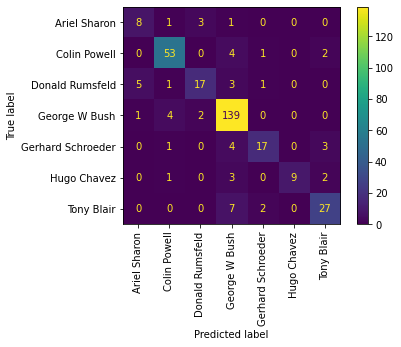

In [60]:
cm = ConfusionMatrixDisplay.from_estimator(
    cat, X_valid_pca, y_valid, display_labels=target_names, xticks_rotation="vertical"
)
cm

In [61]:
med = np.concatenate(cat_pred)

In [62]:
def plot_gallery(images, titles, h, w, n_row=10, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

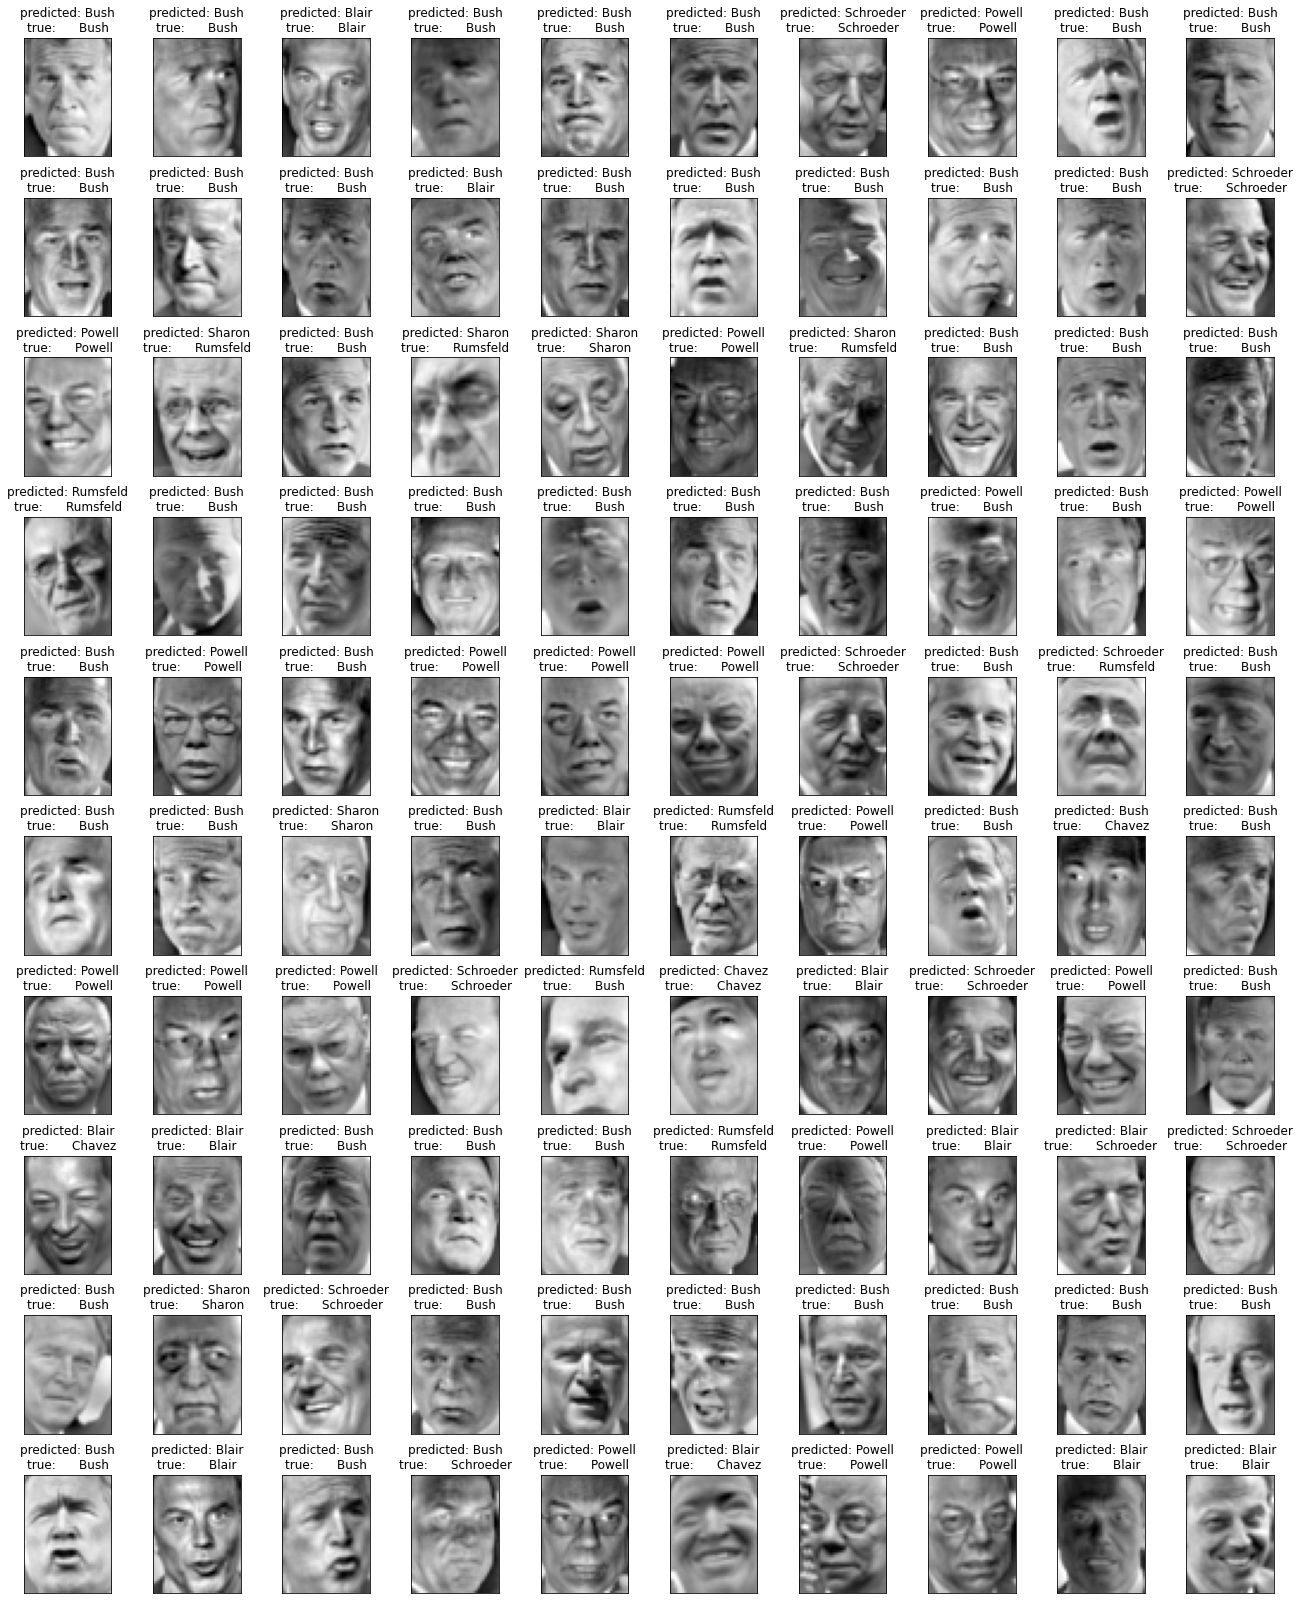

In [63]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(med, y_valid, target_names, i) for i in range(med.shape[0])
]

plot_gallery(X_valid, prediction_titles, h, w)